In [1]:
from dotenv import load_dotenv


load_dotenv("../../.env")

True

In [10]:
import os

api_key = os.environ.get("OPENAI_API_KEY")

In [3]:
from openai import OpenAI

client = OpenAI(api_key=api_key)

response = client.chat.completions.create(
    # model="gpt-4-vision-preview",
    model="gpt-4-turbo",
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "この画像には何が映っていますか？"},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg",
                    },
                },
            ],
        }
    ],
    max_tokens=300,
)

In [4]:
print(response.choices[0])

Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='この画像は、木製の遊歩道が緑豊かな草原を通っている景色を映しています。遊歩道は一直線に伸びており、その先には広がる空と雲が見えます。自然の美しさと静けさを感じさせる光景です。', role='assistant', function_call=None, tool_calls=None))


In [25]:
print(response.choices[0].message.content)

この画像は、草原または湿地帯を通る木製の遊歩道が映っている風景です。遊歩道は画像の前景から中心を通り、遠景に向かって伸びています。周囲には高い草が生い茂り、遠くには木々が点在しています。空にはいくつかの雲があり、晴れた日の光景を捉えています。自然の美しさと静けさを感じさせる、リラックスできる場所のように見えます。


In [11]:
# %%bash
# wget "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg" -O image.jpg

In [4]:
import base64


# Function to encode the image
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")


image_path = "img/image-001.png"

# Getting the base64 string
base64_image = encode_image(image_path)

In [5]:
import PIL.Image
from io import BytesIO


def encode_image_from_pil(pil_image: PIL.Image.Image):

    buffered = BytesIO()
    pil_image.save(buffered, format="PNG")
    return base64.b64encode(buffered.getvalue()).decode("utf-8")

In [7]:
import PIL.Image

pil_image = PIL.Image.open("img/image-001.png")
base64_image = encode_image_from_pil(pil_image)
base64_image

'iVBORw0KGgoAAAANSUhEUgAABEUAAAN5CAYAAADuBIXgAAEAAElEQVR4nOz9eXhUZZo//r9rT1JJZU9lTyAJJBASgQSFiEZAUKCxiY2aabHpxh6wdaA/tOhPbR3GHtqvje1nZLSVT8sMLT2DSze0CCgIGIWwhS1hSUL2jexbJZWkKrX8/qikSFKnsm9a79d1cV2klnOe2s9zn/u5b5HZbDaDiIiIiIiIiMjBiCd6AEREREREREREE4FBESIiIiIiIiJySAyKEBEREREREZFDYlCEiIiIiIiIiBwSgyJERERERERE5JAYFCEiIiIiIiIihyS1d0VQ+IrxHAcRERERERER0ZirKD5s/T8zRYiIiIiIiIjIITEoQkREREREREQOiUERIiIiIiIiInJIDIoQERERERERkUNiUISIiIiIiIiIHBKDIkRERERERETkkBgUISIiIiIiIiKHxKAIERERERERETkkBkWIiIiIiIiIyCExKEJEREREREREDolBESIiIiIiIiJySAyKEBEREREREZFDYlCEiIiIiIiIiBwSgyJERERERERE5JAYFCEiIiIiIiIih8SgCBERERERERE5JAZFiIiIiIiIiMghMShCRERERERERA6JQREiIiIiIiIickgMihARERERERGRQ2JQhIiIiIiIiIgcEoMiREREREREROSQGBQhIiIiIiIiIofEoMhwrP89sosPo6LXv0/x6fo7N1n00h9xJesDvPukeuLGSQjd8HtcubwT21eN7esQu2QlXnz79zh6+lMUZvweG8LHdHeT0Gak2XwmDiN7X8pED4yIiIiIiMgu6UQPQNCOD1CxJsTm4rzPViB56wSMZ4gWbduJ99ZFQAVg9b//J6Ki/4Rf/jYNpRM9sElg9Yd/xbtLPAGDHjpd96XVOLJlI547Oso7C0/BWxvi4ecFrNv5n0iYNwqvQ1wiVkdORcK9kYiKDEFIsBpqlRyKXp+kePz6dynYtXb/yMZPNOp

In [5]:
base64_image

'iVBORw0KGgoAAAANSUhEUgAABEUAAAN5CAYAAADuBIXgAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAFiUAABYlAUlSJPAAAP+lSURBVHhe7P1Vex1XurYNv7/j23n/Rvay1xvv8aRXU7oDDjgOJ46ZmZkZZWbJ7JhlZkbZlpkd24l7ZT3tdNZa46trSGN6zKlRE6RZcsk67+M4jzizRjGo7qtu+H8MhmEYhmEYhmEYhmFYKzREEQzDMAzDMAzDMAzDWqUhimAYhmEYhmEYhmEY1ioNUQTDMAzDMAzDMAzDsFZpiCIYhmEYhmEYhmEYhrVKQxTBMAzDMAzDMAzDMKxVGqIIhmEYhmEYhmEYhmGt0mJFkf/f//v/AQAAAAAAAAC8UfiGKAIAAAAAAAAArQbfEEUAAAAAAAAAoNXgG6IIAAAAAAAAALQafEMUAQAAAAAAAIBWg2+IIgAAAAAAAADQavANUQQAAAAAAAAAWg2+IYoAAAAAAAAAQKvBN0QRAAAAAAAAAGg1+IYoAgAAAAAAAACtBt8QRQAAAAAAAACg1eAboggAAAAAAAAAtBp8QxQBAAAAAAAAgFaDb4giAAAAAAAAANBq8A1RBAAAAAAAAABaDb4higAAAAAAAABAq8E3RBEAAAAAAAAAaDX4higCAAAAAAAAAK0G3xBFAAAAAAAAAKDV4BuiCAAAAAAAAAC0GnxDFAEAAAAAAACAVoNviCIAAAAAAAAA0GrwDVEEAAAAAAAAAFoNviGKAAAAAAAAAECrwTdEkcYw+Ix5UX+cXtmv5sDgV2PazLxsHr+4Y6r6tM2eF5qVt4afMY+f1ZqK9smehz+0m24mVZ4x5+/+al4+OWMGvR0e9+ayzVytvxN8e3FobmAsAAAAAADA68O3dIoiq+7Ub0W2XV0VGPs6KCCKtKmo9ab/as4vHm3eyl1GK+W7Hc/rDsvvv5mXvzrumKovw+ObxNtzzYFndas

In [20]:
# import requests

# # OpenAI API Key
# api_key = os.environ["OPENAI_API_KEY"]
#
#
# headers = {"Content-Type": "application/json", "Authorization": f"Bearer {api_key}"}

# payload = {
#     "model": "gpt-4-vision-preview",
#     "messages": [
#         {
#             "role": "user",
#             "content": [
#                 {"type": "text", "text": "What’s in this image?"},
#                 {
#                     "type": "image_url",
#                     "image_url": {"url": f"data:image/png;base64,{base64_image}"},
#                 },
#             ],
#         }
#     ],
#     "max_tokens": 300,
# }

# response = requests.post(
#     "https://api.openai.com/v1/chat/completions", headers=headers, json=payload
# )

# print(response.json())

In [11]:
client = OpenAI(api_key=api_key)

response = client.chat.completions.create(
    # model="gpt-4-vision-preview",
    model="gpt-4-turbo",
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": """
# 依頼内容
この画像はとある資料ですが、内容の要点を整理していただけますか？

## 整理の要件

- 資料中の文章を正確に読み取りテキストとして表現します
- 読み取ったテキストの要点を整理します
- 利用されている単語および数字を正確に利用します
- グラフおよび図を正確に読み取ります
- 記載されていないことについては推測を行わずに、記載されていることのみを整理します
- ただし、読み取りが不完全な単語は最も正しいと考えられる単語でのみ代替します。ほぼ確実な推論のみ可能です。
- 最後に、最も重要な点３つを挙げます

""",
                },
                {
                    "type": "image_url",
                    "image_url": {"url": f"data:image/png;base64,{base64_image}"},
                },
            ],
        }
    ],
    max_tokens=2048,
)

In [12]:
print(response.choices[0].message.content)

### 画像で提供される内容のテキスト読み取り

タイトル: 生殖AIを活用することでできる9つのこと

#### 土地内側
1. リサーチ・調査・蓄積・分析
2. 企画設定・プロトタイプ
3. メール・企画書等の文章作成
4. 設計・デザイン作成
5. ソフトウェア開発・デバッグ
6. チャットボット等による社内外の患者・業務支援
7. 文章/画像等のコンテンツ作成
8. チャットボット等による属設対応自動化
9. サービス機論・感染体験の進化

#### 土外側
(空欄)

### 要点整理
1. **リサーチと分析**: AI を使用してデータを集め、分析し、各種の統計や報告書を作成。
2. **企画とプロトタイプ**: 新しいプロジェクトの企画やプロトタイプの開発に活用。
3. **ドキュメント作成**: AIを利用してメールや企画書等の文書を自動生成。
4. **設計とデザイン**: AI による自動デザインや設計の提案が可能。
5. **ソフトウェア開発**: ソフトウェアの開発とデバッグのプロセスをAIが補助。
6. **支援サービス**: 内外の患者対応や業界のリアルタイム支援を実現するボット等の自動対応。
7. **コンテンツ生成**: 文章や画像などのメディアコンテンツを生成。
8. **応対自動化**: ユーザーの問い合わせに対する自動応答システムの充実。
9. **サービスなどの進化**: 顧客体験を豊かにするためのサービス提案やシステムの進化。

### 最も重要な点3つ
1. **企画とプロトタイプ**: AIを利用した新規プロジェクトの創出と試作が迅速化。
2. **ソフトウェア開発**: 開発プロセスの効率化とデバッグの正確性向上。
3. **応対自動化**: カスタマーサポートの効率化や顧客満足度の向上。


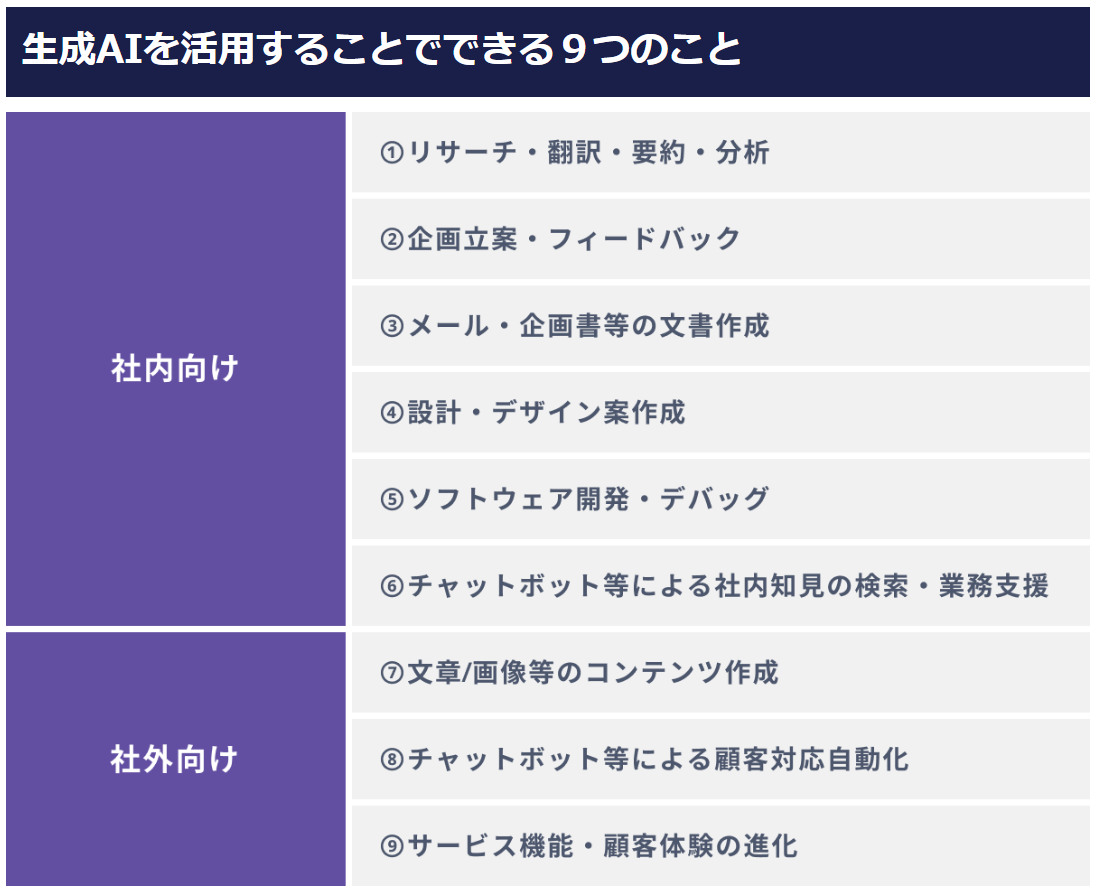

In [10]:
%matplotlib inline
from IPython.display import Image

# Image('img/image.jpg')
# Image('img/mizuho-page.png')
Image('img/image-001.png')


# LangChain

In [3]:
# from langchain.chat_models import ChatOpenAI
from langchain_openai import ChatOpenAI
from langchain.schema.messages import HumanMessage
from langchain.prompts import (
    ChatPromptTemplate,
    HumanMessagePromptTemplate,
    MessagesPlaceholder,
    SystemMessagePromptTemplate,
)

In [22]:
prompt = """この画像は生成AIに関する資料ですが、内容の要点を正確に整理していただけますか？
読み取った結果のテキスト部分が日本語として正しくない部分は、論理的に考えて正確な日本語の単語に置き換えてください。
"""

In [23]:
chat = ChatOpenAI(model="gpt-4-turbo", max_tokens=1024)
msg = chat.invoke(
    [
        HumanMessage(
            content=[
                {"type": "text", "text": prompt},
                {
                    "type": "image_url",
                    "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"},
                },
            ]
        )
    ]
)

In [25]:
print(msg.content)

この画像には、「生成AIを活用することでできる9つのこと」というタイトルで、生成AIの利用可能な用途が列挙されています。以下にその要点を整理しました。

1. リサーチ・調査・要約・分析
   - 生成AIを使って、データのリサーチや調査を行い、その内容を要約や分析することができます。

2. 企画立案・プィードバック
   - 新しい企画を立案し、それに対するフィードバックをAIによって生成させることが可能です。

3. メール・企画書等の文書作成
   - メールや企画書といった様々な文書をAIを用いて作成することができます。

4. 設計・デザイン案作成
   - 製品の設計やデザイン案をAIが提案することが可能です。

5. ソフトウェア開発・デバッグ
   - ソフトウェアの開発やデバッグ作業をAIがサポートすることができます。

6. チャットボット等による社内外の質疑応答・業務支援
   - チャットボット等のAIを利用して、社内外からの質問に応答したり、業務を支援することが可能です。

7. 文章/画像等のコンテンツ作成
   - 文章や画像などのコンテンツをAIが自動で作成することができます。

8. チャットボット等による顧客対応自動化
   - チャットボット等を使って、顧客対応を自動化することが可能です。

9. サービス機能・顧客体験の進化
   - AIを活用することで、サービスの機能向上や顧客体験の向上を図ることができます。

画像中のテキストはすべて適切な日本語で書かれており、論理的な誤りは見受けられませんでした。


In [2]:
html = """

<!DOCTYPE html><html class="campfire" lang="ja"><head>  <script>
    dataLayer = [];

  </script>

    <script>
      // Unique Script ID: sbZ9SHv1axU=
      dataLayer.push({"userId":6274489,"dimension11":"enabled","user_type":"normal"}, {"facebook_convesion_api_global_event_id":"116.82.33.37_Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36_1709141483"}, {"dynx_itemid":711717,"dynx_project_type":"project","dynx_project_source":"faavo_campfire_local","dynx_project_category":"category_local","dynx_project_theme":"default","dynx_project_status":"closed","dynx_project_editing_draft_status":"approved","dynx_project_visibility":"public","dynx_has_backable_rewards":false,"dynx_backer_count":21,"dynx_backer_total":204400,"dynx_included_feeds_ydn":false,"dynx_included_feeds_affiliate":false,"dynx_included_feeds_criteo":false,"dynx_included_feeds_facebook":false,"dynx_included_feeds_gdr":false,"dynx_is_project_owner":false,"dynx_project_prefecture":"茨城県"}, {"dynx_pagetype":"offerdetail"}, {"event":"enhanced_ecommerce.detail","ecommerce":{"detail":{"actionField":{"list":"projects_popular_page52"},"products":[{"id":711717,"name":"【かすみがうら市共同企画】帆引き船のすべてが学べる「デジタル博物館プロジェクト」","dimension8":"project","brand":"faavo_campfire_local","category":"category_local"}]}}}, {"event":"ab_test","event_category":"Y202402_projects_to_rf_closed","event_action":"test_start","event_label":"b"}, {"valid_heading_count":2});
    </script>

  <script>
  (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
  new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
  j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
  'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
  })(window,document,'script','dataLayer','GTM-W9DRDW2');</script>


<link href="https://fonts.googleapis.com" rel="preconnect" /><link crossorigin="anonymous" href="https://fonts.gstatic.com" rel="preconnect" /><link href="https://fonts.googleapis.com/css2?family=Noto+Sans+JP:wght@400;500;700&amp;display=swap" rel="stylesheet" /><link href="https://kit.fontawesome.com" rel="preconnect" /><link crossorigin="anonymous" href="https://ka-p.fontawesome.com" rel="preconnect" /><script async="" crossorigin="anonymous" src="https://kit.fontawesome.com/18f0a5c5ec.js"></script><link as="image" href="https://static.camp-fire.jp/uploads/project_version/image/1131899/523bbebb-9461-4eda-ab7c-009550654ae6.jpeg?ixlib=rails-2.1.4&fit=max&auto=format" imagesizes="(min-width: 1200px) 656px, (min-width: 769px) 54vw, 96vw" imagesrcset="https://static.camp-fire.jp/uploads/project_version/image/1131899/523bbebb-9461-4eda-ab7c-009550654ae6.jpeg?ixlib=rails-2.1.4&amp;auto=format&amp;fit=max&amp;w=320 320w, https://static.camp-fire.jp/uploads/project_version/image/1131899/523bbebb-9461-4eda-ab7c-009550654ae6.jpeg?ixlib=rails-2.1.4&amp;auto=format&amp;fit=max&amp;w=414 414w, https://static.camp-fire.jp/uploads/project_version/image/1131899/523bbebb-9461-4eda-ab7c-009550654ae6.jpeg?ixlib=rails-2.1.4&amp;auto=format&amp;fit=max&amp;w=768 768w, https://static.camp-fire.jp/uploads/project_version/image/1131899/523bbebb-9461-4eda-ab7c-009550654ae6.jpeg?ixlib=rails-2.1.4&amp;auto=format&amp;fit=max&amp;w=960 960w, https://static.camp-fire.jp/uploads/project_version/image/1131899/523bbebb-9461-4eda-ab7c-009550654ae6.jpeg?ixlib=rails-2.1.4&amp;auto=format&amp;fit=max&amp;w=1024 1024w" rel="preload" /><meta content="NOYDIR" name="ROBOTS" /><meta content="NOODP" name="ROBOTS" /><link media="handheld" rel="alternate" /><meta content="width=device-width,initial-scale=1,minimum-scale=1,maximum-scale=1,user-scalable=no" name="viewport" /><meta content="198416226868447" property="fb:app_id" /><meta content="175430739163635" property="fb:pages" /><meta content="816f5f822973010374b9945914e9fd48" name="p:domain_verify" /><meta content="crowdfunding" property="note:type" /><meta content="ibaraki_video_pack" property="note:owner" /><meta content="まちづくり・地域活性化" property="note:category" /><meta content="3300000" property="note:target_amount" /><meta content="204400" property="note:current_amount" /><meta content="21" property="note:supporters" /><meta content="2024-01-10T13:22:08+09:00" property="note:start_at" /><meta content="2024-02-28T23:59:59+09:00" property="note:end_at" /><meta content="支援する" property="note:button_label" /><meta content="IE=Edge" http-equiv="X-UA-Compatible" /><meta content="yes" name="apple-mobile-web-app-capable" /><meta content="default" name="apple-mobile-web-app-status-bar-style" /><title>【かすみがうら市共同企画】帆引き船のすべてが学べる「デジタル博物館プロジェクト」 - CAMPFIRE (キャンプファイヤー)</title>
<link rel="icon" type="image/x-icon" href="https://static.camp-fire.jp/assets/favicon/campfire/favicon-9a2fcda88c3b9ee0055bece880667cb2ddb73d2ef246b9c870fdf2804801a6f6.ico">
<link rel="apple-touch-icon" type="image/png" href="https://static.camp-fire.jp/assets/favicon/campfire/touch_icon-ace1ac4713fac55fc7b43b6b40ec97b43f7835b2e215b18ce489d6d0304158dd.png" sizes="152x152">
<meta name="description" content="かすみがうら市×茨城ビデオパック 共同企画霞ヶ浦帆引き船保存会 全面協力２５年間の帆引き船研究の実績を基に、帆引き船の魅力とその神髄を発信していきます！『帆引き船デジタル博物館』開設の主旨にご賛同頂き、帆引き船存続に皆さまのお力を！">
<meta name="keywords" content="クラウドファンディング,資金調達,campfire,キャンプファイヤー,ソーシャルファンディング,クリエイター,少額出資,プレオーダー">
<link rel="canonical" href="https://camp-fire.jp/projects/view/711717">
<meta property="og:title" content="【かすみがうら市共同企画】帆引き船のすべてが学べる「デジタル博物館プロジェクト」">
<meta property="og:description" content="かすみがうら市×茨城ビデオパック 共同企画霞ヶ浦帆引き船保存会 全面協力２５年間の帆引き船研究の実績を基に、帆引き船の魅力とその神髄を発信していきます！『帆引き船デジタル博物館』開設の主旨にご賛同頂き、帆引き船存続に皆さまのお力を！">
<meta property="og:image" content="https://static.camp-fire.jp/uploads/project_version/image/1131899/medium_523bbebb-9461-4eda-ab7c-009550654ae6.jpeg?w=1200&amp;h=630&amp;fit=fill&amp;fill=blur">
<meta name="twitter:card" content="summary_large_image">
<meta name="twitter:site" content="@campfirejp">
<meta name="note:card" content="summary_large_image"><meta name="csrf-param" content="authenticity_token" />
<meta name="csrf-token" content="1uuph5yqv62a18OhW8o6cBtllfRAHb_cYPPUui3bMVy0M_8OAYc5ATty-INMDduM5253rCvRQt8A8RXVG3iyaQ" /><script src="https://static.camp-fire.jp/assets/application-4dff65c5b4251dee6718d6dfb61a7f3d098e561f7c68a93fd5464d6fecee7b20.js"></script><script src="https://static.camp-fire.jp/assets/jquery.easing.1.3-4420da2e094efd768ec8fc2ae190978167b4379e283bd07cd7ec4293fa8964b0.js"></script><script src="https://static.camp-fire.jp/assets/pages/projects_show-d97e0a5adcec46f49e8e89561508f0bada8f087e686e0915748dca903da1aed4.js" defer="defer"></script><script src="https://static.camp-fire.jp/assets/modules/countdown-02990fc4982b5d93c425f5fe767db9c45781e59d6496eea529bc05de330bffd9.js" defer="defer"></script><script src="https://static.camp-fire.jp/assets/lite-yt-embed-c55c33d8beb4e050af00486769efb27b0909851cc5cc17723b298fe9ce15f202.js" defer="defer"></script><script src="https://static.camp-fire.jp/assets/pages/project_reward-3c19397ffeaeb9a266ba6da3935dbcf12eeeaec8fa7f690e73ca2af4495ef658.js" defer="defer"></script><script src="https://static.camp-fire.jp/assets/slick-20680523782ba1eee18ba248b635a8424289327f86a270148af7196ebdfbad8e.js"></script><script src="https://static.camp-fire.jp/assets/modules/multiple_images-a43a56e3abdb87bbc0ad89668eb644da7f682a4b45772a0cc86a6ef4769df9dd.js"></script><script>const API_URL = "https://api.camp-fire.jp/";</script><script src="https://static.camp-fire.jp/assets/project_show-8416f2d3b846c5dcea90.js"></script><script>if(typeof(initDatadogRum) !== 'undefined') {
  initDatadogRum({
    applicationId: "3762a538-e256-4a98-98ff-61775076b16a",
    clientToken: "pub603994874aaffb1fd7104e9810ba5c58",
    service: "camp-fire.jp",
    sampleRate: "3"
  })
}</script><link rel="stylesheet" media="all" href="https://static.camp-fire.jp/assets/application-be05d3e7567b276b93e4a486116f5a94528f6b1790b3253fae5c4314dc21d07c.css" /><link rel="stylesheet" media="all" href="https://static.camp-fire.jp/assets/slick-c0d9711ca26a60b2f858844332fc390b344513af5125e95a027261a5927e1374.css" /><link rel="stylesheet" media="all" href="https://static.camp-fire.jp/assets/lite-yt-embed-368d84d9069855f0685562e2901bd09fe601db990a2a9cd1cf6f2f43483249b6.css" /><link rel="stylesheet" media="all" href="https://static.camp-fire.jp/assets/mypage/referral_program-b428ef726b0f59894367d95b5a0ef11f39fa5fe8f50c1717f98dc7dae609d71c.css" /><link rel="stylesheet" media="all" href="https://static.camp-fire.jp/assets/slick-c0d9711ca26a60b2f858844332fc390b344513af5125e95a027261a5927e1374.css" /><script src="https://static.camp-fire.jp/assets/change_money_unit-6d87c47953d5890b05e24b09a46f5ceed96ff0f4c68bd76b2b9f0eec670a76a3.js" defer="defer"></script><script src="https://static.camp-fire.jp/assets/lazysizes.min-a12a6994abeab0df1a1df0c6afea565afbef9c001213ed7848b4967fb3bcfffb.js" async="async"></script><script src="https://static.camp-fire.jp/assets/google_ads/save_gclid-2fa68019df7ac56d5714c1011d3d76fb5d08db2e8a7cf023a2303c4e87641061.js"></script><script>(function(c,l,a,r,i,t,y){
  c[a]=c[a]||function(){(c[a].q=c[a].q||[]).push(arguments)};
  t=l.createElement(r);t.async=1;t.src="https://www.clarity.ms/tag/"+i;
  y=l.getElementsByTagName(r)[0];y.parentNode.insertBefore(t,y);
})(window, document, "clarity", "script", "a5vlhksc1x");</script></head><body><noscript><iframe src="https://www.googletagmanager.com/ns.html?id=GTM-W9DRDW2"
height="0" width="0" style="display:none;visibility:hidden"></iframe></noscript>
<div class="projects-show layouts-projects layouts1 wrapper"><header class="header"><nav class="gl-header"><div class="navigation clearfix"><div class="logo" id="gl-logo"><a id="hnav_header_logo" title="CAMPFIRE" href="/"><img alt="CAMPFIRE" srcset="https://static.camp-fire.jp/assets/logo/campfire-cb95da2501c768c412ddb7db81f77cf265ac4c008ee4c5bf769253c9264e391b.svg?ixlib=rails-2.1.4&amp;auto=format&amp;w=320 320w, https://static.camp-fire.jp/assets/logo/campfire-cb95da2501c768c412ddb7db81f77cf265ac4c008ee4c5bf769253c9264e391b.svg?ixlib=rails-2.1.4&amp;auto=format&amp;w=414 414w, https://static.camp-fire.jp/assets/logo/campfire-cb95da2501c768c412ddb7db81f77cf265ac4c008ee4c5bf769253c9264e391b.svg?ixlib=rails-2.1.4&amp;auto=format&amp;w=768 768w, https://static.camp-fire.jp/assets/logo/campfire-cb95da2501c768c412ddb7db81f77cf265ac4c008ee4c5bf769253c9264e391b.svg?ixlib=rails-2.1.4&amp;auto=format&amp;w=960 960w, https://static.camp-fire.jp/assets/logo/campfire-cb95da2501c768c412ddb7db81f77cf265ac4c008ee4c5bf769253c9264e391b.svg?ixlib=rails-2.1.4&amp;auto=format&amp;w=1024 1024w" sizes="100vw" src="https://static.camp-fire.jp/assets/logo/campfire-cb95da2501c768c412ddb7db81f77cf265ac4c008ee4c5bf769253c9264e391b.svg?ixlib=rails-2.1.4&auto=format" /></a></div><div class="header-search" id="search-wrap"><div data-algolia-api-key="d9573e2f517f3d40183a9c3b8c390a77" data-algolia-app-id="9QNXMYFE1K" data-algolia-index-name="projects_production" data-results-element-id="project_instant_search_results" data-results-link-extra-query="{&quot;list&quot;: &quot;project_instant_search_results&quot;}" data-vue="ProjectInstantSearchBox"></div></div><div class="header-search-campfire-sp" id="js-search-wrap-campfire-sp"><section class="search"><form action="/projects/search" accept-charset="UTF-8" method="get"><div class="search-form"><div class="search-form-wrap"><input name="word" placeholder="キーワードからさがす" type="search" /><button type="submit">検索</button></div></div></form></section><section class="category-lists"><h3>カテゴリーからさがす</h3><ul class="categories"><li><a href="/projects/category/product"><img src="https://static.camp-fire.jp/assets/header_search/product-819cb1852b030d3039e47976ad0987f6fb8f3950843483ae695d2dd1173a64c4.png" /><span>プロダクト</span></a></li><li><a href="/projects/category/technology"><img src="https://static.camp-fire.jp/assets/header_search/technology-ccc1a622b61241ad4c5ecd35606b5b0da720ef5f4f93515cb066de80fe8bd333.png" /><span>テクノロジー・ガジェット</span></a></li><li><a href="/projects/category/local"><img src="https://static.camp-fire.jp/assets/header_search/local-e619be41f9b22915f6b1b4842d58d92e5236d06b6f88202bb7862e66b77a0659.png" /><span>まちづくり</span></a></li><li><a href="/projects/category/food"><img src="https://static.camp-fire.jp/assets/header_search/food-aa33dadcebd8f3391b81fc1869dac97e30d573572f21cddffe118397b8d36f7b.png" /><span>フード・飲食店</span></a></li><li><a href="/projects/category/social-good"><img src="https://static.camp-fire.jp/assets/header_search/social_good-1e8f27410dc3a9e89cc7743759e83816f56b4625f118cae0a41775e1d314ed64.png" /><span>ソーシャルグッド</span></a></li><li><a href="/projects/category/music"><img src="https://static.camp-fire.jp/assets/header_search/music-43c43f35ffe89d80706d1c78f56910086303518ca84ca44d81ac518769493e7b.png" /><span>音楽</span></a></li></ul><ul class="categories more-project-lists" id="js-more-project-lists"><li><a href="/projects/category/art"><img src="https://static.camp-fire.jp/assets/header_search/art-8cc5e90ff6e7161a50419da022fdb3a477d11501b9d708e09a1b09583c3ef7de.png" /><span>アート・写真</span></a></li><li><a href="/projects/category/dance"><img src="https://static.camp-fire.jp/assets/header_search/dance-2b653739da4f2de63d5c1586459e1a962a4af5910e198e68991583a54feba148.png" /><span>舞台・パフォーマンス</span></a></li><li><a href="/projects/category/game"><img src="https://static.camp-fire.jp/assets/header_search/game-2f78873bec9039071af973ea16d8d3787c304bdef27cf2d7e68296f2729bb553.png" /><span>ゲーム・サービス開発</span></a></li><li><a href="/projects/category/fashion"><img src="https://static.camp-fire.jp/assets/header_search/fashion-66570946df87a87a7aa1843ee49df4f1ca8aae4de34a0d428c6098ca9598aca9.png" /><span>ファッション</span></a></li><li><a href="/projects/category/movie"><img src="https://static.camp-fire.jp/assets/header_search/movie-883e9aad6a76ecdd5f9df98bc5ba9e69cd69abc107f0a88c6b34789fd312fe8f.png" /><span>映像・映画</span></a></li><li><a href="/projects/category/publishing"><img src="https://static.camp-fire.jp/assets/header_search/publishing-48cf663152b51e2e5ad0bcdb84066a8e80f444b769fd043b9f12773f1be187ab.png" /><span>書籍・雑誌出版</span></a></li><li><a href="/projects/category/anime"><img src="https://static.camp-fire.jp/assets/header_search/anime-14d94f404608e91f4615d40b62b77111c882f44fabc80ef0be0c9e22e13d17b5.png" /><span>アニメ・漫画</span></a></li><li><a href="/projects/category/sports"><img src="https://static.camp-fire.jp/assets/header_search/sports-e008187996105db67445cae7dc538a6122efe6842d851a93acb7dea8972c1df0.png" /><span>スポーツ</span></a></li><li><a href="/projects/category/business"><img src="https://static.camp-fire.jp/assets/header_search/business-bd012b497e43ec360f36f3229c188841b910b28f8ac048a606c139a54dcd6a46.png" /><span>ビジネス・起業</span></a></li><li><a href="/projects/category/challenge"><img src="https://static.camp-fire.jp/assets/header_search/challenge-8bb4d198866e4cd2dd831642fac41b1292264a67b8c7b5dca81a0d821d079b13.png" /><span>チャレンジ</span></a></li><li><a href="/projects/category/beauty"><img src="https://static.camp-fire.jp/assets/header_search/beauty-eb30b5fe4ff6c452ad6981453eb4c26bc8877a1b7864aca8ede41fbe5e08bf6f.png" /><span>ビューティー・ヘルスケア</span></a></li></ul><button id="js-see-more">もっと見る</button></section><section class="region-lists"><h3>地域からさがす</h3><ul class="region"><li class="js-region"><div class="region-wrap"><img src="https://static.camp-fire.jp/assets/header_search/hokkaido-0e5b10748ca291db68231595027ed0d292b569b6d00af809745139dd95c9bf3c.png" /><span>北海道地方</span></div><ul class="js-prefectures prefectures"><li><a href="/projects/search?prefecture=hokkaido">北海道</a></li></ul></li><li class="js-region"><div class="region-wrap"><img src="https://static.camp-fire.jp/assets/header_search/tohoku-d612a52558720e2f12ea6ab59cb076f16ad78365a7a4518af0aa20c4a03247c9.png" /><span>東北地方</span></div><ul class="js-prefectures prefectures"><li><a href="/projects/search?prefecture=aomori">青森県</a></li><li><a href="/projects/search?prefecture=iwate">岩手県</a></li><li><a href="/projects/search?prefecture=miyagi">宮城県</a></li><li><a href="/projects/search?prefecture=akita">秋田県</a></li><li><a href="/projects/search?prefecture=yamagata">山形県</a></li><li><a href="/projects/search?prefecture=fukushima">福島県</a></li></ul></li><li class="js-region"><div class="region-wrap"><img src="https://static.camp-fire.jp/assets/header_search/kanto-c94a8671e13dec79653e041642838d85407ecd2f20a7d6a34ffdb8ffee3cf703.png" /><span>関東地方</span></div><ul class="js-prefectures prefectures"><li><a href="/projects/search?prefecture=ibaraki">茨城県</a></li><li><a href="/projects/search?prefecture=tochigi">栃木県</a></li><li><a href="/projects/search?prefecture=gumma">群馬県</a></li><li><a href="/projects/search?prefecture=saitama">埼玉県</a></li><li><a href="/projects/search?prefecture=chiba">千葉県</a></li><li><a href="/projects/search?prefecture=tokyo">東京都</a></li><li><a href="/projects/search?prefecture=kanagawa">神奈川県</a></li></ul></li><li class="js-region"><div class="region-wrap"><img src="https://static.camp-fire.jp/assets/header_search/chubu-272a717c5e7850944eefb739c1f151271565486baa5c120c42c5b76a1b4ad94e.png" /><span>中部地方</span></div><ul class="js-prefectures prefectures"><li><a href="/projects/search?prefecture=nigata">新潟県</a></li><li><a href="/projects/search?prefecture=toyama">富山県</a></li><li><a href="/projects/search?prefecture=ishikawa">石川県</a></li><li><a href="/projects/search?prefecture=fukui">福井県</a></li><li><a href="/projects/search?prefecture=yamanashi">山梨県</a></li><li><a href="/projects/search?prefecture=nagano">長野県</a></li><li><a href="/projects/search?prefecture=gifu">岐阜県</a></li><li><a href="/projects/search?prefecture=shizuoka">静岡県</a></li><li><a href="/projects/search?prefecture=aichi">愛知県</a></li><li><a href="/projects/search?prefecture=mie">三重県</a></li></ul></li><li class="js-region"><div class="region-wrap"><img src="https://static.camp-fire.jp/assets/header_search/kinki-a466313a51e98d23f9a721bc85692aa4b5dc6f8ab6f35c14bd699105cba7f07c.png" /><span>近畿地方</span></div><ul class="js-prefectures prefectures"><li><a href="/projects/search?prefecture=shiga">滋賀県</a></li><li><a href="/projects/search?prefecture=kyoto">京都府</a></li><li><a href="/projects/search?prefecture=osaka">大阪府</a></li><li><a href="/projects/search?prefecture=hyogo">兵庫県</a></li><li><a href="/projects/search?prefecture=nara">奈良県</a></li><li><a href="/projects/search?prefecture=wakayama">和歌山県</a></li></ul></li><li class="js-region"><div class="region-wrap"><img src="https://static.camp-fire.jp/assets/header_search/chugoku-cfeb18a47dca8ded7f8af486f541e63020dcfec7c3246029729cfbffd5e0fefb.png" /><span>中国地方</span></div><ul class="js-prefectures prefectures"><li><a href="/projects/search?prefecture=tottori">鳥取県</a></li><li><a href="/projects/search?prefecture=shimane">島根県</a></li><li><a href="/projects/search?prefecture=okayama">岡山県</a></li><li><a href="/projects/search?prefecture=hiroshima">広島県</a></li><li><a href="/projects/search?prefecture=yamaguchi">山口県</a></li></ul></li><li class="js-region"><div class="region-wrap"><img src="https://static.camp-fire.jp/assets/header_search/shikoku-d6cfcf5a2a70742f414d9f960790cb4e66b949ad1b51c86155f8dc772859c161.png" /><span>四国地方</span></div><ul class="js-prefectures prefectures"><li><a href="/projects/search?prefecture=tokushima">徳島県</a></li><li><a href="/projects/search?prefecture=kagawa">香川県</a></li><li><a href="/projects/search?prefecture=ehime">愛媛県</a></li><li><a href="/projects/search?prefecture=kochi">高知県</a></li></ul></li><li class="js-region"><div class="region-wrap"><img src="https://static.camp-fire.jp/assets/header_search/kyushu-0789deb0d8432161b6ab715635da5268021383f25a835fafa265f0b6c920bb96.png" /><span>九州・沖縄地方</span></div><ul class="js-prefectures prefectures"><li><a href="/projects/search?prefecture=fukuoka">福岡県</a></li><li><a href="/projects/search?prefecture=saga">佐賀県</a></li><li><a href="/projects/search?prefecture=nagasaki">長崎県</a></li><li><a href="/projects/search?prefecture=kumamoto">熊本県</a></li><li><a href="/projects/search?prefecture=oita">大分県</a></li><li><a href="/projects/search?prefecture=miyazaki">宮崎県</a></li><li><a href="/projects/search?prefecture=kagoshima">鹿児島県</a></li><li><a href="/projects/search?prefecture=okinawa">沖縄県</a></li></ul></li></ul></section><section class="go-projects"><h3>すべてのプロジェクトをまとめて見る</h3><a href="/projects">プロジェクト一覧へ</a></section><section class="close-modal"><button id="js-close-search-modal">とじる<i class="fa fa-times"></i></button></section><script>$(() => {
  // カテゴリーのもっと見る
  const jsMoreProjectList = $('#js-more-project-lists');
  const jsSeeMore = $('#js-see-more');
  let isAnimate = false;
  jsSeeMore.click(() => {
    if (isAnimate) {
      return;
    } else {
      isAnimate = true;
      jsMoreProjectList.slideToggle().promise().done(function(){
        isAnimate = false;
      });
      jsSeeMore.toggleClass('open');
      if (jsSeeMore.get(0).classList.contains('open') == true) {
        jsSeeMore.get(0).innerText = 'カテゴリーを閉じる';
      } else {
        jsSeeMore.get(0).innerText = 'もっと見る';
      };
    }
  });

  // 地域の開閉
  const jsRegion = $('.js-region');
  const jsPrefectures = $('.js-prefectures');
  jsRegion.on('click', function() {
    if (isAnimate) {
      return;
    } else {
      isAnimate = true;
      $(this).toggleClass('open');
      $(this).children('.js-prefectures').slideToggle(300).promise().done(function(){
        isAnimate = false;
      });
      jsPrefectures.not($(this).children('.js-prefectures')).slideUp(300);
      jsRegion.not($(this)).removeClass('open');
    }
  });

  //とじるリンク
  const jsCloseSearchModal = $('#js-close-search-modal');
  const hnavSearchOpenCampfireSp = $('#hnav-search-open-campfire-sp');
  const jsSearchWrapCampfireSp = $('#js-search-wrap-campfire-sp');
  jsCloseSearchModal.on("click", function(){
    if (isAnimate) {
      return false;
    } else {
      isAnimate = true;
      jsSearchWrapCampfireSp.slideToggle(200).promise().done(function(){
        isAnimate = false;
      });
      $('body').removeClass('hnav-search-open');
      hnavSearchOpenCampfireSp.removeClass('active');
    }
  });
});</script></div><div id="header-users"><div class="user-login"><ul class="user-action clearfix"><li class="my-img"><a id="hnav_user_open" data-ci="user-hnav-menu" href="#"><img srcset="https://static.camp-fire.jp/uploads/user/profile_image/6274489/DALL_E_2023-11-12_22.13.46_-_Adjust_the_minimalist_unicorn_icon_to_subtly_incorporate_the_concept_of__creating_from_zero__a_bit_more__while_still_connecting_to_the_idea_of_growing.png?ixlib=rails-2.1.4&amp;w=320&amp;h=320&amp;fit=clip&amp;auto=format 320w, https://static.camp-fire.jp/uploads/user/profile_image/6274489/DALL_E_2023-11-12_22.13.46_-_Adjust_the_minimalist_unicorn_icon_to_subtly_incorporate_the_concept_of__creating_from_zero__a_bit_more__while_still_connecting_to_the_idea_of_growing.png?ixlib=rails-2.1.4&amp;w=414&amp;h=414&amp;fit=clip&amp;auto=format 414w, https://static.camp-fire.jp/uploads/user/profile_image/6274489/DALL_E_2023-11-12_22.13.46_-_Adjust_the_minimalist_unicorn_icon_to_subtly_incorporate_the_concept_of__creating_from_zero__a_bit_more__while_still_connecting_to_the_idea_of_growing.png?ixlib=rails-2.1.4&amp;w=768&amp;h=768&amp;fit=clip&amp;auto=format 768w, https://static.camp-fire.jp/uploads/user/profile_image/6274489/DALL_E_2023-11-12_22.13.46_-_Adjust_the_minimalist_unicorn_icon_to_subtly_incorporate_the_concept_of__creating_from_zero__a_bit_more__while_still_connecting_to_the_idea_of_growing.png?ixlib=rails-2.1.4&amp;w=960&amp;h=960&amp;fit=clip&amp;auto=format 960w, https://static.camp-fire.jp/uploads/user/profile_image/6274489/DALL_E_2023-11-12_22.13.46_-_Adjust_the_minimalist_unicorn_icon_to_subtly_incorporate_the_concept_of__creating_from_zero__a_bit_more__while_still_connecting_to_the_idea_of_growing.png?ixlib=rails-2.1.4&amp;w=1024&amp;h=1024&amp;fit=clip&amp;auto=format 1024w" sizes="100vw" src="https://static.camp-fire.jp/uploads/user/profile_image/6274489/DALL_E_2023-11-12_22.13.46_-_Adjust_the_minimalist_unicorn_icon_to_subtly_incorporate_the_concept_of__creating_from_zero__a_bit_more__while_still_connecting_to_the_idea_of_growing.png?ixlib=rails-2.1.4&w=200&h=200&fit=clip&auto=format" /><div class="sp-block sc-block"></div></a></li><li class="sp-none sc-none watched"><a id="hnav_user_action_message" title="メッセージ" href="/mypage/messages"><i class="far fa-envelope"></i></a></li><li class="sp-none sc-none message"><a id="hnav_user_menu_watched" title="閲覧したプロジェクト" href="/projects/watched"><i class="far fa-history"></i></a></li></ul></div><div class="user-menu" id="user-menu"><ul><li class="user-name"><a id="hnav_user_menu_mypage" href="/profile/math_integrator">math_integrator<br /><span>プロフィールへ</span></a></li><li><ul><li><a id="hnav_user_menu_post" href="/mypage/projects"><i class="far fa-sticky-note fa-fw"></i>投稿したプロジェクト</a></li><li><a id="hnav_user_menu_watched" href="/projects/watched"><i class="far fa-history fa-fw"></i>閲覧したプロジェクト</a></li></ul></li><li><ul><li><a id="hnav_user_menu_project" href="/mypage/backers"><i class="far fa-yen fa-fw"></i>支援したプロジェクト</a></li><li><a id="hnav_user_menu_fanclub" href="/mypage/fanclub_backers"><i class="far fa-users fa-fw"></i>参加したコミュニティ</a></li></ul></li><li><ul><li><a id="hnav_user_action_message" title="メッセージ" href="/mypage/messages"><i class="far fa-envelope fa-fw"></i>メッセージ</a></li><li><a id="hnav_user_menu_favorite" href="/mypage/project-follows"><i class="far fa-heart fa-fw"></i>お気に入り</a></li><li><a id="hnav_user_menu_coupons" href="/mypage/coupons"><i class="fas fa-ticket-alt fa-fw"></i>Myクーポン</a></li><li><a id="hnav_user_menu_activity" href="/mypage"><i class="far fa-bell fa-fw"></i>アクティビティ</a></li></ul></li><li><ul><li><a id="hnav_user_menu_config" data-ci="edit-profile-btn" href="/mypage/profile"><i class="far fa-cog fa-fw"></i>設定</a></li><li><a id="hnav_user_menu_logout" title="ログアウト" rel="nofollow" data-method="delete" href="/users/sign_out"><i class="far fa-sign-out fa-fw"></i>ログアウト</a></li></ul></li></ul><div class="sp-block"></div></div><div class="header-overlay" id="header-overlay"></div></div><a id="hnav-search-open-campfire-sp" class="search-open-campfire-sp" aria-label="検索" href=""><span>さがす</span><i class="fa"><svg viewBox="0 0 512 512" xmlns="http://www.w3.org/2000/svg"><path d="M500.3 443.7l-119.7-119.7c27.22-40.41 40.65-90.9 33.46-144.7C401.8 87.79 326.8 13.32 235.2 1.723C99.01-15.51-15.51 99.01 1.724 235.2c11.6 91.64 86.08 166.7 177.6 178.9c53.8 7.189 104.3-6.236 144.7-33.46l119.7 119.7c15.62 15.62 40.95 15.62 56.57 0C515.9 484.7 515.9 459.3 500.3 443.7zM79.1 208c0-70.58 57.42-128 128-128s128 57.42 128 128c0 70.58-57.42 128-128 128S79.1 278.6 79.1 208z"></path></svg></i></a><a class="slim-header-readyfor-button" href="/readyfor">はじめる</a></div><div class="menu-global-wrap"><div class="menu-global clearfix" id="menu-global"><ul><li><a id="hnav_gl_menu_start" href="/readyfor">プロジェクトを掲載するには</a></li><li><a id="hnav_menu_open" href="/projects">プロジェクトをさがす</a></li></ul></div></div><div class="more-menu" id="more-menu"><ul><li><ul><li><a id="hnav_menu_project_popular" title="人気のプロジェクト" href="/projects/popular">人気のプロジェクト</a></li><li><a id="hnav_menu_project_reward_popular" title="注目のリターン" href="/project_rewards/popular">注目のリターン</a></li><li><a id="hnav_menu_project_fresh" title="注目の新着プロジェクト" href="/projects/fresh">注目の新着プロジェクト</a></li><li><a id="hnav_menu_project_last" title="募集終了が近いプロジェクト" href="/projects/last-spurt">募集終了が近いプロジェクト</a></li><li><a id="hnav_menu_project_comingsoon" title="もうすぐ公開されます" href="/projects/coming-soon">もうすぐ公開されます</a></li></ul></li><li><ul class="category clearfix"><li><i class="fa fa-angle-right"></i><a id="hnav_menu_category_art" title="・写真" href="/projects/category/art">アート・写真</a></li><li><i class="fa fa-angle-right"></i><a id="hnav_menu_category_music" title="音楽" href="/projects/category/music">音楽</a></li><li><i class="fa fa-angle-right"></i><a id="hnav_menu_category_dance" title="舞台・パフォーマンス" href="/projects/category/dance">舞台・パフォーマンス</a></li><li><i class="fa fa-angle-right"></i><a id="hnav_menu_category_product" title="プロダクト" href="/projects/category/product">プロダクト</a></li><li><i class="fa fa-angle-right"></i><a id="hnav_menu_category_technology" title="テクノロジー・ガジェット" href="/projects/category/technology">テクノロジー・ガジェット</a></li><li><i class="fa fa-angle-right"></i><a id="hnav_menu_category_game" title="ゲーム・サービス開発" href="/projects/category/game">ゲーム・サービス開発</a></li><li><i class="fa fa-angle-right"></i><a id="hnav_menu_category_food" title="フード・飲食店" href="/projects/category/food">フード・飲食店</a></li><li><i class="fa fa-angle-right"></i><a id="hnav_menu_category_fashion" title="ファッション" href="/projects/category/fashion">ファッション</a></li><li><i class="fa fa-angle-right"></i><a id="hnav_menu_category_movie" title="映像・映画" href="/projects/category/movie">映像・映画</a></li><li><i class="fa fa-angle-right"></i><a id="hnav_menu_category_publishing" title="書籍・雑誌出版" href="/projects/category/publishing">書籍・雑誌出版</a></li><li><i class="fa fa-angle-right"></i><a id="hnav_menu_category_anime" title="アニメ・漫画" href="/projects/category/anime">アニメ・漫画</a></li><li><i class="fa fa-angle-right"></i><a id="hnav_menu_category_sports" title="スポーツ" href="/projects/category/sports">スポーツ</a></li><li><i class="fa fa-angle-right"></i><a id="hnav_menu_category_business" title="ビジネス・起業" href="/projects/category/business">ビジネス・起業</a></li><li><i class="fa fa-angle-right"></i><a id="hnav_menu_category_challenge" title="チャレンジ" href="/projects/category/challenge">チャレンジ</a></li><li><i class="fa fa-angle-right"></i><a id="hnav_menu_category_beauty" title="ビューティー・ヘルスケア" href="/projects/category/beauty">ビューティー・ヘルスケア</a></li><li><i class="fa fa-angle-right"></i><a id="hnav_menu_category_socialgood" title="ソーシャルグッド" href="/projects/category/social-good">ソーシャルグッド</a></li><li><i class="fa fa-angle-right"></i><a id="hnav_menu_category_local" title="まちづくり・地域活性化" href="/projects/category/local">まちづくり・地域活性化</a></li></ul></li><li><ul><li><a id="hnav_menu_for_social_good" title="CAMPFIRE for Social Good" href="https://camp-fire.jp/forsocialgood/readyfor">CAMPFIRE for Social Good</a></li><li><a id="hnav_menu_mocolle" title="CAMPFIRE Creation" href="https://camp-fire.jp/creation">CAMPFIRE Creation</a></li><li><a id="hnav_menu_booster" title="BOOSTER" href="https://camp-fire.jp/booster-parco">BOOSTER</a></li></ul><ul><li><a id="hnav_menu_local" title="CAMPFIREふるさと納税" href="https://camp-fire.jp/furusato">CAMPFIREふるさと納税</a></li><li><a id="hnav_menu_local" title="machi-ya" href="https://camp-fire.jp/machi-ya">machi-ya</a></li><li><a id="hnav_menu_fanclub" title="コミュニティ" href="https://community.camp-fire.jp/">コミュニティ</a></li></ul></li></ul></div></nav><script type="application/ld+json">{"@context":"http://schema.org","@type":"BreadcrumbList","itemListElement":[{"@type":"ListItem","position":1,"item":{"@id":"https://camp-fire.jp/","name":"CAMPFIRE"}},{"@type":"ListItem","position":2,"item":{"@id":"https://camp-fire.jp/projects/category/local","name":"まちづくり・地域活性化"}},{"@type":"ListItem","position":3,"item":{"@id":"https://camp-fire.jp/projects/view/711717","name":"【かすみがうら市共同企画】帆引き船のすべてが学べる「デジタル博物館プロジェクト」"}}]}</script><script type="application/ld+json">{"@context":"http://schema.org","@type":"Product","name":"【かすみがうら市共同企画】帆引き船のすべてが学べる「デジタル博物館プロジェクト」","image":"https://static.camp-fire.jp/uploads/project_version/image/1131899/523bbebb-9461-4eda-ab7c-009550654ae6.jpeg","description":"かすみがうら市×茨城ビデオパック 共同企画\n霞ヶ浦帆引き船保存会 全面協力\n２５年間の帆引き船研究の実績を基に、帆引き船の魅力とその神髄を発信していきます！\n『帆引き船デジタル博物館』開設の主旨にご賛同頂き、帆引き船存続に皆さまのお力を！","Offers":{"@type":"Offer","price":"3300","priceCurrency":"JPY"}}</script><script src="https://static.camp-fire.jp/assets/modules/fixed_header-821d53257c4664726e65a58068f743af5fd10a4adbe3075efd6bfa5534c1a15e.js" defer="defer"></script><section class="header-in"><section class="title"><div class="sp-none"><h1><label class="project-name">【かすみがうら市共同企画】帆引き船のすべてが学べる「デジタル博物館プロジェクト」</label></h1></div><div class="subtitle center row sp-none"><ul><li><a href="/profile/ibaraki_video_pack"><i class="fa fa-user"></i> ibaraki_video_pack</a></li><li><a href="/projects/category/local"><i class="fa fa-tag"></i> まちづくり・地域活性化</a></li><li><a href="/projects/search?prefecture=ibaraki"><i class="fa fa-map-marker"></i> 茨城県</a></li></ul></div></section><section class="headline layouts-float row inner clearfix"><div class="lfloat w60 inner"><script>$(function(){
  $("#button-play").on("click",function () {
    $("#js-thumbnail > img, #js-thumbnail i, #button-play, .thumbnail-in-donation, .thumbnail-in-donation-gm").fadeOut("slow");
    $("#js-thumbnail").append('<iframe loading=lazy width=560 height=375 frameborder="0" allowfullscreen src="//www.youtube.com/embed/z4PEVfA4teE?autohide=1&amp;autoplay=1" ></iframe>');
  });
  // 動画再生時に画像に戻れるようにする
  $(".project-images-nav").on("click",function () {
    $("#js-thumbnail > img, #js-thumbnail i, #button-play, .thumbnail-in-donation, .thumbnail-in-donation-gm").fadeIn("slow");
    $("#js-thumbnail > iframe").remove();
  });
});</script><section class="thumbnail video no-caption-tags" id="js-thumbnail"><div class="thumbnail-in slide-images project-images"><div class="slide-item"><img class="ga-detail-movie" sizes="(min-width: 1200px) 656px, (min-width: 769px) 54vw, 96vw" src="https://static.camp-fire.jp/uploads/project_version/image/1131899/523bbebb-9461-4eda-ab7c-009550654ae6.jpeg?ixlib=rails-2.1.4&fit=max&auto=format" srcset="https://static.camp-fire.jp/uploads/project_version/image/1131899/523bbebb-9461-4eda-ab7c-009550654ae6.jpeg?ixlib=rails-2.1.4&amp;auto=format&amp;fit=max&amp;w=320 320w, https://static.camp-fire.jp/uploads/project_version/image/1131899/523bbebb-9461-4eda-ab7c-009550654ae6.jpeg?ixlib=rails-2.1.4&amp;auto=format&amp;fit=max&amp;w=414 414w, https://static.camp-fire.jp/uploads/project_version/image/1131899/523bbebb-9461-4eda-ab7c-009550654ae6.jpeg?ixlib=rails-2.1.4&amp;auto=format&amp;fit=max&amp;w=768 768w, https://static.camp-fire.jp/uploads/project_version/image/1131899/523bbebb-9461-4eda-ab7c-009550654ae6.jpeg?ixlib=rails-2.1.4&amp;auto=format&amp;fit=max&amp;w=960 960w, https://static.camp-fire.jp/uploads/project_version/image/1131899/523bbebb-9461-4eda-ab7c-009550654ae6.jpeg?ixlib=rails-2.1.4&amp;auto=format&amp;fit=max&amp;w=1024 1024w" /></div><div class="slide-item"><img class="ga-detail-movie" sizes="(min-width: 1200px) 656px, (min-width: 769px) 54vw, 96vw" srcset="https://static.camp-fire.jp/uploads/project_version/image/1131899/f425b83e-aa06-475a-beb1-37e32e21cf12.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=320 320w, https://static.camp-fire.jp/uploads/project_version/image/1131899/f425b83e-aa06-475a-beb1-37e32e21cf12.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=414 414w, https://static.camp-fire.jp/uploads/project_version/image/1131899/f425b83e-aa06-475a-beb1-37e32e21cf12.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=768 768w, https://static.camp-fire.jp/uploads/project_version/image/1131899/f425b83e-aa06-475a-beb1-37e32e21cf12.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=960 960w, https://static.camp-fire.jp/uploads/project_version/image/1131899/f425b83e-aa06-475a-beb1-37e32e21cf12.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=1024 1024w" src="https://static.camp-fire.jp/uploads/project_version/image/1131899/f425b83e-aa06-475a-beb1-37e32e21cf12.jpeg?ixlib=rails-2.1.4&fit=max&auto=format" /></div><div class="slide-item"><img class="ga-detail-movie" sizes="(min-width: 1200px) 656px, (min-width: 769px) 54vw, 96vw" srcset="https://static.camp-fire.jp/uploads/project_version/image/1131899/605a95e0-1299-43d5-a5e9-107410c0b76f.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=320 320w, https://static.camp-fire.jp/uploads/project_version/image/1131899/605a95e0-1299-43d5-a5e9-107410c0b76f.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=414 414w, https://static.camp-fire.jp/uploads/project_version/image/1131899/605a95e0-1299-43d5-a5e9-107410c0b76f.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=768 768w, https://static.camp-fire.jp/uploads/project_version/image/1131899/605a95e0-1299-43d5-a5e9-107410c0b76f.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=960 960w, https://static.camp-fire.jp/uploads/project_version/image/1131899/605a95e0-1299-43d5-a5e9-107410c0b76f.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=1024 1024w" src="https://static.camp-fire.jp/uploads/project_version/image/1131899/605a95e0-1299-43d5-a5e9-107410c0b76f.jpeg?ixlib=rails-2.1.4&fit=max&auto=format" /></div><div class="slide-item"><img class="ga-detail-movie" sizes="(min-width: 1200px) 656px, (min-width: 769px) 54vw, 96vw" srcset="https://static.camp-fire.jp/uploads/project_version/image/1131899/9e63f026-4325-4695-b63d-f25b7400c719.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=320 320w, https://static.camp-fire.jp/uploads/project_version/image/1131899/9e63f026-4325-4695-b63d-f25b7400c719.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=414 414w, https://static.camp-fire.jp/uploads/project_version/image/1131899/9e63f026-4325-4695-b63d-f25b7400c719.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=768 768w, https://static.camp-fire.jp/uploads/project_version/image/1131899/9e63f026-4325-4695-b63d-f25b7400c719.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=960 960w, https://static.camp-fire.jp/uploads/project_version/image/1131899/9e63f026-4325-4695-b63d-f25b7400c719.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=1024 1024w" src="https://static.camp-fire.jp/uploads/project_version/image/1131899/9e63f026-4325-4695-b63d-f25b7400c719.jpeg?ixlib=rails-2.1.4&fit=max&auto=format" /></div><div class="slide-item"><img class="ga-detail-movie" sizes="(min-width: 1200px) 656px, (min-width: 769px) 54vw, 96vw" srcset="https://static.camp-fire.jp/uploads/project_version/image/1131899/a2e64d31-7587-4f40-9008-f7ec4114a93f.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=320 320w, https://static.camp-fire.jp/uploads/project_version/image/1131899/a2e64d31-7587-4f40-9008-f7ec4114a93f.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=414 414w, https://static.camp-fire.jp/uploads/project_version/image/1131899/a2e64d31-7587-4f40-9008-f7ec4114a93f.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=768 768w, https://static.camp-fire.jp/uploads/project_version/image/1131899/a2e64d31-7587-4f40-9008-f7ec4114a93f.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=960 960w, https://static.camp-fire.jp/uploads/project_version/image/1131899/a2e64d31-7587-4f40-9008-f7ec4114a93f.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=1024 1024w" src="https://static.camp-fire.jp/uploads/project_version/image/1131899/a2e64d31-7587-4f40-9008-f7ec4114a93f.jpeg?ixlib=rails-2.1.4&fit=max&auto=format" /></div></div><div class="button-play" id="button-play"><i class="fa fa-play fa0"></i></div></section><div class="project-images-nav"><div class="slide-item"><img sizes="(min-width: 1200px) 656px, (min-width: 769px) 54vw, 96vw" src="https://static.camp-fire.jp/uploads/project_version/image/1131899/523bbebb-9461-4eda-ab7c-009550654ae6.jpeg?ixlib=rails-2.1.4&fit=max&auto=format" srcset="https://static.camp-fire.jp/uploads/project_version/image/1131899/523bbebb-9461-4eda-ab7c-009550654ae6.jpeg?ixlib=rails-2.1.4&amp;auto=format&amp;fit=max&amp;w=320 320w, https://static.camp-fire.jp/uploads/project_version/image/1131899/523bbebb-9461-4eda-ab7c-009550654ae6.jpeg?ixlib=rails-2.1.4&amp;auto=format&amp;fit=max&amp;w=414 414w, https://static.camp-fire.jp/uploads/project_version/image/1131899/523bbebb-9461-4eda-ab7c-009550654ae6.jpeg?ixlib=rails-2.1.4&amp;auto=format&amp;fit=max&amp;w=768 768w, https://static.camp-fire.jp/uploads/project_version/image/1131899/523bbebb-9461-4eda-ab7c-009550654ae6.jpeg?ixlib=rails-2.1.4&amp;auto=format&amp;fit=max&amp;w=960 960w, https://static.camp-fire.jp/uploads/project_version/image/1131899/523bbebb-9461-4eda-ab7c-009550654ae6.jpeg?ixlib=rails-2.1.4&amp;auto=format&amp;fit=max&amp;w=1024 1024w" /></div><div class="slide-item"><img sizes="(min-width: 1200px) 656px, (min-width: 769px) 54vw, 96vw" srcset="https://static.camp-fire.jp/uploads/project_version/image/1131899/f425b83e-aa06-475a-beb1-37e32e21cf12.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=320 320w, https://static.camp-fire.jp/uploads/project_version/image/1131899/f425b83e-aa06-475a-beb1-37e32e21cf12.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=414 414w, https://static.camp-fire.jp/uploads/project_version/image/1131899/f425b83e-aa06-475a-beb1-37e32e21cf12.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=768 768w, https://static.camp-fire.jp/uploads/project_version/image/1131899/f425b83e-aa06-475a-beb1-37e32e21cf12.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=960 960w, https://static.camp-fire.jp/uploads/project_version/image/1131899/f425b83e-aa06-475a-beb1-37e32e21cf12.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=1024 1024w" src="https://static.camp-fire.jp/uploads/project_version/image/1131899/f425b83e-aa06-475a-beb1-37e32e21cf12.jpeg?ixlib=rails-2.1.4&fit=max&auto=format" /></div><div class="slide-item"><img sizes="(min-width: 1200px) 656px, (min-width: 769px) 54vw, 96vw" srcset="https://static.camp-fire.jp/uploads/project_version/image/1131899/605a95e0-1299-43d5-a5e9-107410c0b76f.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=320 320w, https://static.camp-fire.jp/uploads/project_version/image/1131899/605a95e0-1299-43d5-a5e9-107410c0b76f.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=414 414w, https://static.camp-fire.jp/uploads/project_version/image/1131899/605a95e0-1299-43d5-a5e9-107410c0b76f.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=768 768w, https://static.camp-fire.jp/uploads/project_version/image/1131899/605a95e0-1299-43d5-a5e9-107410c0b76f.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=960 960w, https://static.camp-fire.jp/uploads/project_version/image/1131899/605a95e0-1299-43d5-a5e9-107410c0b76f.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=1024 1024w" src="https://static.camp-fire.jp/uploads/project_version/image/1131899/605a95e0-1299-43d5-a5e9-107410c0b76f.jpeg?ixlib=rails-2.1.4&fit=max&auto=format" /></div><div class="slide-item"><img sizes="(min-width: 1200px) 656px, (min-width: 769px) 54vw, 96vw" srcset="https://static.camp-fire.jp/uploads/project_version/image/1131899/9e63f026-4325-4695-b63d-f25b7400c719.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=320 320w, https://static.camp-fire.jp/uploads/project_version/image/1131899/9e63f026-4325-4695-b63d-f25b7400c719.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=414 414w, https://static.camp-fire.jp/uploads/project_version/image/1131899/9e63f026-4325-4695-b63d-f25b7400c719.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=768 768w, https://static.camp-fire.jp/uploads/project_version/image/1131899/9e63f026-4325-4695-b63d-f25b7400c719.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=960 960w, https://static.camp-fire.jp/uploads/project_version/image/1131899/9e63f026-4325-4695-b63d-f25b7400c719.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=1024 1024w" src="https://static.camp-fire.jp/uploads/project_version/image/1131899/9e63f026-4325-4695-b63d-f25b7400c719.jpeg?ixlib=rails-2.1.4&fit=max&auto=format" /></div><div class="slide-item"><img sizes="(min-width: 1200px) 656px, (min-width: 769px) 54vw, 96vw" srcset="https://static.camp-fire.jp/uploads/project_version/image/1131899/a2e64d31-7587-4f40-9008-f7ec4114a93f.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=320 320w, https://static.camp-fire.jp/uploads/project_version/image/1131899/a2e64d31-7587-4f40-9008-f7ec4114a93f.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=414 414w, https://static.camp-fire.jp/uploads/project_version/image/1131899/a2e64d31-7587-4f40-9008-f7ec4114a93f.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=768 768w, https://static.camp-fire.jp/uploads/project_version/image/1131899/a2e64d31-7587-4f40-9008-f7ec4114a93f.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=960 960w, https://static.camp-fire.jp/uploads/project_version/image/1131899/a2e64d31-7587-4f40-9008-f7ec4114a93f.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=1024 1024w" src="https://static.camp-fire.jp/uploads/project_version/image/1131899/a2e64d31-7587-4f40-9008-f7ec4114a93f.jpeg?ixlib=rails-2.1.4&fit=max&auto=format" /></div></div><script>initProjectPagesMainImages();</script><div class="sp-block title-block"><h1><span class="project-name">【かすみがうら市共同企画】帆引き船のすべてが学べる「デジタル博物館プロジェクト」</span></h1><div class="subtitle center row"><ul><li><a href="/profile/ibaraki_video_pack"><i class="fa fa-user"></i> ibaraki_video_pack</a></li><li><a href="/projects/category/local"><i class="fa fa-tag"></i> まちづくり・地域活性化</a></li><li><a href="/projects/search?prefecture=ibaraki"><i class="fa fa-map-marker"></i> 茨城県</a></li><br /></ul></div></div><div class=" "><section class="caption sp-none"><h2>かすみがうら市×茨城ビデオパック 共同企画
霞ヶ浦帆引き船保存会 全面協力
２５年間の帆引き船研究の実績を基に、帆引き船の魅力とその神髄を発信していきます！
『帆引き船デジタル博物館』開設の主旨にご賛同頂き、帆引き船存続に皆さまのお力を！</h2><div class="tags-share clearfix"><ul class="share sp-none clearfix thick"><div class="no-ab-test"><li class="fbshare"><a class="share-image-button" data="" href="https://www.facebook.com/sharer/sharer.php?u=https%3A%2F%2Fcamp-fire.jp%2Fprojects%2Fview%2F711717%3Futm_source%3Dfacebook%26utm_medium%3Dsocial%26utm_campaign%3Dfb_share_c_msg_projects_show" id="-facebook" onclick="return !window.open(this.href, &#39;share&#39;, &#39;width=670, height=450, left=&#39;+ (screen.width - 670) / 2 + &#39; , top=&#39; + (screen.height - 450) / 2 + &#39;, menubar=no, toolbar=no, scrollbars=yes&#39;)" target="_blank" title="Facebookでシェア"><img height="24" src="https://static.camp-fire.jp/assets/share/facebook_button-defd9e7fccab2d7b3888f536ef21283892db0c3634bde544508f023458b63f6b.svg" /></a></li><li class="twitter"><a class="share-image-button" data="" href="https://twitter.com/intent/tweet?url=https%3A%2F%2Fcamp-fire.jp%2Fprojects%2Fview%2F711717%3Futm_source%3Dtwitter%26utm_medium%3Dsocial%26utm_campaign%3Dtw_share_c_msg_projects_show&amp;text=%E3%80%90%E3%81%8B%E3%81%99%E3%81%BF%E3%81%8C%E3%81%86%E3%82%89%E5%B8%82%E5%85%B1%E5%90%8C%E4%BC%81%E7%94%BB%E3%80%91%E5%B8%86%E5%BC%95%E3%81%8D%E8%88%B9%E3%81%AE%E3%81%99%E3%81%B9%E3%81%A6%E3%81%8C%E5%AD%A6%E3%81%B9%E3%82%8B%E3%80%8C%E3%83%87%E3%82%B8%E3%82%BF%E3%83%AB%E5%8D%9A%E7%89%A9%E9%A4%A8%E3%83%97%E3%83%AD%E3%82%B8%E3%82%A7%E3%82%AF%E3%83%88%E3%80%8D+-+%E3%82%AF%E3%83%A9%E3%82%A6%E3%83%89%E3%83%95%E3%82%A1%E3%83%B3%E3%83%87%E3%82%A3%E3%83%B3%E3%82%B0CAMPFIRE&amp;hashtags=クラウドファンディングCAMPFIRE&amp;related=campfirejp&amp;via=campfirejp" id="-twitter" onclick="return !window.open(this.href, &#39;share&#39;, &#39;width=550, height=450, left=&#39;+ (screen.width - 550) / 2 + &#39; , top=&#39; + (screen.height - 450) / 2 + &#39;, menubar=no, toolbar=no, scrollbars=yes&#39;)" target="_blank" title="Twitterで共有する"><img height="24" src="https://static.camp-fire.jp/assets/share/twitter_button-470c47a42c278d69f02382a39e3ba41485b5a934c9cacda85fd6a00b2e3c4163.svg" /></a></li></div><div class="default-pc-pattern"><li class="fbshare"><a class="share-image-button" data="default_pc" href="https://www.facebook.com/sharer/sharer.php?u=https%3A%2F%2Fcamp-fire.jp%2Fprojects%2Fview%2F711717%3Futm_source%3Dfacebook%26utm_medium%3Dsocial%26utm_campaign%3Dfb_share_c_msg_projects_show" id="default_pc-facebook" onclick="return !window.open(this.href, &#39;share&#39;, &#39;width=670, height=450, left=&#39;+ (screen.width - 670) / 2 + &#39; , top=&#39; + (screen.height - 450) / 2 + &#39;, menubar=no, toolbar=no, scrollbars=yes&#39;)" target="_blank" title="Facebookでシェア"><img height="24" src="https://static.camp-fire.jp/assets/share/facebook_button-defd9e7fccab2d7b3888f536ef21283892db0c3634bde544508f023458b63f6b.svg" /></a></li><li class="twitter"><a class="share-image-button" data="default_pc" href="https://twitter.com/intent/tweet?url=https%3A%2F%2Fcamp-fire.jp%2Fprojects%2Fview%2F711717%3Futm_source%3Dtwitter%26utm_medium%3Dsocial%26utm_campaign%3Dtw_share_c_msg_projects_show&amp;text=%E3%80%90%E3%81%8B%E3%81%99%E3%81%BF%E3%81%8C%E3%81%86%E3%82%89%E5%B8%82%E5%85%B1%E5%90%8C%E4%BC%81%E7%94%BB%E3%80%91%E5%B8%86%E5%BC%95%E3%81%8D%E8%88%B9%E3%81%AE%E3%81%99%E3%81%B9%E3%81%A6%E3%81%8C%E5%AD%A6%E3%81%B9%E3%82%8B%E3%80%8C%E3%83%87%E3%82%B8%E3%82%BF%E3%83%AB%E5%8D%9A%E7%89%A9%E9%A4%A8%E3%83%97%E3%83%AD%E3%82%B8%E3%82%A7%E3%82%AF%E3%83%88%E3%80%8D+-+%E3%82%AF%E3%83%A9%E3%82%A6%E3%83%89%E3%83%95%E3%82%A1%E3%83%B3%E3%83%87%E3%82%A3%E3%83%B3%E3%82%B0CAMPFIRE&amp;hashtags=クラウドファンディングCAMPFIRE&amp;related=campfirejp&amp;via=campfirejp" id="default_pc-twitter" onclick="return !window.open(this.href, &#39;share&#39;, &#39;width=550, height=450, left=&#39;+ (screen.width - 550) / 2 + &#39; , top=&#39; + (screen.height - 450) / 2 + &#39;, menubar=no, toolbar=no, scrollbars=yes&#39;)" target="_blank" title="Twitterで共有する"><img height="24" src="https://static.camp-fire.jp/assets/share/twitter_button-470c47a42c278d69f02382a39e3ba41485b5a934c9cacda85fd6a00b2e3c4163.svg" /></a></li></div><div class="share-button-pc-pattern"><li class="fbshare"><a class="share-image-button" data="share_button_pc" href="https://www.facebook.com/sharer/sharer.php?u=https%3A%2F%2Fcamp-fire.jp%2Fprojects%2Fview%2F711717%3Futm_source%3Dfacebook%26utm_medium%3Dsocial%26utm_campaign%3Dfb_share_c_msg_projects_show" id="share_button_pc-facebook" onclick="return !window.open(this.href, &#39;share&#39;, &#39;width=670, height=450, left=&#39;+ (screen.width - 670) / 2 + &#39; , top=&#39; + (screen.height - 450) / 2 + &#39;, menubar=no, toolbar=no, scrollbars=yes&#39;)" target="_blank" title="Facebookでシェア"><img height="24" src="https://static.camp-fire.jp/assets/share/facebook_button-defd9e7fccab2d7b3888f536ef21283892db0c3634bde544508f023458b63f6b.svg" /></a></li><li class="twitter"><a class="share-image-button" data="share_button_pc" href="https://twitter.com/intent/tweet?url=https%3A%2F%2Fcamp-fire.jp%2Fprojects%2Fview%2F711717%3Futm_source%3Dtwitter%26utm_medium%3Dsocial%26utm_campaign%3Dtw_share_c_msg_projects_show&amp;text=%E3%80%90%E3%81%8B%E3%81%99%E3%81%BF%E3%81%8C%E3%81%86%E3%82%89%E5%B8%82%E5%85%B1%E5%90%8C%E4%BC%81%E7%94%BB%E3%80%91%E5%B8%86%E5%BC%95%E3%81%8D%E8%88%B9%E3%81%AE%E3%81%99%E3%81%B9%E3%81%A6%E3%81%8C%E5%AD%A6%E3%81%B9%E3%82%8B%E3%80%8C%E3%83%87%E3%82%B8%E3%82%BF%E3%83%AB%E5%8D%9A%E7%89%A9%E9%A4%A8%E3%83%97%E3%83%AD%E3%82%B8%E3%82%A7%E3%82%AF%E3%83%88%E3%80%8D+-+%E3%82%AF%E3%83%A9%E3%82%A6%E3%83%89%E3%83%95%E3%82%A1%E3%83%B3%E3%83%87%E3%82%A3%E3%83%B3%E3%82%B0CAMPFIRE&amp;hashtags=クラウドファンディングCAMPFIRE&amp;related=campfirejp&amp;via=campfirejp" id="share_button_pc-twitter" onclick="return !window.open(this.href, &#39;share&#39;, &#39;width=550, height=450, left=&#39;+ (screen.width - 550) / 2 + &#39; , top=&#39; + (screen.height - 450) / 2 + &#39;, menubar=no, toolbar=no, scrollbars=yes&#39;)" target="_blank" title="Twitterで共有する"><img height="24" src="https://static.camp-fire.jp/assets/share/twitter_button-470c47a42c278d69f02382a39e3ba41485b5a934c9cacda85fd6a00b2e3c4163.svg" /></a></li></div><div class="share-button-and-backer-badge-pc-pattern"><li class="fbshare"><a class="share-image-button" data="share_button_and_backer_badge_pc" href="https://www.facebook.com/sharer/sharer.php?u=https%3A%2F%2Fcamp-fire.jp%2Fprojects%2Fview%2F711717%3Futm_source%3Dfacebook%26utm_medium%3Dsocial%26utm_campaign%3Dfb_share_c_msg_projects_show" id="share_button_and_backer_badge_pc-facebook" onclick="return !window.open(this.href, &#39;share&#39;, &#39;width=670, height=450, left=&#39;+ (screen.width - 670) / 2 + &#39; , top=&#39; + (screen.height - 450) / 2 + &#39;, menubar=no, toolbar=no, scrollbars=yes&#39;)" target="_blank" title="Facebookでシェア"><img height="24" src="https://static.camp-fire.jp/assets/share/facebook_button-defd9e7fccab2d7b3888f536ef21283892db0c3634bde544508f023458b63f6b.svg" /></a></li><li class="twitter"><a class="share-image-button" data="share_button_and_backer_badge_pc" href="https://twitter.com/intent/tweet?url=https%3A%2F%2Fcamp-fire.jp%2Fprojects%2Fview%2F711717%3Futm_source%3Dtwitter%26utm_medium%3Dsocial%26utm_campaign%3Dtw_share_c_msg_projects_show&amp;text=%E3%80%90%E3%81%8B%E3%81%99%E3%81%BF%E3%81%8C%E3%81%86%E3%82%89%E5%B8%82%E5%85%B1%E5%90%8C%E4%BC%81%E7%94%BB%E3%80%91%E5%B8%86%E5%BC%95%E3%81%8D%E8%88%B9%E3%81%AE%E3%81%99%E3%81%B9%E3%81%A6%E3%81%8C%E5%AD%A6%E3%81%B9%E3%82%8B%E3%80%8C%E3%83%87%E3%82%B8%E3%82%BF%E3%83%AB%E5%8D%9A%E7%89%A9%E9%A4%A8%E3%83%97%E3%83%AD%E3%82%B8%E3%82%A7%E3%82%AF%E3%83%88%E3%80%8D+-+%E3%82%AF%E3%83%A9%E3%82%A6%E3%83%89%E3%83%95%E3%82%A1%E3%83%B3%E3%83%87%E3%82%A3%E3%83%B3%E3%82%B0CAMPFIRE&amp;hashtags=クラウドファンディングCAMPFIRE&amp;related=campfirejp&amp;via=campfirejp" id="share_button_and_backer_badge_pc-twitter" onclick="return !window.open(this.href, &#39;share&#39;, &#39;width=550, height=450, left=&#39;+ (screen.width - 550) / 2 + &#39; , top=&#39; + (screen.height - 450) / 2 + &#39;, menubar=no, toolbar=no, scrollbars=yes&#39;)" target="_blank" title="Twitterで共有する"><img height="24" src="https://static.camp-fire.jp/assets/share/twitter_button-470c47a42c278d69f02382a39e3ba41485b5a934c9cacda85fd6a00b2e3c4163.svg" /></a></li></div><li class="line-submit"><a class="share-image-button" data="" href="https://social-plugins.line.me/lineit/share?url=https%3A%2F%2Fcamp-fire.jp%2Fprojects%2Fview%2F711717%3Futm_source%3Dline%26utm_medium%3Dsocial%26utm_campaign%3Dline_share_c_msg_projects_show&amp;text=&amp;pattern=_line" id="-line" onclick="return !window.open(this.href, &#39;share&#39;, &#39;width=500, height=530, left=&#39;+ (screen.width - 500) / 2 + &#39; , top=&#39; + (screen.height - 530) / 2 + &#39;, menubar=no, toolbar=no, scrollbars=yes&#39;)" target="_blank" title="LINEで送る"><img height="24" src="https://static.camp-fire.jp/assets/share/line_button-a5bb47821c0aab52150d7c26e1a10b259ca7692a7af8a408dd5ae62c5b2a7b28.svg" /></a></li><li class="url-copy"><a class="share-image-button" href="javascript:void(0)" onclick="copyToClipboard(event)" title="URLコピー"><img height="24" src="https://static.camp-fire.jp/assets/share/url_button-ac5be3a76bdfbb460ae9b2250065367e8e2c9aebc26555eff248004ea1f503db.svg" /></a><input hidden="" id="copyTarget" value="https://camp-fire.jp/projects/view/711717?utm_campaign=cp_share_c_msg_projects_show" /></li><li class="embed" style="display:none;"><a class="open-popup-link" href="javascript:void(0);"><i class="fa fa-code"></i> 埋め込み</a><script>if(document.location.pathname.match(/^\/projects\/view\/(\d+)/)) {
  $(function() {
    const template = $('#js-embed-popup-template');
    $('.open-popup-link').magnificPopup({
      items: {
        src: template.html(),
        type:'inline',
        midClick: true
      }
    });
    $('.open-popup-link').parent().show();
  });
}</script><template id="js-embed-popup-template"><div class="embed-popup clearfix"><div class="embed-popup-in"><div class="embed-popup-iframe"><iframe frameborder="0" height="365" scrolling="no" src="https://camp-fire.jp/projects/711717/widget" width="245"></iframe></div><div class="embed-popup-code"><h3><i class="fa fa-code"></i> 埋め込みコード</h3><p>下記のコードをコピーして、あなたのWebサイトやブログで表示したい箇所のHTMLにペーストしてください。左のようなボックスタイプのプロジェクト概要が表示可能です。</p><textarea onclick="this.select()"><iframe frameborder="0" height="365" scrolling="no" src="https://camp-fire.jp/projects/711717/widget" width="245"></iframe></textarea></div></div></div></template></li><script src="https://static.camp-fire.jp/assets/modules/qrcode-0e6daa9c8c220cd42e367aef379e4da6ec44837ee294172b744766b2877538a6.js" defer="defer"></script><script>$(function() {
  createProjectQRCodeButton((document.location.pathname.match(/^\/projects\/view\/(\d+)/) || [])[1]);
});</script></ul></div></section></div></div><div class="rfloat w40 inner"><div class=" "><section class="overview clearfix"><div class="pc-and-hide-status"><div class="share-button-and-backer-badge-pc-pattern"><div class="backer-badge"><img srcset="https://static.camp-fire.jp/assets/project/backer_badge-623cd70da505f63f2288ab8d09973b2c645af6238cbf1c9a50213326d9d010d0.png?ixlib=rails-2.1.4&amp;auto=format&amp;w=320 320w, https://static.camp-fire.jp/assets/project/backer_badge-623cd70da505f63f2288ab8d09973b2c645af6238cbf1c9a50213326d9d010d0.png?ixlib=rails-2.1.4&amp;auto=format&amp;w=414 414w, https://static.camp-fire.jp/assets/project/backer_badge-623cd70da505f63f2288ab8d09973b2c645af6238cbf1c9a50213326d9d010d0.png?ixlib=rails-2.1.4&amp;auto=format&amp;w=768 768w, https://static.camp-fire.jp/assets/project/backer_badge-623cd70da505f63f2288ab8d09973b2c645af6238cbf1c9a50213326d9d010d0.png?ixlib=rails-2.1.4&amp;auto=format&amp;w=960 960w, https://static.camp-fire.jp/assets/project/backer_badge-623cd70da505f63f2288ab8d09973b2c645af6238cbf1c9a50213326d9d010d0.png?ixlib=rails-2.1.4&amp;auto=format&amp;w=1024 1024w" sizes="100vw" src="https://static.camp-fire.jp/assets/project/backer_badge-623cd70da505f63f2288ab8d09973b2c645af6238cbf1c9a50213326d9d010d0.png?ixlib=rails-2.1.4&auto=format" /></div></div><div class="total inner"><div class="backer-amount"><div class="another-default"><h5><i class="far fa-jpy fa-lg"></i> 現在の支援総額</h5><strong class="number">204,400</strong><small data-js="money-unit">円</small></div></div><div class="target-amount sp-block"><div class="target"><h5>目標金額</h5><strong class="number" data-js="money-unit">3,300,000円</strong></div></div><div class="meter"><div class="meter-in"><div class="bar" style="width: 6%;"><span>6%</span></div></div></div><div class="project_status"><div class="target tb-none sp-none">目標金額は<span data-js="money-unit">3,300,000円</span></div></div></div><div class="patron inner"><h5><i class="fa fa-user fa-lg"></i> 支援者数</h5><strong class="number">21</strong><small>人</small></div><div class="rest inner"><h5><i class="far fa-clock-o fa-lg"></i> 募集終了まで残り</h5><strong class="number small">終了</strong><small></small></div></div><div class="sp-and-other-than-hide-status"><div class="share-button-and-backer-badge-sp-pattern"><div class="backer-badge"><img srcset="https://static.camp-fire.jp/assets/project/backer_badge-623cd70da505f63f2288ab8d09973b2c645af6238cbf1c9a50213326d9d010d0.png?ixlib=rails-2.1.4&amp;auto=format&amp;w=320 320w, https://static.camp-fire.jp/assets/project/backer_badge-623cd70da505f63f2288ab8d09973b2c645af6238cbf1c9a50213326d9d010d0.png?ixlib=rails-2.1.4&amp;auto=format&amp;w=414 414w, https://static.camp-fire.jp/assets/project/backer_badge-623cd70da505f63f2288ab8d09973b2c645af6238cbf1c9a50213326d9d010d0.png?ixlib=rails-2.1.4&amp;auto=format&amp;w=768 768w, https://static.camp-fire.jp/assets/project/backer_badge-623cd70da505f63f2288ab8d09973b2c645af6238cbf1c9a50213326d9d010d0.png?ixlib=rails-2.1.4&amp;auto=format&amp;w=960 960w, https://static.camp-fire.jp/assets/project/backer_badge-623cd70da505f63f2288ab8d09973b2c645af6238cbf1c9a50213326d9d010d0.png?ixlib=rails-2.1.4&amp;auto=format&amp;w=1024 1024w" sizes="100vw" src="https://static.camp-fire.jp/assets/project/backer_badge-623cd70da505f63f2288ab8d09973b2c645af6238cbf1c9a50213326d9d010d0.png?ixlib=rails-2.1.4&auto=format" /></div></div><div class="total-amount-wrap"><h5>現在の支援総額</h5><strong class="number_count_down">204,400<small data-js="money-unit">円</small></strong></div><div class="state_now"><div class="complete_date"><span>6%</span>達成</div><div class="term_date"><i class="far fa-clock-o fa-lg"></i><strong class="end_number small">終了</strong></div></div><div class="meter"><div class="meter-in"><div class="bar" style="width: 6%;"></div></div></div><div class="project_status"><div class="target">目標金額&nbsp;<span data-js="money-unit">3,300,000円</span></div><div class="patron"><div class="patron_number">支援者数
21人</div></div></div></div></section></div><div data-fixed-on-pc="true" data-follow-count="11" data-follow-project-count="0" data-followed="false" data-line-tag-id="" data-login="true" data-prepublish="false" data-project-id="711717" data-project-name="【かすみがうら市共同企画】帆引き船のすべてが学べる「デジタル博物館プロジェクト」" data-vue="ProjectFollowButton"></div><div id="end_of_follow_btn"></div><section class="status funded encore"><p>このプロジェクトは、<strong>2024-01-10</strong>に募集を開始し、<strong>21人</strong>の支援により<strong>204,400円</strong>の資金を集め、<strong>2024-02-28</strong>に募集を終了しました</p><div data-encored="false" data-encores-count="0" data-project-id="711717" data-vue="ProjectEncoreButton"></div></section><ul class="sp-share sp-block"><li><a class="share-image-button" data="" href="https://twitter.com/intent/tweet?url=https%3A%2F%2Fcamp-fire.jp%2Fprojects%2Fview%2F711717%3Futm_source%3Dtwitter%26utm_medium%3Dsocial%26utm_campaign%3Dtw_share_c_msg_projects_show&amp;text=%E3%80%90%E3%81%8B%E3%81%99%E3%81%BF%E3%81%8C%E3%81%86%E3%82%89%E5%B8%82%E5%85%B1%E5%90%8C%E4%BC%81%E7%94%BB%E3%80%91%E5%B8%86%E5%BC%95%E3%81%8D%E8%88%B9%E3%81%AE%E3%81%99%E3%81%B9%E3%81%A6%E3%81%8C%E5%AD%A6%E3%81%B9%E3%82%8B%E3%80%8C%E3%83%87%E3%82%B8%E3%82%BF%E3%83%AB%E5%8D%9A%E7%89%A9%E9%A4%A8%E3%83%97%E3%83%AD%E3%82%B8%E3%82%A7%E3%82%AF%E3%83%88%E3%80%8D+-+%E3%82%AF%E3%83%A9%E3%82%A6%E3%83%89%E3%83%95%E3%82%A1%E3%83%B3%E3%83%87%E3%82%A3%E3%83%B3%E3%82%B0CAMPFIRE&amp;hashtags=クラウドファンディングCAMPFIRE&amp;related=campfirejp&amp;via=campfirejp" id="-twitter" onclick="return !window.open(this.href, &#39;share&#39;, &#39;width=550, height=450, left=&#39;+ (screen.width - 550) / 2 + &#39; , top=&#39; + (screen.height - 450) / 2 + &#39;, menubar=no, toolbar=no, scrollbars=yes&#39;)" target="_blank" title="Twitterで共有する"><img height="24" src="https://static.camp-fire.jp/assets/share/twitter_button-470c47a42c278d69f02382a39e3ba41485b5a934c9cacda85fd6a00b2e3c4163.svg" /></a></li><li><a class="share-image-button" data="" href="https://www.facebook.com/sharer/sharer.php?u=https%3A%2F%2Fcamp-fire.jp%2Fprojects%2Fview%2F711717%3Futm_source%3Dfacebook%26utm_medium%3Dsocial%26utm_campaign%3Dfb_share_c_msg_projects_show" id="-facebook" onclick="return !window.open(this.href, &#39;share&#39;, &#39;width=670, height=450, left=&#39;+ (screen.width - 670) / 2 + &#39; , top=&#39; + (screen.height - 450) / 2 + &#39;, menubar=no, toolbar=no, scrollbars=yes&#39;)" target="_blank" title="Facebookでシェア"><img height="24" src="https://static.camp-fire.jp/assets/share/facebook_button-defd9e7fccab2d7b3888f536ef21283892db0c3634bde544508f023458b63f6b.svg" /></a></li><li><a class="share-image-button" data="" href="https://social-plugins.line.me/lineit/share?url=https%3A%2F%2Fcamp-fire.jp%2Fprojects%2Fview%2F711717%3Futm_source%3Dline%26utm_medium%3Dsocial%26utm_campaign%3Dline_share_c_msg_projects_show&amp;text=&amp;pattern=_line" id="-line" onclick="return !window.open(this.href, &#39;share&#39;, &#39;width=500, height=530, left=&#39;+ (screen.width - 500) / 2 + &#39; , top=&#39; + (screen.height - 530) / 2 + &#39;, menubar=no, toolbar=no, scrollbars=yes&#39;)" target="_blank" title="LINEで送る"><img height="24" src="https://static.camp-fire.jp/assets/share/line_button-a5bb47821c0aab52150d7c26e1a10b259ca7692a7af8a408dd5ae62c5b2a7b28.svg" /></a></li></ul><div class="caption sp-block"><h2>かすみがうら市×茨城ビデオパック 共同企画
霞ヶ浦帆引き船保存会 全面協力
２５年間の帆引き船研究の実績を基に、帆引き船の魅力とその神髄を発信していきます！
『帆引き船デジタル博物館』開設の主旨にご賛同頂き、帆引き船存続に皆さまのお力を！</h2></div></div></section><div class="menu menu-project-page" id="menu"><div class="row clearfix"><ul class="lfloat tab clearfix"><li class="selected"><a class="ga-detail-home" href="/projects/view/711717#menu"><span class="tab-label">ホーム</span></a></li><li><a title="活動報告" class="ga-detail-activity" href="/projects/711717/activities#menu"><span class="tab-label">活動報告</span><span class="num">1</span><span class="new-mark">NEW</span></a></li><li><a title="支援者" class="ga-detail-patron" href="/projects/711717/backers#menu"><span class="tab-label">支援者</span><span class="num">21</span></a></li><li><a title="仲間募集" class="ga-detail-fellow" href="/projects/711717/fellow_recruitments#menu"><span class="tab-label">仲間募集</span><span class="num">1</span></a></li><li><a title="コメント" class="ga-detail-comment" href="/projects/711717/comments#menu"><span class="tab-label">コメント</span><span class="num">0</span></a></li></ul><ul class="rfloat tab clearfix"></ul></div></div></section><div class="fixed-menu sp-none" id="js-projects-fixed-menu"><div class="layouts-float row clearfix"><div class="fixed-title inner clearfix" id="js-fixed-title"><h5><span class="project-name">【かすみがうら市共同企画】帆引き船のすべてが学べる「デジタル博物館プロジェクト」</span></h5><ul class="lfloat thick"><li><a href="/profile/ibaraki_video_pack"><i class="fa fa-user"></i> ibaraki_video_pack</a></li><li><a href="/projects/category/local"><i class="fa fa-tag"></i> まちづくり・地域活性化</a></li></ul><ul class="lfloat share clearfix"><li class="fbshare"><a class="share-image-button" data="" href="https://www.facebook.com/sharer/sharer.php?u=https%3A%2F%2Fcamp-fire.jp%2Fprojects%2Fview%2F711717%3Futm_source%3Dfacebook%26utm_medium%3Dsocial%26utm_campaign%3Dfb_share_c_msg_projects_show" id="-facebook" onclick="return !window.open(this.href, &#39;share&#39;, &#39;width=670, height=450, left=&#39;+ (screen.width - 670) / 2 + &#39; , top=&#39; + (screen.height - 450) / 2 + &#39;, menubar=no, toolbar=no, scrollbars=yes&#39;)" target="_blank" title="Facebookでシェア"><img height="24" src="https://static.camp-fire.jp/assets/share/facebook_button-defd9e7fccab2d7b3888f536ef21283892db0c3634bde544508f023458b63f6b.svg" /></a></li><li class="twitter"><a class="share-image-button" data="" href="https://twitter.com/intent/tweet?url=https%3A%2F%2Fcamp-fire.jp%2Fprojects%2Fview%2F711717%3Futm_source%3Dtwitter%26utm_medium%3Dsocial%26utm_campaign%3Dtw_share_c_msg_projects_show&amp;text=%E3%80%90%E3%81%8B%E3%81%99%E3%81%BF%E3%81%8C%E3%81%86%E3%82%89%E5%B8%82%E5%85%B1%E5%90%8C%E4%BC%81%E7%94%BB%E3%80%91%E5%B8%86%E5%BC%95%E3%81%8D%E8%88%B9%E3%81%AE%E3%81%99%E3%81%B9%E3%81%A6%E3%81%8C%E5%AD%A6%E3%81%B9%E3%82%8B%E3%80%8C%E3%83%87%E3%82%B8%E3%82%BF%E3%83%AB%E5%8D%9A%E7%89%A9%E9%A4%A8%E3%83%97%E3%83%AD%E3%82%B8%E3%82%A7%E3%82%AF%E3%83%88%E3%80%8D+-+%E3%82%AF%E3%83%A9%E3%82%A6%E3%83%89%E3%83%95%E3%82%A1%E3%83%B3%E3%83%87%E3%82%A3%E3%83%B3%E3%82%B0CAMPFIRE&amp;hashtags=クラウドファンディングCAMPFIRE&amp;related=campfirejp&amp;via=campfirejp" id="-twitter" onclick="return !window.open(this.href, &#39;share&#39;, &#39;width=550, height=450, left=&#39;+ (screen.width - 550) / 2 + &#39; , top=&#39; + (screen.height - 450) / 2 + &#39;, menubar=no, toolbar=no, scrollbars=yes&#39;)" target="_blank" title="Twitterで共有する"><img height="24" src="https://static.camp-fire.jp/assets/share/twitter_button-470c47a42c278d69f02382a39e3ba41485b5a934c9cacda85fd6a00b2e3c4163.svg" /></a></li><li class="line-submit"><a class="share-image-button" data="" href="https://social-plugins.line.me/lineit/share?url=https%3A%2F%2Fcamp-fire.jp%2Fprojects%2Fview%2F711717%3Futm_source%3Dline%26utm_medium%3Dsocial%26utm_campaign%3Dline_share_c_msg_projects_show&amp;text=&amp;pattern=_line" id="-line" onclick="return !window.open(this.href, &#39;share&#39;, &#39;width=500, height=530, left=&#39;+ (screen.width - 500) / 2 + &#39; , top=&#39; + (screen.height - 530) / 2 + &#39;, menubar=no, toolbar=no, scrollbars=yes&#39;)" target="_blank" title="LINEで送る"><img height="24" src="https://static.camp-fire.jp/assets/share/line_button-a5bb47821c0aab52150d7c26e1a10b259ca7692a7af8a408dd5ae62c5b2a7b28.svg" /></a></li></ul></div><div class="fixed-link inner encore"><div data-encored="false" data-encores-count="0" data-on-header="true" data-po-name="ibaraki_video_pack" data-project-id="711717" data-vue="ProjectEncoreButton"></div></div></div></div><script>$(window).on("load",function() {
    var $Elmfix = $("#js-projects-fixed-menu");
    var offset = $("#js-container").offset();
    if (offset != null){
      $(window).on("scroll",function() {
        if ($(this).scrollTop() > offset.top) {
          $Elmfix.addClass("is-visible");
        } else {
          $Elmfix.removeClass("is-visible");
        }
      });
    }
});</script><script>$(window).on('load scroll', function() {
  const offset = $(".project-body-in").offset();
  const $projectFollowHeader = $('.js-project-follow-header');
  const $backerMessageHeader = $('.js-backer-message-header');
  const $winH = $(window).height();

  const spFixedClass = 'sp-is-fixed fade-in';

  if ($(this).scrollTop() > offset.top - $winH) {
    $projectFollowHeader.addClass(spFixedClass);
    $projectFollowHeader.css('top', $backerMessageHeader.innerHeight());
  } else {
    $projectFollowHeader.removeClass(spFixedClass);
    $projectFollowHeader.css('opacity','0');
  }
});</script><script>$(window).on('load scroll', function() {
  var offset = $(".header-in").offset();
  var $menuglobal = $('nav.gl-header .menu-global');
  var $navigation = $('nav.gl-header .navigation');
  var $moremenu = $('nav.gl-header .more-menu');
  var fixClass = 'fixClass';

  if ($(this).scrollTop() > offset.top) {
    $navigation.addClass(fixClass);
    $menuglobal.addClass(fixClass);
    $moremenu.addClass(fixClass);
  } else {
    $navigation.removeClass(fixClass);
    $menuglobal.removeClass(fixClass);
    $moremenu.removeClass(fixClass);
  }
});</script><div class="sp-fixed sp-block" id="js-sp-projects-fixed-menu"><div class="sp-fixed-menu encore"><div class="row inner"><div class="div" data-encored="false" data-encores-count="0" data-on-footer="true" data-po-name="ibaraki_video_pack" data-po-profile-image-url="https://static.camp-fire.jp/uploads/user/profile_image/5989141/%E3%82%A2%E3%82%A4%E3%82%B3%E3%83%B3%E7%94%A8.jpg" data-project-id="711717" data-vue="ProjectEncoreButton"></div></div></div></div><script>(function(w, d){
  var id='embedly-platform', n = 'script';
  if (!d.getElementById(id)){
    w.embedly = w.embedly || function() {(w.embedly.q = w.embedly.q || []).push(arguments);};
    var e = d.createElement(n); e.id = id; e.async=1;
    e.src = ('https:' === document.location.protocol ? 'https' : 'http') + '://cdn.embedly.com/widgets/platform.js';
    var s = d.getElementsByTagName(n)[0];
    s.parentNode.insertBefore(e, s);
  }
})(window, document);

$(function(){
  function resizeEmbedly(iframe) {
    $container = iframe.parents('.fr-embedly');
    $container.css('height', iframe.height());
  };

  embedly("defaults", {
    cards: {
      controls: '0',
      key: 'f677607c2506497f8716d488f21b4aaf',
    }
  });

  embedly('on', 'card.rendered', function(iframe){
    // iframe is the card iframe that we used to render the event.
    resizeEmbedly($(iframe));
  });

  embedly('on', 'card.resize', function(iframe){
    // iframe is the card iframe that we used to render the event.
    resizeEmbedly($(iframe));
  });
});</script></header><script>//さがすモーダルの表示・非表示
const hnavSearchOpenCampfireSp = $('#hnav-search-open-campfire-sp');
const jsSearchWrapCampfireSp = $('#js-search-wrap-campfire-sp');
let isAnimate = false;
hnavSearchOpenCampfireSp.on("click", function(){
  if (isAnimate) {
    return false;
  } else {
    isAnimate = true;
    jsSearchWrapCampfireSp.slideToggle(200).promise().done(function(){
      isAnimate = false;
    });

    if (hnavSearchOpenCampfireSp.hasClass('active')) {
      $('body').removeClass('hnav-search-open');
      setTimeout(() => {
        hnavSearchOpenCampfireSp.removeClass('active');
      }, 200);
    } else {
      hnavSearchOpenCampfireSp.addClass('active');
      $('body').addClass('hnav-search-open');
    }
    return false;
  }
});
window.onload = function () {
  var ua  = navigator.userAgent,
      bodyClass = document.body.classList;
  if (ua.indexOf('iPhone') > 0 || ua.indexOf('Android') > 0 && ua.indexOf('Mobile') > 0) {
    bodyClass.add('device-sp');
    if(ua.indexOf('iPhone') > 0) bodyClass.add('iphone');
    if(ua.indexOf('Android') > 0) bodyClass.add('android');
  } else if (ua.indexOf('iPad') > 0 || ua.indexOf('Android') > 0) {
    bodyClass.add('device-tablet');
    if(ua.indexOf('iPad') > 0) bodyClass.add('ipad');
    if(ua.indexOf('Android') > 0) bodyClass.add('android');
  } else {
    bodyClass.add('device-pc');
  }
}</script><div class="container" id="js-container"><div class="contents" data-line-tag-id=""><div class="layouts-float row inner clearfix"><main class="main lfloat w60 inner" id="main" role="main"><div class="project-follow-header js-project-follow-header"><div data-fixed-on-pc="true" data-follow-count="11" data-follow-project-count="0" data-followed="false" data-line-tag-id="" data-login="true" data-prepublish="false" data-project-id="711717" data-project-name="【かすみがうら市共同企画】帆引き船のすべてが学べる「デジタル博物館プロジェクト」" data-vue="ProjectFollowButton"></div></div><div class="sp-hidden-project-contents"><section class="projects-body"><article class="project-body-in fr-view"><p><img class="fr-fil fr-dib lazyload" data-src="https://static.camp-fire.jp/uploads/editor_uploaded_image/image/3487673/0769f968d52fafcebbe9acc97e4ca8bf.png?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format"></p><p>帆引き船は霞ヶ浦が生んだ極めて独創的な漁船です。風を巧みに操つることで、船が横向きにもかかわらず、一定の速度で水中の網を引くことが出来ます。実は、水中を引けるという事が帆引き船の優れた能力の一つで、それ故に湖を回遊する「シラウオ」や「ワカサギ」を捕らえることが可能なのです。そしてその能力を生み出しているのが「つり縄」と呼ばれる帆桁（ほげた）と「網(あみ)」を結んでいる「綱(つな)」なのです。この｢つり縄｣こそ他の漁船には見られない帆引き船最大の特徴であり、帆引き船メカニズムの鍵ともいえるものです。</p><p>帆引き船の研究や映像製作に携わって２５年。その間に養われた知識と思いを込めて、帆引き船のすべてを世界に向け発信していきます！それが<strong>『帆引き船デジタル博物館』</strong>の使命なのです。(茨城ビデオパック代表取締役 岩崎真也 記)</p><p><img class="fr-fil fr-dib lazyload" data-src="https://static.camp-fire.jp/uploads/editor_uploaded_image/image/3487947/0350f89b5ff90162cefae7e15489685a.jpg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format"></p><p><img class="fr-fil fr-dib lazyload" data-src="https://static.camp-fire.jp/uploads/editor_uploaded_image/image/3487486/a8256dd50879d4dd6cf892d4a049c342.png?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format">現在、帆引き船は観光用として操船していますが、かつては霞ヶ浦の豊かな漁場で漁を行っていました。<br>温暖化により、霞ヶ浦の水温が上昇傾向にあり漁獲量が減少しつつあります。<br>霞ヶ浦の漁業の衰退は、霞ヶ浦のシンボルである帆引き船の存続の危機に繋がると考えられます。<br>｢帆引き船デジタル博物館｣を通して帆引き船の歴史や文化のみならず霞ヶ浦の今を世に伝えることで、霞ヶ浦の環境にも興味を持って頂き、皆さんと共に霞ヶ浦を盛り上げたいと願っております。<br>(霞ヶ浦帆引き船・帆引き網漁法保存会 記)<br><a href="https://craftrip.com/article/kasumigaura-new-future-2">（参考）逆風に向かう霞ヶ浦内水面漁業（引用：CRAFTRIP）</a><br><a href="https://craftrip.com/article/kasumigaura-new-future-2" target="_blank">https://craftrip.com/article/kasumigaura-new-future-2</a></p><p><img class="fr-fil fr-dib lazyload" data-src="https://static.camp-fire.jp/uploads/editor_uploaded_image/image/3487488/efd312260d1423974e1e5cb5590678fa.png?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format"></p><p>「帆引き船」は霞ヶ浦の象徴であり、周辺の市町村のみならず茨城県民の宝です。しかし意外と帆引き船の歴史や類まれな性能を知る人は少ないのが現状です。この「帆引き船デジタル博物館プロジェクト」は帆引き船のあらゆる情報を系統立てて集約し、その魅力を大人から子供まで楽しく学んでいただく事を目的としています。そして<strong>帆引き船を未来に繋げていくための啓蒙活動を最大の理念</strong>としています。</p><p><img class="fr-fil fr-dib lazyload" data-src="https://static.camp-fire.jp/uploads/editor_uploaded_image/image/3487492/601e1784ec7ed77ba472bda48a40b230.png?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format"></p><p>帆引き船は「霞ケ浦の帆引き網漁の技術」という名称で平成３０年に国選択に選定されました。その選定をきっかけに、帆引き船の周知（PR）と操業技術の継承が喫緊の課題としてクローズアップされてきました。</p><p>現在、観光帆引き船を運航する土浦市・行方市・かすみがうら市の三市合同による「霞ケ浦の帆引き網漁総合調査」が令和２年度より実地され、令和５年度中には調査報告書が刊行される予定です。弊社代表の岩崎真也も専門委員の一人として執筆を担当しております。</p><p>この調査報告書は専門家による学術的な記述が中心となっているため、より平易で楽しく学べる方法を模索していました。さらに弊社がおよそ２５年間に収集した映像や音声を活用する方法を模索していました。又昨年は、かすみがうら市、エム・アール・エス広告調査（株）、弊社による「帆引き船クイズ製作ワークショップ」を実施し、好評を博しました（※）。そのような経緯を経て、今回かすみがうら市との共同企画により「帆引き船デジタル博物館」のＨP開設をするに至った次第です。<br><br><a href="https://sites.google.com/gw.mrs-ads.com/kasumigaura-hobikisen"><strong>（※）帆引き船クイズ製作ワークショップで出来上がったクイズはこちらから見られます</strong></a><br><a href="https://sites.google.com/gw.mrs-ads.com/kasumigaura-hobikisen" target="_blank">https://sites.google.com/gw.mrs-ads.com/kasumigaura-hobikisen</a></p><p><img style="border:0px;max-width:100%;cursor:pointer;text-align:left;color:rgb(65, 65, 65);font-family:sans-serif;font-size:16px;font-style:normal;font-weight:400;letter-spacing:normal;text-indent:0px;white-space:normal;background-color:rgb(255, 255, 255);" class="fr-fil fr-dib lazyload" data-src="https://static.camp-fire.jp/uploads/editor_uploaded_image/image/3487931/1701328705294.png?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format"></p><p><img class="fr-fil fr-dib lazyload" data-src="https://static.camp-fire.jp/uploads/editor_uploaded_image/image/3487989/936c576abbddf01012c0550027266051.png?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format"></p><p><img class="fr-fil fr-dib lazyload" data-src="https://static.camp-fire.jp/uploads/editor_uploaded_image/image/3487719/5be79cfbb518a8a1e0ec28ae5e1c1256.png?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format"></p><p><strong><img class="fr-fil fr-dib lazyload" data-src="https://static.camp-fire.jp/uploads/editor_uploaded_image/image/3487929/0036ca2330215ba5ed059ad88038af63.png?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format"></strong></p><p>霞ヶ浦帆引き船は、かすみがうら市（旧・霞ヶ浦町）坂に生まれた折本良平氏によって明治13年に考案され、その後多くの漁師たちに操業技術が広められ、昭和42年までの約90年間、霞ヶ浦（西浦）のワカサギ漁の主役として当地の伝統漁法となりました。その後、トロール漁が主流となり、帆引き船は湖面から姿を消しました。観光帆引き船の歴史を記します。</p><p>・昭和46年に、この漁法は、霞ヶ浦漁業の歴史上極めて重要な文化遺産として見直され、観光帆引き船として復活しました。<br>・昭和62年には、郷土資料館が建設され実物の2/3の帆引き船や帆引き網漁の漁具などが常設展示されました。<br>・平成13年には、「21世紀に残す日本の風景遺産100選」に選ばれ、私たちは保存会を設立し、フォトコンテストの開催と1/40模型工作教室活動は18年間継続しています。<br>・平成17年に「帆引き船発祥の地」記念碑が建立、平成21年に帆引き網漁法の漁具(20点)を市有形民俗文化財、平成27年に帆引き船操船技術・帆引き網漁法を市無形民俗文化財に指定されました。<br>・平成28年には、帆引き船展示施設（帆引きの家）が完成、当時活躍していた帆引き船の実物展示。<br>・平成30年「霞ヶ浦の帆引網漁の技術」が国選択無形民俗文化財として選定を契機に、調査特別委員会が発足、霞ヶ浦の風物詩「霞ヶ浦帆引き船」を後世に伝えるため、県や国の文化財指定を目指しています。<br>・令和4年、第20回フォトコンテストが開催、土浦市・行方市・かすみがうら市の市長がパネラー出席、シンポジウムが開催、現状と未来への討論が行われました。</p><p><img class="fr-fil fr-dib lazyload" data-src="https://static.camp-fire.jp/uploads/editor_uploaded_image/image/3487927/73b41bb2c2f70500441bf45de81beca3.png?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format"></p><p><strong>①後継者育成部会</strong><br>熟練者から、漁具の説明・動力操縦・帆柱設置・網や綱の扱い方などの操船技術の後継者育成の指導が行われています。　</p><p><strong>②記録広報部会</strong><br>帆引き船フォトコンテストは、平成13年から毎年開催しています。昨年も400点以上の作品応募がありました。優秀作品の写真販売や帆引き船ポストカードを作成し販売しています。</p><p><strong>③文化財保全・活用部会</strong></p><p>「霞ヶ浦の帆引網漁の技術」が記録作成等の措置を講ずべき無形民俗文化財として選択されました。３市総合調査委員会で調査報告書作成活動中、筑波山地域ジオパーク活動・茨城県文化財指定を目指した調査研究活動などを進めています。</p><p><br></p><p><img class="fr-fil fr-dib lazyload" data-src="https://static.camp-fire.jp/uploads/editor_uploaded_image/image/3487494/c10f1f218d5bd80699fd642222dd7050.png?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format"></p><p>全国各地で展開されている芸術、文学、伝統の保存・継承、衣食住での文化創出、環境美化、国際交流などの活動を通じて、地域の文化向上と活性化に貢献した団体、個人に、サントリーさんでは、毎年「サントリー地域文化賞」を贈呈しています。</p><p>第４３回サントリー地域文化賞にて、「霞ケ浦の帆引船・帆引網漁法の保存活動」が選ばれました。地域が誇る文化「帆引き船」を選んでくださったのは、本当に嬉しい限りです。</p><p><strong>（受賞理由）</strong></p><p>全国でも稀な景観を作り出している。課題は多い。ひとつは、漁協等が保存会になっているにもかかわらず観光として市から補助、委託を受けており、実際の漁はしていないという点である。もうひとつは今後の技術伝承である。しかしその景観は多くの人に愛されており、地域を活性化していることは間違いない。</p><p><a href="https://www.suntory.co.jp/news/article/13983-2.html#d" target="_blank">◆受賞時のリリースページ</a><br style="color:rgb(34, 34, 34);font-family:Arial, Helvetica, sans-serif;font-size:small;font-style:normal;font-weight:400;letter-spacing:normal;text-align:start;text-indent:0px;white-space:normal;background-color:rgb(255, 255, 255);"><a href="https://www.suntory.co.jp/news/article/13983-2.html#d" target="_blank">https://www.suntory.co.jp/news/article/13983-2.html#d</a><br style="color:rgb(34, 34, 34);font-family:Arial, Helvetica, sans-serif;font-size:small;font-style:normal;font-weight:400;letter-spacing:normal;text-align:start;text-indent:0px;white-space:normal;background-color:rgb(255, 255, 255);"><br style="color:rgb(34, 34, 34);font-family:Arial, Helvetica, sans-serif;font-size:small;font-style:normal;font-weight:400;letter-spacing:normal;text-align:start;text-indent:0px;white-space:normal;background-color:rgb(255, 255, 255);"><a href="https://www.youtube.com/watch?v=mofW5FRqxPw" target="_blank">◆動画のYouTubeページ</a></p><div class="fr-embedly " style="height:370px;"><a href="https://www.youtube.com/watch?v=mofW5FRqxPw&amp;ab_channel=%E3%82%B5%E3%83%B3%E3%83%88%E3%83%AA%E3%83%BC%E5%85%AC%E5%BC%8F%E3%83%81%E3%83%A3%E3%83%B3%E3%83%8D%E3%83%AB%EF%BC%88SUNTORY%EF%BC%89" class="embedly-card"></a></div><p><br style="color:rgb(34, 34, 34);font-family:Arial, Helvetica, sans-serif;font-size:small;font-style:normal;font-weight:400;letter-spacing:normal;text-align:start;text-indent:0px;white-space:normal;background-color:rgb(255, 255, 255);"></p><p><img class="fr-fil fr-dib lazyload" data-src="https://static.camp-fire.jp/uploads/editor_uploaded_image/image/3487497/2bfbae5857fd5679b737a477814751ea.png?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format"></p><p><img class="fr-fil fr-dib lazyload" data-src="https://static.camp-fire.jp/uploads/editor_uploaded_image/image/3487844/yarukoto.png?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format"></p><p><br><img class="fr-fil fr-dib lazyload" data-src="https://static.camp-fire.jp/uploads/editor_uploaded_image/image/3487997/c9bc0ecd01699bd20cd357835a1b0b3f.png?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format"></p><p><img class="fr-fil fr-dib lazyload" data-src="https://static.camp-fire.jp/uploads/editor_uploaded_image/image/3487867/yarukoto01.png?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format"></p><p>現在、かすみがうら市でアップしている帆引き船HPを残しつつ、博物館の名に相応しい帆引き船の新規HPを「帆引き船デジタル博物館」の名称で作成し、帆引き船のあらゆる情報を発信する。</p><p><img class="fr-fil fr-dib lazyload" data-src="https://static.camp-fire.jp/uploads/editor_uploaded_image/image/3487869/yarukoto02.png?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format"></p><p>最新の研究成果を取り入れ、大人から子供まで楽しく学べる動画の充実。（順次製作）</p><p><img class="fr-fil fr-dib lazyload" data-src="https://static.camp-fire.jp/uploads/editor_uploaded_image/image/3487870/yarukoto03.png?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format"></p><p>一部コラムを設け、一定間隔で帆引き船の様々なエピソードを発信する。（２３年間の記録映像・記録写真・調査資料・インタビュー等など蓄積した材料があるので題材に事欠くことはない）</p><p>下記の表記を挿入する。<br>製作/著作（有）茨城ビデオパック<br>共同企画 かすみがうら市<br>全面協力 霞ヶ浦帆引き船・帆引き網漁法保存会<br>立案協力 エム・アール・エス広告調査（株） ※期限付き</p><p><img class="fr-fil fr-dib lazyload" data-src="https://static.camp-fire.jp/uploads/editor_uploaded_image/image/3488000/ea40cecca2248b057ac55d131a39f77e.png?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format"></p><p>「帆引き船の何がすごいのか」をテーマに大人から子供まで楽しく学べる動画シリーズを「帆引き船デジタル博物館」にて掲載　（立ち上げ時2本、その後順次製作（３年で６本程度）</p><p><img class="fr-fil fr-dib lazyload" data-src="https://static.camp-fire.jp/uploads/editor_uploaded_image/image/3402159/7c84639e8e9f750b952f4a82d3a1d59b.jpg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format"></p><h6><img class="fr-fil fr-dib lazyload" data-src="https://static.camp-fire.jp/uploads/editor_uploaded_image/image/3554667/2cda57a81673281c987c1d58799c4ac3.jpg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format"></h6><p><br><img class="fr-fil fr-dib lazyload" data-src="https://static.camp-fire.jp/uploads/editor_uploaded_image/image/3487861/1c5635a03a6b964397fdfa423050ad16.png?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format"></p><p><img class="fr-fil fr-dib lazyload" data-src="https://static.camp-fire.jp/uploads/editor_uploaded_image/image/3487921/dc6694b0aea4ffbd9989f7ae67866c22.png?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format"></p><p><strong>●110,000円 【20セット限定】帆引き船手作り模型（製造者サイン入り・ガラスケース無し）＋　網大工髙橋吉勝謹製(本物の網を素材にした)帆引き網模型セット</strong><br>吉謹製帆引き網模型セット網は、かすみがうら市最後の網大工髙橋吉勝さん謹製のオリジナル模型網です。大きさは帆引き船の模型に合わせて製造されています。通常の帆引き網と同じ材料と方法で作り上げた貴重なオリジナル製品です。（限定20セット）<br><br><strong><img class="fr-fil fr-dib lazyload" data-src="https://static.camp-fire.jp/uploads/editor_uploaded_image/image/3487924/e24fd03fec4f63c3673c0267ee5fc1d3.png?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format"></strong></p><p>●77,000円　帆引き船フォトコンテスト入賞作品写真(全紙)　写真はフォトコンテスト入賞作品から選んで頂きます。(パネル額縁は別途費用)<br>・入賞作品一覧ページ<br><a href="https://www.kasumigaura-kankou.jp/page/dir000671.html">https://www.kasumigaura-kankou.jp/page/dir000671.html</a><br><br>●66,000円　【50セット限定】帆引き船手作り模型（製造者サイン入り・ガラスケースは別途費用）※生産完了次第　注文順にお届けします<br><br>●16,500円　DVD作品「霞ヶ浦の帆引き船物語～ふるさとの文化遺産を後世に語り継ぐために～」（30分）非売品(2015年)<br>製作/著作（有）茨城ビデオパック<br>帆引き船の歴史やメカニズムを新たな視点で映像化した岩崎真也渾身の作品。ナレーションは「音の匠」に顕彰されたナレーターの中村啓子さん（俳協）が行っている。</p><p>●5,500円　水族館・歴史博物館共有利用券 ＋ 帆引き船ポストカード<br><br>●3,300円　【40セット限定】かすみがうら帆引き船ペーパークラフト<br>※ペーパークラフトは現段階で残40セットの貴重品となります。<br><br>●2,200円　お礼のメールを送らせて頂きます。</p><p>※希望者のみデジタル博物館に名前を掲載致します。<br>※支援時、希望者の方は必ず備考欄に掲載を希望されるお名前をご記入ください。</p><p>・掲載期間　2024年7月～2028年3月<br>・掲載方法（デジタル博物館にて専用ページを儲け、お名前を一覧で掲載させて頂きます。）</p><p><img class="fr-fil fr-dib lazyload" data-src="https://static.camp-fire.jp/uploads/editor_uploaded_image/image/3387380/84c7c0ed0ad7cf7d70f3c2962eca3504.jpg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format"></p><h6><img class="fr-fil fr-dib lazyload" data-src="https://static.camp-fire.jp/uploads/editor_uploaded_image/image/3454370/e16cbb5f3f418a620a7c7c3ec6e4425f.jpg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format"></h6><p><img class="fr-fil fr-dib lazyload" data-src="https://static.camp-fire.jp/uploads/editor_uploaded_image/image/3516148/93d9f405a666137d90c411659dae4ab8.jpg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format"></p><h6>
<br><img class="fr-fil fr-dib lazyload" data-src="https://static.camp-fire.jp/uploads/editor_uploaded_image/image/3487499/577371ecae25eac3a0a75cd1c9b95287.png?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format">
</h6><p>ディレクター費一式：約10万円<br>原稿執筆費：約20万円<br>デザイン、下層デザイン費：約20万円<br>サイト構築費：40万円<br>映像使用料（写真・イラスト含む）：茨城ビデオパック提供<br>ＨPの更新とコラム更新(3年間３６本～最大７２本コラム原稿料)：90万円<br>動画作品製作(3年間6本・１テーマ３分～５分)：120万円</p><h6>
<br><img class="fr-fil fr-dib lazyload" data-src="https://static.camp-fire.jp/uploads/editor_uploaded_image/image/3487500/7ff4515a8ace0984e0842f2f5d0278c3.png?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format">
</h6><p>帆引き船は霞ヶ浦の宝です。そして私たちの誇りです。</p><p>『帆引き船デジタル博物館』は、帆引き船存続を最重要課題と位置付け、霞ヶ浦帆引き船帆引き網漁法保存会の全面的な協力を得て、かすみがうら市と共同で実施されます。博物館の名に相応しく学術的な側面を重視しつつ、あらゆる視点から帆引き船の過去と未来を語っていきます。帆引き船を未来に伝えていきましょう！</p><p>ぜひ皆様のご支援をお願いします。</p><p><br></p><p><img class="fr-fil fr-dib lazyload" data-src="https://static.camp-fire.jp/uploads/editor_uploaded_image/image/3487501/d53940691e1374ee8095b3e9d36ebc97.png?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format"></p><p><img class="fr-fil fr-dib lazyload" data-src="https://static.camp-fire.jp/uploads/editor_uploaded_image/image/3487453/b657eec34ae0038785856fae11a671f6.jpg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format"></p><p>（参考）<br>帆引き船を、自然と人との共生・調和の目指すべき姿として捉え、脱炭素社会実現に向けた環境のシンボルとして魅力を発信していきたいと考えています。</p><p><a href="https://media-foure.jp/column/19784/" target="_blank">https://media-foure.jp/column/19784/　（FOUREコラム引用）</a></p><p><img class="fr-fil fr-dib lazyload" data-src="https://static.camp-fire.jp/uploads/editor_uploaded_image/image/3487979/c307a2ab7a80d0794e4903d08fb81831.png?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format"></p><p><img class="fr-fil fr-dib lazyload" data-src="https://static.camp-fire.jp/uploads/editor_uploaded_image/image/3554758/440d961b9fa896a988788b43afba7e13.jpg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format"></p><p>＜募集方式について＞<br>本プロジェクトはAll-in方式で実施します。目標金額に満たない場合も、計画を実行し、リターンをお届けします。</p></article></section><section class="projects-updates-list"><div class="link-more titlebox"><h3>最新の活動報告</h3><a href="/projects/711717/activities#main"><i class="fa fa-arrow-right"></i> もっと見る</a></div><ul class="updates-fresh" id="main-updates"><li><div class="image"><div class="thumbnail"><img srcset="https://static.camp-fire.jp/assets/default/square-e02f00b66edd8cf3a19a8a667806e16e5e3b6ec694779d13e592b4873b5b3043.png?ixlib=rails-2.1.4&amp;auto=format&amp;w=320 320w, https://static.camp-fire.jp/assets/default/square-e02f00b66edd8cf3a19a8a667806e16e5e3b6ec694779d13e592b4873b5b3043.png?ixlib=rails-2.1.4&amp;auto=format&amp;w=414 414w, https://static.camp-fire.jp/assets/default/square-e02f00b66edd8cf3a19a8a667806e16e5e3b6ec694779d13e592b4873b5b3043.png?ixlib=rails-2.1.4&amp;auto=format&amp;w=768 768w, https://static.camp-fire.jp/assets/default/square-e02f00b66edd8cf3a19a8a667806e16e5e3b6ec694779d13e592b4873b5b3043.png?ixlib=rails-2.1.4&amp;auto=format&amp;w=960 960w, https://static.camp-fire.jp/assets/default/square-e02f00b66edd8cf3a19a8a667806e16e5e3b6ec694779d13e592b4873b5b3043.png?ixlib=rails-2.1.4&amp;auto=format&amp;w=1024 1024w" sizes="100vw" src="https://static.camp-fire.jp/assets/default/square-e02f00b66edd8cf3a19a8a667806e16e5e3b6ec694779d13e592b4873b5b3043.png?ixlib=rails-2.1.4&auto=format" /></div></div><div class="body"><div class="title"><h3><a href="/projects/711717/activities/554455#main">「帆引き船デジタル博物館」開設へのご支援とご協力への御礼</a></h3></div><span class="time">2024/02/28 16:37</span><div class="fr-view"><p>本日２月２８日が、クラウドファンディング募集の最終日です。およそ５０日間にわたり、ご支援とご協力を頂いた皆様に深く感謝申し上げます。クラウドファンディングに挑戦したことで、地域の活性化に貢献したいという共通の価値観を持った多くの方々と親交を深める事ができたのは、大変有意義であったと感じています...</p><div class="more-detail-btn"><a href="/projects/711717/activities/554455#main">もっと見る</a></div></div></div></li></ul></section><section class="comment sp-none"><div class="link-more titlebox"><h3>コメント</h3><a href="/projects/711717/comments#main"><i class="fa fa-arrow-right"></i> もっと見る</a></div><div class="inner"><div data-project-id="711717" data-project-owner="false" data-size="3" data-user-signed-in="true" data-vue="CommentList"></div></div></section><section class="flag-report"><p><a target="_blank" href="/inquiries">このプロジェクトの問題報告はこちらよりお問い合わせください</a></p></section></div></main><aside class="sidebar rfloat w40 inner"><div class="sp-hidden-project-contents project-owner"><section class="profile inner"><div class="icon"><a class="circle-cut" href="/profile/ibaraki_video_pack"><img class="lazyload" data-srcset="https://static.camp-fire.jp/uploads/user/profile_image/5989141/medium_%E3%82%A2%E3%82%A4%E3%82%B3%E3%83%B3%E7%94%A8.jpg?ixlib=rails-2.1.4&amp;auto=format&amp;w=320 320w, https://static.camp-fire.jp/uploads/user/profile_image/5989141/medium_%E3%82%A2%E3%82%A4%E3%82%B3%E3%83%B3%E7%94%A8.jpg?ixlib=rails-2.1.4&amp;auto=format&amp;w=414 414w, https://static.camp-fire.jp/uploads/user/profile_image/5989141/medium_%E3%82%A2%E3%82%A4%E3%82%B3%E3%83%B3%E7%94%A8.jpg?ixlib=rails-2.1.4&amp;auto=format&amp;w=768 768w, https://static.camp-fire.jp/uploads/user/profile_image/5989141/medium_%E3%82%A2%E3%82%A4%E3%82%B3%E3%83%B3%E7%94%A8.jpg?ixlib=rails-2.1.4&amp;auto=format&amp;w=960 960w, https://static.camp-fire.jp/uploads/user/profile_image/5989141/medium_%E3%82%A2%E3%82%A4%E3%82%B3%E3%83%B3%E7%94%A8.jpg?ixlib=rails-2.1.4&amp;auto=format&amp;w=1024 1024w" data-src="https://static.camp-fire.jp/uploads/user/profile_image/5989141/medium_%E3%82%A2%E3%82%A4%E3%82%B3%E3%83%B3%E7%94%A8.jpg?ixlib=rails-2.1.4&amp;auto=format" data-sizes="100vw"></a></div><div class="username"><a href="/profile/ibaraki_video_pack">ibaraki_video_pack</a></div><ul class="pref"><li><i class="fa fa-map-marker"></i>日本</li></ul><div class="projects-count"><i class="fa fa-file-powerpoint-o fa-sm white"></i> 初めてのプロジェクトです</div><ul class="urls"><li class="disconnect"><i class="fa fa-twitter-square fa-lg"></i> 認証していません</li></ul><button id="sct-modal-open">特定商取引法に基づく表記</button><div class="sct-modal"><div class="sct-overlay"><div class="sct-modal"><button class="modal-close">×</button><div class="modal-title">特定商取引に基づく表記</div><div class="modal-body"><div class="sct-message-link">プロジェクトに関しては<a href="/mypage/messages/new?project_id=711717&to_user_id=5989141">メッセージ機能</a>でプロジェクトオーナーへお問合せください。</div><dl><dt>販売事業者名</dt><dd>茨城ビデオパック</dd><dt>代表者または通信販売に関する業務の責任者の氏名</dt><dd>岩崎 真也</dd><dt>事業者の住所/所在地</dt><dd>茨城県 土浦市 中村南 4丁目11番28号 </dd><dt>事業者の電話番号</dt><dd>0298757347</dd><dt>対価以外に必要な費用</dt><dd>無し</dd><dt>その他記載事項</dt><dd>プロジェクトページ、リターン記載欄、共通記載欄（<a href="https://camp-fire.jp/legal" target="_blank">https://camp-fire.jp/legal</a>）をご確認ください。</dd></dl></div></div></div></div><script>document.addEventListener("DOMContentLoaded", () => {
  const modal = $(".sct-overlay");
  const closeIcon = $(".sct-modal .modal-close");
  const displaySctButton = $('#sct-modal-open');

  function showModal (e) {
    e.preventDefault();
    modal.addClass("active");
    modal.removeClass("none_display");
    modal[0].addEventListener('click', closeModal, true);
  }

  function closeModal(e) {
    if (e.target.classList.contains('sct-overlay') || e.target.classList.contains('modal-close')) {
      modal.addClass("none_display");
      modal.removeClass("active");
      modal[0].removeEventListener('click', closeModal, true);
    }
  }

  displaySctButton.on("click", showModal);
  closeIcon.on("click", closeModal);
});</script><div class="submit-box"><a class="lime no-shadow button" data-ci="message-btn" href="/mypage/messages/new?project_id=711717&to_user_id=5989141"><i class="fa fa-envelope"></i>メッセージを送る</a></div></section></div><section class="return" id="sp-return"><h4>リターン</h4><ul class="return-box-list"><li><div class="return-box no-image"><img alt="人気のリターン" class="popular_reward_badge" src="https://static.camp-fire.jp/assets/badge/no2_reward_sp_pattern_c-c54c909732d1e67ece7304ba7058f390ae87d99464bcc73cc682ebf80489c543.png" /><div class="return-box-inner"><div class="price clearfix"><strong class="lfloat">2,200<span class="unit" data-js="money-unit">円</span></strong></div><div class="abbreviated-description">お礼のメールを送らせて頂きます。

※希望者のみデジタル博物館に名前を掲載致します。
※支援時、希望者の方は必ず備考欄に掲載を希望されるお名前をご記入ください。
・掲載期間　2025年3月～2028年3月
・掲載方法（デジタル博物館にて専用ページを儲け、お名前を一覧で掲載させて頂きます。）</div><div class="actions"><button class="description-toggle" type="button"><span class="expand">詳細をみる<i class="fas fa-chevron-down"></i></span><span class="collapse">とじる<i class="fas fa-chevron-up"></i></span></button><div class="return-button-area clearfix disabled"><div class="return-select-box single_button"><a onclick="" class="return-select button red no-shadow" data-reward-id="1117618" data-ci="return-select-btn" href="javascript:void(0)">このリターンを選択する</a></div></div></div><p class="readmore sp-none" data-cut-figure="90" style="visibility: visible;">お礼のメールを送らせて頂きます。<br><br>※希望者のみデジタル博物館に名前を掲載致します。<br>※支援時、希望者の方は必ず備考欄に掲載を希望されるお名前をご記入ください。<br>・掲載期間　2025年3月～2028年3月<br>・掲載方法（デジタル博物館にて専用ページを儲け、お名前を一覧で掲載させて頂きます。）</p><div class="data clearfix"><span class="patrons lfloat"><i class="fa fa-user"></i><span class="sc-none sp-none">支援者</span><span class="sc-none pc-none">支援</span>5人</span><span class="ship rfloat"><i class="fa fa-truck"></i><span class="sc-none">お届け予定</span>2025年03月</span></div><div class="description is-collapsed"><p class="body"><span class="inner">お礼のメールを送らせて頂きます。<br><br>※希望者のみデジタル博物館に名前を掲載致します。<br>※支援時、希望者の方は必ず備考欄に掲載を希望されるお名前をご記入ください。<br>・掲載期間　2025年3月～2028年3月<br>・掲載方法（デジタル博物館にて専用ページを儲け、お名前を一覧で掲載させて頂きます。）</span></p><button class="collapse" type="button">とじる<i class="fas fa-chevron-up"></i></button></div></div></div></li><li><div class="return-box"><div><div class="image sp-none"><img style="max-width: 100%; width: 100%;" class="lazyload" data-srcset="https://static.camp-fire.jp/uploads/project_reward_version/image/4241651/8f1113c7-587f-49a6-ae28-cdea71770ad3.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=320 320w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241651/8f1113c7-587f-49a6-ae28-cdea71770ad3.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=414 414w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241651/8f1113c7-587f-49a6-ae28-cdea71770ad3.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=560 560w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241651/8f1113c7-587f-49a6-ae28-cdea71770ad3.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=1120 1120w" data-src="https://static.camp-fire.jp/uploads/project_reward_version/image/4241651/8f1113c7-587f-49a6-ae28-cdea71770ad3.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format" data-sizes="(max-width: 768px) 100vw, 30vw"></div></div><img alt="人気のリターン" class="popular_reward_badge" src="https://static.camp-fire.jp/assets/badge/no3_reward_sp_pattern_c-a7a63393fc715bb380a1f391d19a2f115d5bfa81db105ec4c9c390e00730684d.png" /><div class="return-box-inner"><div class="reward-image"><img style="max-width: 100%; width: 100%;" class="lazyload" data-srcset="https://static.camp-fire.jp/uploads/project_reward_version/image/4241651/8f1113c7-587f-49a6-ae28-cdea71770ad3.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=320 320w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241651/8f1113c7-587f-49a6-ae28-cdea71770ad3.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=414 414w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241651/8f1113c7-587f-49a6-ae28-cdea71770ad3.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=560 560w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241651/8f1113c7-587f-49a6-ae28-cdea71770ad3.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=1120 1120w" data-src="https://static.camp-fire.jp/uploads/project_reward_version/image/4241651/8f1113c7-587f-49a6-ae28-cdea71770ad3.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format" data-sizes="(max-width: 768px) 100vw, 30vw"></div><div class="price clearfix"><strong class="lfloat">3,300<span class="unit" data-js="money-unit">円</span></strong><div class="limited rfloat"><span>残り<span class="count">35</span></span></div></div><div class="abbreviated-description">【40セット限定】
かすみがうら帆引き船ペーパークラフト

※希望者のみデジタル博物館に名前を掲載致します。
※支援時、希望者の方は必ず備考欄に掲載を希望されるお名前をご記入ください。
・掲載期間　2025年3月～2028年3月
・掲載方法（デジタル博物館にて専用ページを儲け、お名前を一覧で掲載させて頂きます。）

※希望者のみデジタル博物館に名前を記載致します。
※ペーパークラフトは現段階で残40セットの貴重品となります。

【詳細】
・全長23cm 全幅3cm 高さ16cm
・重さ 2g
・材質　上質紙</div><div class="actions"><button class="description-toggle" type="button"><span class="expand">詳細をみる<i class="fas fa-chevron-down"></i></span><span class="collapse">とじる<i class="fas fa-chevron-up"></i></span></button><div class="return-button-area clearfix disabled"><div class="return-select-box single_button"><a onclick="" class="return-select button red no-shadow" data-reward-id="1083882" data-ci="return-select-btn" href="javascript:void(0)">このリターンを選択する</a></div></div></div><p class="readmore sp-none" data-cut-figure="90" style="visibility: visible;">【40セット限定】<br>かすみがうら帆引き船ペーパークラフト<br><br>※希望者のみデジタル博物館に名前を掲載致します。<br>※支援時、希望者の方は必ず備考欄に掲載を希望されるお名前をご記入ください。<br>・掲載期間　2025年3月～2028年3月<br>・掲載方法（デジタル博物館にて専用ページを儲け、お名前を一覧で掲載させて頂きます。）<br><br>※希望者のみデジタル博物館に名前を記載致します。<br>※ペーパークラフトは現段階で残40セットの貴重品となります。<br><br>【詳細】<br>・全長23cm 全幅3cm 高さ16cm<br>・重さ 2g<br>・材質　上質紙</p><div class="data clearfix"><span class="patrons lfloat"><i class="fa fa-user"></i><span class="sc-none sp-none">支援者</span><span class="sc-none pc-none">支援</span>5人</span><span class="ship rfloat"><i class="fa fa-truck"></i><span class="sc-none">お届け予定</span>2024年05月</span></div><div class="description is-collapsed"><p class="body"><span class="inner">【40セット限定】<br>かすみがうら帆引き船ペーパークラフト<br><br>※希望者のみデジタル博物館に名前を掲載致します。<br>※支援時、希望者の方は必ず備考欄に掲載を希望されるお名前をご記入ください。<br>・掲載期間　2025年3月～2028年3月<br>・掲載方法（デジタル博物館にて専用ページを儲け、お名前を一覧で掲載させて頂きます。）<br><br>※希望者のみデジタル博物館に名前を記載致します。<br>※ペーパークラフトは現段階で残40セットの貴重品となります。<br><br>【詳細】<br>・全長23cm 全幅3cm 高さ16cm<br>・重さ 2g<br>・材質　上質紙</span></p><button class="collapse" type="button">とじる<i class="fas fa-chevron-up"></i></button></div></div><div class="reward-image-modal"><div class="reward-image-modal-inner"><div class="reward-images-wrapper"><div class="slide-images reward-images-on-modal"><div class="slide-image"><img lazy="true" url_params="fit max" class="lazyload" data-srcset="https://static.camp-fire.jp/uploads/project_reward_version/image/4241651/8f1113c7-587f-49a6-ae28-cdea71770ad3.jpeg?ixlib=rails-2.1.4&amp;w=320 320w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241651/8f1113c7-587f-49a6-ae28-cdea71770ad3.jpeg?ixlib=rails-2.1.4&amp;w=414 414w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241651/8f1113c7-587f-49a6-ae28-cdea71770ad3.jpeg?ixlib=rails-2.1.4&amp;w=768 768w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241651/8f1113c7-587f-49a6-ae28-cdea71770ad3.jpeg?ixlib=rails-2.1.4&amp;w=960 960w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241651/8f1113c7-587f-49a6-ae28-cdea71770ad3.jpeg?ixlib=rails-2.1.4&amp;w=1024 1024w" data-src="https://static.camp-fire.jp/uploads/project_reward_version/image/4241651/8f1113c7-587f-49a6-ae28-cdea71770ad3.jpeg?ixlib=rails-2.1.4" data-sizes="100vw"></div></div><div class="image-count"><span>1/1</span></div></div><button class="close-modal" type="button"><img alt="閉じる" src="https://static.camp-fire.jp/assets/project/times-25e6c9c45f4bfd4b2864adb7edb43a15129703d950a863b606982b6f9be53329.svg" /></button></div></div></div></li><li><div class="return-box"><div class="slide-images reward-images sp-none"><div class="image"><img style="max-width: 100%; width: 100%;" class="lazyload" data-srcset="https://static.camp-fire.jp/uploads/project_reward_version/image/4241655/3b0a4ae8-86a4-447a-988c-5c072af12380.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=320 320w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241655/3b0a4ae8-86a4-447a-988c-5c072af12380.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=414 414w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241655/3b0a4ae8-86a4-447a-988c-5c072af12380.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=560 560w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241655/3b0a4ae8-86a4-447a-988c-5c072af12380.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=1120 1120w" data-src="https://static.camp-fire.jp/uploads/project_reward_version/image/4241655/3b0a4ae8-86a4-447a-988c-5c072af12380.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format" data-sizes="(max-width: 768px) 100vw, 30vw"></div><div class="image"><img style="max-width: 100%; width: 100%;" class="lazyload" data-srcset="https://static.camp-fire.jp/uploads/project_reward_version/image/4241655/52d1f09d-9166-4844-bc34-98026295bfe6.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=320 320w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241655/52d1f09d-9166-4844-bc34-98026295bfe6.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=414 414w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241655/52d1f09d-9166-4844-bc34-98026295bfe6.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=560 560w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241655/52d1f09d-9166-4844-bc34-98026295bfe6.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=1120 1120w" data-src="https://static.camp-fire.jp/uploads/project_reward_version/image/4241655/52d1f09d-9166-4844-bc34-98026295bfe6.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format" data-sizes="(max-width: 768px) 100vw, 30vw"></div><div class="image"><img style="max-width: 100%; width: 100%;" class="lazyload" data-srcset="https://static.camp-fire.jp/uploads/project_reward_version/image/4241655/1b711650-5825-448b-b69c-52d4d3936cb0.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=320 320w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241655/1b711650-5825-448b-b69c-52d4d3936cb0.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=414 414w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241655/1b711650-5825-448b-b69c-52d4d3936cb0.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=560 560w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241655/1b711650-5825-448b-b69c-52d4d3936cb0.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=1120 1120w" data-src="https://static.camp-fire.jp/uploads/project_reward_version/image/4241655/1b711650-5825-448b-b69c-52d4d3936cb0.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format" data-sizes="(max-width: 768px) 100vw, 30vw"></div><div class="image"><img style="max-width: 100%; width: 100%;" class="lazyload" data-srcset="https://static.camp-fire.jp/uploads/project_reward_version/image/4241655/430d90f1-e06b-407a-bfce-b3a9f2a47b9f.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=320 320w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241655/430d90f1-e06b-407a-bfce-b3a9f2a47b9f.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=414 414w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241655/430d90f1-e06b-407a-bfce-b3a9f2a47b9f.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=560 560w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241655/430d90f1-e06b-407a-bfce-b3a9f2a47b9f.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=1120 1120w" data-src="https://static.camp-fire.jp/uploads/project_reward_version/image/4241655/430d90f1-e06b-407a-bfce-b3a9f2a47b9f.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format" data-sizes="(max-width: 768px) 100vw, 30vw"></div></div><div class="return-box-inner"><div class="reward-image"><img style="max-width: 100%; width: 100%;" class="lazyload" data-srcset="https://static.camp-fire.jp/uploads/project_reward_version/image/4241655/3b0a4ae8-86a4-447a-988c-5c072af12380.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=320 320w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241655/3b0a4ae8-86a4-447a-988c-5c072af12380.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=414 414w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241655/3b0a4ae8-86a4-447a-988c-5c072af12380.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=560 560w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241655/3b0a4ae8-86a4-447a-988c-5c072af12380.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=1120 1120w" data-src="https://static.camp-fire.jp/uploads/project_reward_version/image/4241655/3b0a4ae8-86a4-447a-988c-5c072af12380.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format" data-sizes="(max-width: 768px) 100vw, 30vw"></div><div class="price clearfix"><strong class="lfloat">5,500<span class="unit" data-js="money-unit">円</span></strong></div><div class="abbreviated-description">水族館・歴史博物館共有利用券 ＋ 帆引き船ポストカード

※希望者のみデジタル博物館に名前を記載致します。
・掲載期間　2025年3月～2028年3月
・掲載方法（デジタル博物館にて専用ページを儲け、お名前を一覧で記載させて頂きます。）</div><div class="actions"><button class="description-toggle" type="button"><span class="expand">詳細をみる<i class="fas fa-chevron-down"></i></span><span class="collapse">とじる<i class="fas fa-chevron-up"></i></span></button><div class="return-button-area clearfix disabled"><div class="return-select-box single_button"><a onclick="" class="return-select button red no-shadow" data-reward-id="1110728" data-ci="return-select-btn" href="javascript:void(0)">このリターンを選択する</a></div></div></div><p class="readmore sp-none" data-cut-figure="90" style="visibility: visible;">水族館・歴史博物館共有利用券 ＋ 帆引き船ポストカード<br><br>※希望者のみデジタル博物館に名前を記載致します。<br>・掲載期間　2025年3月～2028年3月<br>・掲載方法（デジタル博物館にて専用ページを儲け、お名前を一覧で記載させて頂きます。）</p><div class="data clearfix"><span class="patrons lfloat"><i class="fa fa-user"></i><span class="sc-none sp-none">支援者</span><span class="sc-none pc-none">支援</span>5人</span><span class="ship rfloat"><i class="fa fa-truck"></i><span class="sc-none">お届け予定</span>2024年05月</span></div><div class="description is-collapsed"><p class="body"><span class="inner">水族館・歴史博物館共有利用券 ＋ 帆引き船ポストカード<br><br>※希望者のみデジタル博物館に名前を記載致します。<br>・掲載期間　2025年3月～2028年3月<br>・掲載方法（デジタル博物館にて専用ページを儲け、お名前を一覧で記載させて頂きます。）</span></p><button class="collapse" type="button">とじる<i class="fas fa-chevron-up"></i></button></div></div><div class="reward-image-modal"><div class="reward-image-modal-inner"><div class="reward-images-wrapper"><div class="slide-images reward-images-on-modal"><div class="slide-image"><img lazy="true" url_params="fit max" class="lazyload" data-srcset="https://static.camp-fire.jp/uploads/project_reward_version/image/4241655/3b0a4ae8-86a4-447a-988c-5c072af12380.jpeg?ixlib=rails-2.1.4&amp;w=320 320w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241655/3b0a4ae8-86a4-447a-988c-5c072af12380.jpeg?ixlib=rails-2.1.4&amp;w=414 414w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241655/3b0a4ae8-86a4-447a-988c-5c072af12380.jpeg?ixlib=rails-2.1.4&amp;w=768 768w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241655/3b0a4ae8-86a4-447a-988c-5c072af12380.jpeg?ixlib=rails-2.1.4&amp;w=960 960w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241655/3b0a4ae8-86a4-447a-988c-5c072af12380.jpeg?ixlib=rails-2.1.4&amp;w=1024 1024w" data-src="https://static.camp-fire.jp/uploads/project_reward_version/image/4241655/3b0a4ae8-86a4-447a-988c-5c072af12380.jpeg?ixlib=rails-2.1.4" data-sizes="100vw"></div><div class="slide-image"><img lazy="true" url_params="fit max" class="lazyload" data-srcset="https://static.camp-fire.jp/uploads/project_reward_version/image/4241655/52d1f09d-9166-4844-bc34-98026295bfe6.jpeg?ixlib=rails-2.1.4&amp;w=320 320w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241655/52d1f09d-9166-4844-bc34-98026295bfe6.jpeg?ixlib=rails-2.1.4&amp;w=414 414w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241655/52d1f09d-9166-4844-bc34-98026295bfe6.jpeg?ixlib=rails-2.1.4&amp;w=768 768w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241655/52d1f09d-9166-4844-bc34-98026295bfe6.jpeg?ixlib=rails-2.1.4&amp;w=960 960w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241655/52d1f09d-9166-4844-bc34-98026295bfe6.jpeg?ixlib=rails-2.1.4&amp;w=1024 1024w" data-src="https://static.camp-fire.jp/uploads/project_reward_version/image/4241655/52d1f09d-9166-4844-bc34-98026295bfe6.jpeg?ixlib=rails-2.1.4" data-sizes="100vw"></div><div class="slide-image"><img lazy="true" url_params="fit max" class="lazyload" data-srcset="https://static.camp-fire.jp/uploads/project_reward_version/image/4241655/1b711650-5825-448b-b69c-52d4d3936cb0.jpeg?ixlib=rails-2.1.4&amp;w=320 320w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241655/1b711650-5825-448b-b69c-52d4d3936cb0.jpeg?ixlib=rails-2.1.4&amp;w=414 414w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241655/1b711650-5825-448b-b69c-52d4d3936cb0.jpeg?ixlib=rails-2.1.4&amp;w=768 768w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241655/1b711650-5825-448b-b69c-52d4d3936cb0.jpeg?ixlib=rails-2.1.4&amp;w=960 960w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241655/1b711650-5825-448b-b69c-52d4d3936cb0.jpeg?ixlib=rails-2.1.4&amp;w=1024 1024w" data-src="https://static.camp-fire.jp/uploads/project_reward_version/image/4241655/1b711650-5825-448b-b69c-52d4d3936cb0.jpeg?ixlib=rails-2.1.4" data-sizes="100vw"></div><div class="slide-image"><img lazy="true" url_params="fit max" class="lazyload" data-srcset="https://static.camp-fire.jp/uploads/project_reward_version/image/4241655/430d90f1-e06b-407a-bfce-b3a9f2a47b9f.jpeg?ixlib=rails-2.1.4&amp;w=320 320w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241655/430d90f1-e06b-407a-bfce-b3a9f2a47b9f.jpeg?ixlib=rails-2.1.4&amp;w=414 414w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241655/430d90f1-e06b-407a-bfce-b3a9f2a47b9f.jpeg?ixlib=rails-2.1.4&amp;w=768 768w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241655/430d90f1-e06b-407a-bfce-b3a9f2a47b9f.jpeg?ixlib=rails-2.1.4&amp;w=960 960w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241655/430d90f1-e06b-407a-bfce-b3a9f2a47b9f.jpeg?ixlib=rails-2.1.4&amp;w=1024 1024w" data-src="https://static.camp-fire.jp/uploads/project_reward_version/image/4241655/430d90f1-e06b-407a-bfce-b3a9f2a47b9f.jpeg?ixlib=rails-2.1.4" data-sizes="100vw"></div></div><div class="image-count"><span>1/4</span></div></div><button class="close-modal" type="button"><img alt="閉じる" src="https://static.camp-fire.jp/assets/project/times-25e6c9c45f4bfd4b2864adb7edb43a15129703d950a863b606982b6f9be53329.svg" /></button></div></div></div></li><li><div class="return-box"><div><div class="image sp-none"><img style="max-width: 100%; width: 100%;" class="lazyload" data-srcset="https://static.camp-fire.jp/uploads/project_reward_version/image/4241652/16ff3c26-e987-41d9-9224-15ddf8f4600b.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=320 320w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241652/16ff3c26-e987-41d9-9224-15ddf8f4600b.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=414 414w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241652/16ff3c26-e987-41d9-9224-15ddf8f4600b.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=560 560w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241652/16ff3c26-e987-41d9-9224-15ddf8f4600b.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=1120 1120w" data-src="https://static.camp-fire.jp/uploads/project_reward_version/image/4241652/16ff3c26-e987-41d9-9224-15ddf8f4600b.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format" data-sizes="(max-width: 768px) 100vw, 30vw"></div></div><img alt="人気のリターン" class="popular_reward_badge" src="https://static.camp-fire.jp/assets/badge/no1_reward_sp_pattern_c-aba57f4f07bcc4cedc278a26d74825a014bfe8dfc3819a7573cd1d9bd25e2f2f.png" /><div class="return-box-inner"><div class="reward-image"><img style="max-width: 100%; width: 100%;" class="lazyload" data-srcset="https://static.camp-fire.jp/uploads/project_reward_version/image/4241652/16ff3c26-e987-41d9-9224-15ddf8f4600b.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=320 320w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241652/16ff3c26-e987-41d9-9224-15ddf8f4600b.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=414 414w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241652/16ff3c26-e987-41d9-9224-15ddf8f4600b.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=560 560w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241652/16ff3c26-e987-41d9-9224-15ddf8f4600b.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=1120 1120w" data-src="https://static.camp-fire.jp/uploads/project_reward_version/image/4241652/16ff3c26-e987-41d9-9224-15ddf8f4600b.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format" data-sizes="(max-width: 768px) 100vw, 30vw"></div><div class="price clearfix"><strong class="lfloat">16,500<span class="unit" data-js="money-unit">円</span></strong></div><div class="abbreviated-description">DVD作品「霞ヶ浦の帆引き船物語～ふるさとの文化遺産を後世に語り継ぐために～」（30分）非売品

※希望者のみデジタル博物館に名前を掲載致します。
※支援時、希望者の方は必ず備考欄に掲載を希望されるお名前をご記入ください。
・掲載期間　2025年3月～2028年3月
・掲載方法（デジタル博物館にて専用ページを儲け、お名前を一覧で掲載させて頂きます。）

帆引き船を新しい視点で描いた記念すべき作品です。(2005年作成)
撮影・シナリオ原稿：岩崎真也
ナレーション：中村啓子(俳協)</div><div class="actions"><button class="description-toggle" type="button"><span class="expand">詳細をみる<i class="fas fa-chevron-down"></i></span><span class="collapse">とじる<i class="fas fa-chevron-up"></i></span></button><div class="return-button-area clearfix disabled"><div class="return-select-box single_button"><a onclick="" class="return-select button red no-shadow" data-reward-id="1084432" data-ci="return-select-btn" href="javascript:void(0)">このリターンを選択する</a></div></div></div><p class="readmore sp-none" data-cut-figure="90" style="visibility: visible;">DVD作品「霞ヶ浦の帆引き船物語～ふるさとの文化遺産を後世に語り継ぐために～」（30分）非売品<br><br>※希望者のみデジタル博物館に名前を掲載致します。<br>※支援時、希望者の方は必ず備考欄に掲載を希望されるお名前をご記入ください。<br>・掲載期間　2025年3月～2028年3月<br>・掲載方法（デジタル博物館にて専用ページを儲け、お名前を一覧で掲載させて頂きます。）<br><br>帆引き船を新しい視点で描いた記念すべき作品です。(2005年作成)<br>撮影・シナリオ原稿：岩崎真也<br>ナレーション：中村啓子(俳協)</p><div class="data clearfix"><span class="patrons lfloat"><i class="fa fa-user"></i><span class="sc-none sp-none">支援者</span><span class="sc-none pc-none">支援</span>8人</span><span class="ship rfloat"><i class="fa fa-truck"></i><span class="sc-none">お届け予定</span>2024年05月</span></div><div class="description is-collapsed"><p class="body"><span class="inner">DVD作品「霞ヶ浦の帆引き船物語～ふるさとの文化遺産を後世に語り継ぐために～」（30分）非売品<br><br>※希望者のみデジタル博物館に名前を掲載致します。<br>※支援時、希望者の方は必ず備考欄に掲載を希望されるお名前をご記入ください。<br>・掲載期間　2025年3月～2028年3月<br>・掲載方法（デジタル博物館にて専用ページを儲け、お名前を一覧で掲載させて頂きます。）<br><br>帆引き船を新しい視点で描いた記念すべき作品です。(2005年作成)<br>撮影・シナリオ原稿：岩崎真也<br>ナレーション：中村啓子(俳協)</span></p><button class="collapse" type="button">とじる<i class="fas fa-chevron-up"></i></button></div></div><div class="reward-image-modal"><div class="reward-image-modal-inner"><div class="reward-images-wrapper"><div class="slide-images reward-images-on-modal"><div class="slide-image"><img lazy="true" url_params="fit max" class="lazyload" data-srcset="https://static.camp-fire.jp/uploads/project_reward_version/image/4241652/16ff3c26-e987-41d9-9224-15ddf8f4600b.jpeg?ixlib=rails-2.1.4&amp;w=320 320w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241652/16ff3c26-e987-41d9-9224-15ddf8f4600b.jpeg?ixlib=rails-2.1.4&amp;w=414 414w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241652/16ff3c26-e987-41d9-9224-15ddf8f4600b.jpeg?ixlib=rails-2.1.4&amp;w=768 768w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241652/16ff3c26-e987-41d9-9224-15ddf8f4600b.jpeg?ixlib=rails-2.1.4&amp;w=960 960w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241652/16ff3c26-e987-41d9-9224-15ddf8f4600b.jpeg?ixlib=rails-2.1.4&amp;w=1024 1024w" data-src="https://static.camp-fire.jp/uploads/project_reward_version/image/4241652/16ff3c26-e987-41d9-9224-15ddf8f4600b.jpeg?ixlib=rails-2.1.4" data-sizes="100vw"></div></div><div class="image-count"><span>1/1</span></div></div><button class="close-modal" type="button"><img alt="閉じる" src="https://static.camp-fire.jp/assets/project/times-25e6c9c45f4bfd4b2864adb7edb43a15129703d950a863b606982b6f9be53329.svg" /></button></div></div></div></li><li><div class="return-box"><div><div class="image sp-none"><img style="max-width: 100%; width: 100%;" class="lazyload" data-srcset="https://static.camp-fire.jp/uploads/project_reward_version/image/4241653/892e7bd5-96b6-4f72-a7f7-932deb8099d5.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=320 320w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241653/892e7bd5-96b6-4f72-a7f7-932deb8099d5.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=414 414w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241653/892e7bd5-96b6-4f72-a7f7-932deb8099d5.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=560 560w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241653/892e7bd5-96b6-4f72-a7f7-932deb8099d5.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=1120 1120w" data-src="https://static.camp-fire.jp/uploads/project_reward_version/image/4241653/892e7bd5-96b6-4f72-a7f7-932deb8099d5.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format" data-sizes="(max-width: 768px) 100vw, 30vw"></div></div><div class="return-box-inner"><div class="reward-image"><img style="max-width: 100%; width: 100%;" class="lazyload" data-srcset="https://static.camp-fire.jp/uploads/project_reward_version/image/4241653/892e7bd5-96b6-4f72-a7f7-932deb8099d5.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=320 320w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241653/892e7bd5-96b6-4f72-a7f7-932deb8099d5.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=414 414w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241653/892e7bd5-96b6-4f72-a7f7-932deb8099d5.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=560 560w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241653/892e7bd5-96b6-4f72-a7f7-932deb8099d5.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=1120 1120w" data-src="https://static.camp-fire.jp/uploads/project_reward_version/image/4241653/892e7bd5-96b6-4f72-a7f7-932deb8099d5.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format" data-sizes="(max-width: 768px) 100vw, 30vw"></div><div class="price clearfix"><strong class="lfloat">66,000<span class="unit" data-js="money-unit">円</span></strong><div class="limited rfloat"><span>残り<span class="count">50</span></span></div></div><div class="abbreviated-description">【50セット限定】
帆引き船手作り模型（製造者サイン入り・ガラスケースは別途費用）

※希望者のみデジタル博物館に名前を掲載致します。
※支援時、希望者の方は必ず備考欄に掲載を希望されるお名前をご記入ください。
・掲載期間　2025年3月～2028年3月
・掲載方法（デジタル博物館にて専用ページを儲け、お名前を一覧で掲載させて頂きます。）

生産完了次第
注文順にお届けします

【帆引き船手作り模型詳細】
・全長38cm 全幅14cm 高さ16cm
・重さ およそ280g
・材質　船体　木綿(帆)　竹(帆柱・帆桁)　針金(帆の骨格)　凧糸(綱、縄の部分)</div><div class="actions"><button class="description-toggle" type="button"><span class="expand">詳細をみる<i class="fas fa-chevron-down"></i></span><span class="collapse">とじる<i class="fas fa-chevron-up"></i></span></button><div class="return-button-area clearfix disabled"><div class="return-select-box single_button"><a onclick="" class="return-select button red no-shadow" data-reward-id="1084441" data-ci="return-select-btn" href="javascript:void(0)">このリターンを選択する</a></div></div></div><p class="readmore sp-none" data-cut-figure="90" style="visibility: visible;">【50セット限定】<br>帆引き船手作り模型（製造者サイン入り・ガラスケースは別途費用）<br><br>※希望者のみデジタル博物館に名前を掲載致します。<br>※支援時、希望者の方は必ず備考欄に掲載を希望されるお名前をご記入ください。<br>・掲載期間　2025年3月～2028年3月<br>・掲載方法（デジタル博物館にて専用ページを儲け、お名前を一覧で掲載させて頂きます。）<br><br>生産完了次第<br>注文順にお届けします<br><br>【帆引き船手作り模型詳細】<br>・全長38cm 全幅14cm 高さ16cm<br>・重さ およそ280g<br>・材質　船体　木綿(帆)　竹(帆柱・帆桁)　針金(帆の骨格)　凧糸(綱、縄の部分)</p><div class="data clearfix"><span class="patrons lfloat"><i class="fa fa-user"></i><span class="sc-none sp-none">支援者</span><span class="sc-none pc-none">支援</span>0人</span><span class="ship rfloat"><i class="fa fa-truck"></i><span class="sc-none">お届け予定</span>2025年03月</span></div><div class="description is-collapsed"><p class="body"><span class="inner">【50セット限定】<br>帆引き船手作り模型（製造者サイン入り・ガラスケースは別途費用）<br><br>※希望者のみデジタル博物館に名前を掲載致します。<br>※支援時、希望者の方は必ず備考欄に掲載を希望されるお名前をご記入ください。<br>・掲載期間　2025年3月～2028年3月<br>・掲載方法（デジタル博物館にて専用ページを儲け、お名前を一覧で掲載させて頂きます。）<br><br>生産完了次第<br>注文順にお届けします<br><br>【帆引き船手作り模型詳細】<br>・全長38cm 全幅14cm 高さ16cm<br>・重さ およそ280g<br>・材質　船体　木綿(帆)　竹(帆柱・帆桁)　針金(帆の骨格)　凧糸(綱、縄の部分)</span></p><button class="collapse" type="button">とじる<i class="fas fa-chevron-up"></i></button></div></div><div class="reward-image-modal"><div class="reward-image-modal-inner"><div class="reward-images-wrapper"><div class="slide-images reward-images-on-modal"><div class="slide-image"><img lazy="true" url_params="fit max" class="lazyload" data-srcset="https://static.camp-fire.jp/uploads/project_reward_version/image/4241653/892e7bd5-96b6-4f72-a7f7-932deb8099d5.jpeg?ixlib=rails-2.1.4&amp;w=320 320w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241653/892e7bd5-96b6-4f72-a7f7-932deb8099d5.jpeg?ixlib=rails-2.1.4&amp;w=414 414w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241653/892e7bd5-96b6-4f72-a7f7-932deb8099d5.jpeg?ixlib=rails-2.1.4&amp;w=768 768w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241653/892e7bd5-96b6-4f72-a7f7-932deb8099d5.jpeg?ixlib=rails-2.1.4&amp;w=960 960w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241653/892e7bd5-96b6-4f72-a7f7-932deb8099d5.jpeg?ixlib=rails-2.1.4&amp;w=1024 1024w" data-src="https://static.camp-fire.jp/uploads/project_reward_version/image/4241653/892e7bd5-96b6-4f72-a7f7-932deb8099d5.jpeg?ixlib=rails-2.1.4" data-sizes="100vw"></div></div><div class="image-count"><span>1/1</span></div></div><button class="close-modal" type="button"><img alt="閉じる" src="https://static.camp-fire.jp/assets/project/times-25e6c9c45f4bfd4b2864adb7edb43a15129703d950a863b606982b6f9be53329.svg" /></button></div></div></div></li><li><div class="return-box"><div><div class="image sp-none"><img style="max-width: 100%; width: 100%;" class="lazyload" data-srcset="https://static.camp-fire.jp/uploads/project_reward_version/image/4241656/8e65b00c-f27f-46bb-89d7-51d28c09c7b8.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=320 320w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241656/8e65b00c-f27f-46bb-89d7-51d28c09c7b8.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=414 414w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241656/8e65b00c-f27f-46bb-89d7-51d28c09c7b8.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=560 560w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241656/8e65b00c-f27f-46bb-89d7-51d28c09c7b8.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=1120 1120w" data-src="https://static.camp-fire.jp/uploads/project_reward_version/image/4241656/8e65b00c-f27f-46bb-89d7-51d28c09c7b8.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format" data-sizes="(max-width: 768px) 100vw, 30vw"></div></div><div class="return-box-inner"><div class="reward-image"><img style="max-width: 100%; width: 100%;" class="lazyload" data-srcset="https://static.camp-fire.jp/uploads/project_reward_version/image/4241656/8e65b00c-f27f-46bb-89d7-51d28c09c7b8.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=320 320w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241656/8e65b00c-f27f-46bb-89d7-51d28c09c7b8.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=414 414w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241656/8e65b00c-f27f-46bb-89d7-51d28c09c7b8.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=560 560w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241656/8e65b00c-f27f-46bb-89d7-51d28c09c7b8.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=1120 1120w" data-src="https://static.camp-fire.jp/uploads/project_reward_version/image/4241656/8e65b00c-f27f-46bb-89d7-51d28c09c7b8.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format" data-sizes="(max-width: 768px) 100vw, 30vw"></div><div class="price clearfix"><strong class="lfloat">77,000<span class="unit" data-js="money-unit">円</span></strong></div><div class="abbreviated-description">帆引き船フォトコンテスト入賞作品　パネル額縁は別途費用

※希望者のみデジタル博物館に名前を掲載致します。
※支援時、希望者の方は必ず備考欄に掲載を希望されるお名前をご記入ください。
・掲載期間　2025年3月～2028年3月
・掲載方法（デジタル博物館にて専用ページを儲け、お名前を一覧で掲載させて頂きます。）

写真はフォトコンテストから選んで頂きます
入力例【2022年入賞作品　(霞ヶ浦の風景の部)「逃げるが勝ち」】
https://www.kasumigaura-kankou.jp/page/dir000671.html</div><div class="actions"><button class="description-toggle" type="button"><span class="expand">詳細をみる<i class="fas fa-chevron-down"></i></span><span class="collapse">とじる<i class="fas fa-chevron-up"></i></span></button><div class="return-button-area clearfix disabled"><div class="return-select-box single_button"><a onclick="" class="return-select button red no-shadow" data-reward-id="1110736" data-ci="return-select-btn" href="javascript:void(0)">このリターンを選択する</a></div></div></div><p class="readmore sp-none" data-cut-figure="90" style="visibility: visible;">帆引き船フォトコンテスト入賞作品　パネル額縁は別途費用<br><br>※希望者のみデジタル博物館に名前を掲載致します。<br>※支援時、希望者の方は必ず備考欄に掲載を希望されるお名前をご記入ください。<br>・掲載期間　2025年3月～2028年3月<br>・掲載方法（デジタル博物館にて専用ページを儲け、お名前を一覧で掲載させて頂きます。）<br><br>写真はフォトコンテストから選んで頂きます<br>入力例【2022年入賞作品　(霞ヶ浦の風景の部)「逃げるが勝ち」】<br><a href="https://www.kasumigaura-kankou.jp/page/dir000671.html" target="_blank">https://www.kasumigaura-kankou.jp/page/dir000671.html</a></p><div class="data clearfix"><span class="patrons lfloat"><i class="fa fa-user"></i><span class="sc-none sp-none">支援者</span><span class="sc-none pc-none">支援</span>0人</span><span class="ship rfloat"><i class="fa fa-truck"></i><span class="sc-none">お届け予定</span>2024年10月</span></div><div class="description is-collapsed"><p class="body"><span class="inner">帆引き船フォトコンテスト入賞作品　パネル額縁は別途費用<br><br>※希望者のみデジタル博物館に名前を掲載致します。<br>※支援時、希望者の方は必ず備考欄に掲載を希望されるお名前をご記入ください。<br>・掲載期間　2025年3月～2028年3月<br>・掲載方法（デジタル博物館にて専用ページを儲け、お名前を一覧で掲載させて頂きます。）<br><br>写真はフォトコンテストから選んで頂きます<br>入力例【2022年入賞作品　(霞ヶ浦の風景の部)「逃げるが勝ち」】<br><a href="https://www.kasumigaura-kankou.jp/page/dir000671.html" target="_blank">https://www.kasumigaura-kankou.jp/page/dir000671.html</a></span></p><button class="collapse" type="button">とじる<i class="fas fa-chevron-up"></i></button></div></div><div class="reward-image-modal"><div class="reward-image-modal-inner"><div class="reward-images-wrapper"><div class="slide-images reward-images-on-modal"><div class="slide-image"><img lazy="true" url_params="fit max" class="lazyload" data-srcset="https://static.camp-fire.jp/uploads/project_reward_version/image/4241656/8e65b00c-f27f-46bb-89d7-51d28c09c7b8.jpeg?ixlib=rails-2.1.4&amp;w=320 320w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241656/8e65b00c-f27f-46bb-89d7-51d28c09c7b8.jpeg?ixlib=rails-2.1.4&amp;w=414 414w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241656/8e65b00c-f27f-46bb-89d7-51d28c09c7b8.jpeg?ixlib=rails-2.1.4&amp;w=768 768w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241656/8e65b00c-f27f-46bb-89d7-51d28c09c7b8.jpeg?ixlib=rails-2.1.4&amp;w=960 960w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241656/8e65b00c-f27f-46bb-89d7-51d28c09c7b8.jpeg?ixlib=rails-2.1.4&amp;w=1024 1024w" data-src="https://static.camp-fire.jp/uploads/project_reward_version/image/4241656/8e65b00c-f27f-46bb-89d7-51d28c09c7b8.jpeg?ixlib=rails-2.1.4" data-sizes="100vw"></div></div><div class="image-count"><span>1/1</span></div></div><button class="close-modal" type="button"><img alt="閉じる" src="https://static.camp-fire.jp/assets/project/times-25e6c9c45f4bfd4b2864adb7edb43a15129703d950a863b606982b6f9be53329.svg" /></button></div></div></div></li><li><div class="return-box"><div class="slide-images reward-images sp-none"><div class="image"><img style="max-width: 100%; width: 100%;" class="lazyload" data-srcset="https://static.camp-fire.jp/uploads/project_reward_version/image/4241654/82efb92b-67a3-42d6-910f-55dad3b0155b.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=320 320w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241654/82efb92b-67a3-42d6-910f-55dad3b0155b.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=414 414w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241654/82efb92b-67a3-42d6-910f-55dad3b0155b.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=560 560w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241654/82efb92b-67a3-42d6-910f-55dad3b0155b.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=1120 1120w" data-src="https://static.camp-fire.jp/uploads/project_reward_version/image/4241654/82efb92b-67a3-42d6-910f-55dad3b0155b.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format" data-sizes="(max-width: 768px) 100vw, 30vw"></div><div class="image"><img style="max-width: 100%; width: 100%;" class="lazyload" data-srcset="https://static.camp-fire.jp/uploads/project_reward_version/image/4241654/bc600777-cb8d-4940-a8e2-2300f96a9c91.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=320 320w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241654/bc600777-cb8d-4940-a8e2-2300f96a9c91.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=414 414w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241654/bc600777-cb8d-4940-a8e2-2300f96a9c91.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=560 560w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241654/bc600777-cb8d-4940-a8e2-2300f96a9c91.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=1120 1120w" data-src="https://static.camp-fire.jp/uploads/project_reward_version/image/4241654/bc600777-cb8d-4940-a8e2-2300f96a9c91.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format" data-sizes="(max-width: 768px) 100vw, 30vw"></div><div class="image"><img style="max-width: 100%; width: 100%;" class="lazyload" data-srcset="https://static.camp-fire.jp/uploads/project_reward_version/image/4241654/0a836329-ac8c-46ab-a984-572322662733.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=320 320w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241654/0a836329-ac8c-46ab-a984-572322662733.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=414 414w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241654/0a836329-ac8c-46ab-a984-572322662733.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=560 560w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241654/0a836329-ac8c-46ab-a984-572322662733.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=1120 1120w" data-src="https://static.camp-fire.jp/uploads/project_reward_version/image/4241654/0a836329-ac8c-46ab-a984-572322662733.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format" data-sizes="(max-width: 768px) 100vw, 30vw"></div><div class="image"><img style="max-width: 100%; width: 100%;" class="lazyload" data-srcset="https://static.camp-fire.jp/uploads/project_reward_version/image/4241654/f2d1f6f8-21fa-44c4-bba4-7b48dedef36b.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=320 320w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241654/f2d1f6f8-21fa-44c4-bba4-7b48dedef36b.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=414 414w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241654/f2d1f6f8-21fa-44c4-bba4-7b48dedef36b.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=560 560w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241654/f2d1f6f8-21fa-44c4-bba4-7b48dedef36b.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=1120 1120w" data-src="https://static.camp-fire.jp/uploads/project_reward_version/image/4241654/f2d1f6f8-21fa-44c4-bba4-7b48dedef36b.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format" data-sizes="(max-width: 768px) 100vw, 30vw"></div></div><div class="return-box-inner"><div class="reward-image"><img style="max-width: 100%; width: 100%;" class="lazyload" data-srcset="https://static.camp-fire.jp/uploads/project_reward_version/image/4241654/82efb92b-67a3-42d6-910f-55dad3b0155b.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=320 320w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241654/82efb92b-67a3-42d6-910f-55dad3b0155b.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=414 414w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241654/82efb92b-67a3-42d6-910f-55dad3b0155b.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=560 560w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241654/82efb92b-67a3-42d6-910f-55dad3b0155b.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format&amp;w=1120 1120w" data-src="https://static.camp-fire.jp/uploads/project_reward_version/image/4241654/82efb92b-67a3-42d6-910f-55dad3b0155b.jpeg?ixlib=rails-2.1.4&amp;fit=max&amp;auto=format" data-sizes="(max-width: 768px) 100vw, 30vw"></div><div class="price clearfix"><strong class="lfloat">110,000<span class="unit" data-js="money-unit">円</span></strong><div class="limited rfloat"><span>残り<span class="count">20</span></span></div></div><div class="abbreviated-description">【20セット限定】
帆引き船手作り模型（製造者サイン入り・ガラスケース無し）＋　網大工髙橋吉勝謹製　本物の網を素材にした帆引き網模型セット

※希望者のみデジタル博物館に名前を記載致します。 

【詳細】
帆引き船模型
・全長38cm 全幅14cm 高さ16cm
・重さ およそ280g
・材質　船体　木綿(帆)　竹(帆柱・帆桁)　針金(帆の骨格)　凧糸(綱、縄の部分)

網
・全長90cm 全幅4cm 高さ15cm
・重さ およそ7g
・ポリ網・モジ網・凧糸

生産完了次第
注文順にお届けします</div><div class="actions"><button class="description-toggle" type="button"><span class="expand">詳細をみる<i class="fas fa-chevron-down"></i></span><span class="collapse">とじる<i class="fas fa-chevron-up"></i></span></button><div class="return-button-area clearfix disabled"><div class="return-select-box single_button"><a onclick="" class="return-select button red no-shadow" data-reward-id="1084442" data-ci="return-select-btn" href="javascript:void(0)">このリターンを選択する</a></div></div></div><p class="readmore sp-none" data-cut-figure="90" style="visibility: visible;">【20セット限定】<br>帆引き船手作り模型（製造者サイン入り・ガラスケース無し）＋　網大工髙橋吉勝謹製　本物の網を素材にした帆引き網模型セット<br><br>※希望者のみデジタル博物館に名前を記載致します。 <br><br>【詳細】<br>帆引き船模型<br>・全長38cm 全幅14cm 高さ16cm<br>・重さ およそ280g<br>・材質　船体　木綿(帆)　竹(帆柱・帆桁)　針金(帆の骨格)　凧糸(綱、縄の部分)<br><br>網<br>・全長90cm 全幅4cm 高さ15cm<br>・重さ およそ7g<br>・ポリ網・モジ網・凧糸<br><br>生産完了次第<br>注文順にお届けします</p><div class="data clearfix"><span class="patrons lfloat"><i class="fa fa-user"></i><span class="sc-none sp-none">支援者</span><span class="sc-none pc-none">支援</span>0人</span><span class="ship rfloat"><i class="fa fa-truck"></i><span class="sc-none">お届け予定</span>2025年03月</span></div><div class="description is-collapsed"><p class="body"><span class="inner">【20セット限定】<br>帆引き船手作り模型（製造者サイン入り・ガラスケース無し）＋　網大工髙橋吉勝謹製　本物の網を素材にした帆引き網模型セット<br><br>※希望者のみデジタル博物館に名前を記載致します。 <br><br>【詳細】<br>帆引き船模型<br>・全長38cm 全幅14cm 高さ16cm<br>・重さ およそ280g<br>・材質　船体　木綿(帆)　竹(帆柱・帆桁)　針金(帆の骨格)　凧糸(綱、縄の部分)<br><br>網<br>・全長90cm 全幅4cm 高さ15cm<br>・重さ およそ7g<br>・ポリ網・モジ網・凧糸<br><br>生産完了次第<br>注文順にお届けします</span></p><button class="collapse" type="button">とじる<i class="fas fa-chevron-up"></i></button></div></div><div class="reward-image-modal"><div class="reward-image-modal-inner"><div class="reward-images-wrapper"><div class="slide-images reward-images-on-modal"><div class="slide-image"><img lazy="true" url_params="fit max" class="lazyload" data-srcset="https://static.camp-fire.jp/uploads/project_reward_version/image/4241654/82efb92b-67a3-42d6-910f-55dad3b0155b.jpeg?ixlib=rails-2.1.4&amp;w=320 320w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241654/82efb92b-67a3-42d6-910f-55dad3b0155b.jpeg?ixlib=rails-2.1.4&amp;w=414 414w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241654/82efb92b-67a3-42d6-910f-55dad3b0155b.jpeg?ixlib=rails-2.1.4&amp;w=768 768w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241654/82efb92b-67a3-42d6-910f-55dad3b0155b.jpeg?ixlib=rails-2.1.4&amp;w=960 960w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241654/82efb92b-67a3-42d6-910f-55dad3b0155b.jpeg?ixlib=rails-2.1.4&amp;w=1024 1024w" data-src="https://static.camp-fire.jp/uploads/project_reward_version/image/4241654/82efb92b-67a3-42d6-910f-55dad3b0155b.jpeg?ixlib=rails-2.1.4" data-sizes="100vw"></div><div class="slide-image"><img lazy="true" url_params="fit max" class="lazyload" data-srcset="https://static.camp-fire.jp/uploads/project_reward_version/image/4241654/bc600777-cb8d-4940-a8e2-2300f96a9c91.jpeg?ixlib=rails-2.1.4&amp;w=320 320w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241654/bc600777-cb8d-4940-a8e2-2300f96a9c91.jpeg?ixlib=rails-2.1.4&amp;w=414 414w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241654/bc600777-cb8d-4940-a8e2-2300f96a9c91.jpeg?ixlib=rails-2.1.4&amp;w=768 768w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241654/bc600777-cb8d-4940-a8e2-2300f96a9c91.jpeg?ixlib=rails-2.1.4&amp;w=960 960w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241654/bc600777-cb8d-4940-a8e2-2300f96a9c91.jpeg?ixlib=rails-2.1.4&amp;w=1024 1024w" data-src="https://static.camp-fire.jp/uploads/project_reward_version/image/4241654/bc600777-cb8d-4940-a8e2-2300f96a9c91.jpeg?ixlib=rails-2.1.4" data-sizes="100vw"></div><div class="slide-image"><img lazy="true" url_params="fit max" class="lazyload" data-srcset="https://static.camp-fire.jp/uploads/project_reward_version/image/4241654/0a836329-ac8c-46ab-a984-572322662733.jpeg?ixlib=rails-2.1.4&amp;w=320 320w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241654/0a836329-ac8c-46ab-a984-572322662733.jpeg?ixlib=rails-2.1.4&amp;w=414 414w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241654/0a836329-ac8c-46ab-a984-572322662733.jpeg?ixlib=rails-2.1.4&amp;w=768 768w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241654/0a836329-ac8c-46ab-a984-572322662733.jpeg?ixlib=rails-2.1.4&amp;w=960 960w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241654/0a836329-ac8c-46ab-a984-572322662733.jpeg?ixlib=rails-2.1.4&amp;w=1024 1024w" data-src="https://static.camp-fire.jp/uploads/project_reward_version/image/4241654/0a836329-ac8c-46ab-a984-572322662733.jpeg?ixlib=rails-2.1.4" data-sizes="100vw"></div><div class="slide-image"><img lazy="true" url_params="fit max" class="lazyload" data-srcset="https://static.camp-fire.jp/uploads/project_reward_version/image/4241654/f2d1f6f8-21fa-44c4-bba4-7b48dedef36b.jpeg?ixlib=rails-2.1.4&amp;w=320 320w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241654/f2d1f6f8-21fa-44c4-bba4-7b48dedef36b.jpeg?ixlib=rails-2.1.4&amp;w=414 414w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241654/f2d1f6f8-21fa-44c4-bba4-7b48dedef36b.jpeg?ixlib=rails-2.1.4&amp;w=768 768w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241654/f2d1f6f8-21fa-44c4-bba4-7b48dedef36b.jpeg?ixlib=rails-2.1.4&amp;w=960 960w, https://static.camp-fire.jp/uploads/project_reward_version/image/4241654/f2d1f6f8-21fa-44c4-bba4-7b48dedef36b.jpeg?ixlib=rails-2.1.4&amp;w=1024 1024w" data-src="https://static.camp-fire.jp/uploads/project_reward_version/image/4241654/f2d1f6f8-21fa-44c4-bba4-7b48dedef36b.jpeg?ixlib=rails-2.1.4" data-sizes="100vw"></div></div><div class="image-count"><span>1/4</span></div></div><button class="close-modal" type="button"><img alt="閉じる" src="https://static.camp-fire.jp/assets/project/times-25e6c9c45f4bfd4b2864adb7edb43a15129703d950a863b606982b6f9be53329.svg" /></button></div></div></div></li></ul></section><section class="all-in">このプロジェクトは、<strong>All-In方式</strong>です。<br>目標金額に関わらず、<strong data-js="time-unit">2024/02/28 23:59:59</strong>までに集まった金額がファンディングされます。</section><section class="faq sp-none" id="js-faq"><script>$(function(){
  $("#js-faq dl dt").on("click", function() {
    $(this).next().slideToggle("fast");
  });
});</script><h4>FAQ</h4><dl><dt>Q. 支払い方法は何がありますか？</dt><dd>A. クレジットカード払い（Visa/Mastercard/JCB/Diners Club/American Express）、コンビニ払い（全国の主要コンビニエンスストア）、銀行振込、auかんたん決済、ソフトバンクまとめて支払い・ワイモバイルまとめて支払い、d払い、PayPal、FamiPay、PayPay、楽天ペイ、au PAYをご利用いただけます。<br><br><img style="max-width: 100%;" srcset="https://static.camp-fire.jp/assets/payment/all-e6500c77f7db460a8a7d1a04593d508d4e0cb73124632604f33d340dc95dd99e.svg?ixlib=rails-2.1.4&amp;w=320 320w, https://static.camp-fire.jp/assets/payment/all-e6500c77f7db460a8a7d1a04593d508d4e0cb73124632604f33d340dc95dd99e.svg?ixlib=rails-2.1.4&amp;w=414 414w, https://static.camp-fire.jp/assets/payment/all-e6500c77f7db460a8a7d1a04593d508d4e0cb73124632604f33d340dc95dd99e.svg?ixlib=rails-2.1.4&amp;w=768 768w, https://static.camp-fire.jp/assets/payment/all-e6500c77f7db460a8a7d1a04593d508d4e0cb73124632604f33d340dc95dd99e.svg?ixlib=rails-2.1.4&amp;w=960 960w, https://static.camp-fire.jp/assets/payment/all-e6500c77f7db460a8a7d1a04593d508d4e0cb73124632604f33d340dc95dd99e.svg?ixlib=rails-2.1.4&amp;w=1024 1024w" sizes="100vw" src="https://static.camp-fire.jp/assets/payment/all-e6500c77f7db460a8a7d1a04593d508d4e0cb73124632604f33d340dc95dd99e.svg?ixlib=rails-2.1.4" /></dd><dt>Q. クレジットカードの決済はいつ行われますか？</dt><dd>A. 「All-or-Nothing」では募集期間中に目標金額を達成した場合、「All-In」では目標金額の達成・未達成に関わらず、プロジェクトは成立となります。募集期間内にプロジェクトが成立した場合のみ、支援金の決済が実行されます。募集期間内にプロジェクトが成立しない場合は、支援金の決済は実行されません。その場合はプロジェクトオーナーに支援金は支払われず、選択したリターンの発送（履行）もありません。</dd><dt>Q. プロジェクトに関する質問はどうすればいいですか？</dt><dd>A. プロジェクト内容に関するご質問やご意見は、プロジェクトオーナーへCAMPFIREのメッセージ機能をご利用ください。</dd><dt>Q. 間違って支援した場合はどうなりますか？</dt><dd>A. 選択したリターンの変更・キャンセル・返金は一切受け付けておりません。リターンの変更・キャンセル・返金については、各プロジェクトオーナーへ直接お問い合わせください。</dd></dl></section></aside></div><div data-category="local" data-follow-image-path="https://static.camp-fire.jp/assets/common/icon/heart_after-f514ba58cec0a11d230bc065e67f7eb83c1ea042549f5146e3edf06d6b9546d1.svg" data-follow-list="[]" data-limit="4" data-login="true" data-not-follow-image-path="https://static.camp-fire.jp/assets/common/icon/heart_before-9214277dbbf67ae979ecf55c2f4e64d8b674bb37e8e81f9c785180ab0a40e885.svg" data-vue="RecommendPopularProjectList" data-watching-project-id="711717"></div><div data-click-url="https://campfire.silveregg.net/pycre5/jsonp/click" data-follow-image-path="https://static.camp-fire.jp/assets/common/icon/heart_after-f514ba58cec0a11d230bc065e67f7eb83c1ea042549f5146e3edf06d6b9546d1.svg" data-follow-list="[]" data-list-name="project_bottom_silver_egg" data-login="true" data-not-follow-image-path="https://static.camp-fire.jp/assets/common/icon/heart_before-9214277dbbf67ae979ecf55c2f4e64d8b674bb37e8e81f9c785180ab0a40e885.svg" data-recommend-url="https://campfire.silveregg.net/pycre5/jsonp/recommend" data-spec="pc311" data-user-hash="19614e08b91f72c395b4bde5f71d45db" data-vue="SilverEggRecommendProjectList" data-watching-project-ids="711717"></div></div><script>$(window).on("load",function() {
  var $Elmfix = $("#js-responsive-fixed-menu");
  var $ElmfixClose = $("#js-responsive-fixed-menu-close");
  $ElmfixClose.on("click", function() {
    $Elmfix.addClass('invisible');
  });
  setTimeout(function () {
    $Elmfix.addClass('invisible');
  }, 3000);
});</script></div></div><script>window.onload = function () {
  var ua  = navigator.userAgent,
      bodyClass = document.body.classList;
  if (ua.indexOf('iPhone') > 0 || ua.indexOf('Android') > 0 && ua.indexOf('Mobile') > 0) {
    bodyClass.add('device-sp');
    if(ua.indexOf('iPhone') > 0) bodyClass.add('iphone');
    if(ua.indexOf('Android') > 0) bodyClass.add('android');
  } else if (ua.indexOf('iPad') > 0 || ua.indexOf('Android') > 0) {
    bodyClass.add('device-tablet');
    if(ua.indexOf('iPad') > 0) bodyClass.add('ipad');
    if(ua.indexOf('Android') > 0) bodyClass.add('android');
  } else {
    bodyClass.add('device-pc');
  }
}</script><section class="app "><div class="pc-banner sp-none"><div class="pc-banner-inner"><div class="main-box"><div class="tagline"><img srcset="https://static.camp-fire.jp/assets/app/tagline-e8400cc8f78ce194a13064869d04ca114d1d7b70f7bdac6d402a88f27b75f06f.png?ixlib=rails-2.1.4&amp;auto=format&amp;w=320 320w, https://static.camp-fire.jp/assets/app/tagline-e8400cc8f78ce194a13064869d04ca114d1d7b70f7bdac6d402a88f27b75f06f.png?ixlib=rails-2.1.4&amp;auto=format&amp;w=414 414w, https://static.camp-fire.jp/assets/app/tagline-e8400cc8f78ce194a13064869d04ca114d1d7b70f7bdac6d402a88f27b75f06f.png?ixlib=rails-2.1.4&amp;auto=format&amp;w=768 768w, https://static.camp-fire.jp/assets/app/tagline-e8400cc8f78ce194a13064869d04ca114d1d7b70f7bdac6d402a88f27b75f06f.png?ixlib=rails-2.1.4&amp;auto=format&amp;w=960 960w, https://static.camp-fire.jp/assets/app/tagline-e8400cc8f78ce194a13064869d04ca114d1d7b70f7bdac6d402a88f27b75f06f.png?ixlib=rails-2.1.4&amp;auto=format&amp;w=1024 1024w" sizes="100vw" src="https://static.camp-fire.jp/assets/app/tagline-e8400cc8f78ce194a13064869d04ca114d1d7b70f7bdac6d402a88f27b75f06f.png?ixlib=rails-2.1.4&auto=format" /></div><div class="download-buttons"><a target="_blank" href="https://app.adjust.com/19cai9de"><img srcset="https://static.camp-fire.jp/assets/app/app-store-245a58e6260df668de83c66bc9dba95509d369ea0d1f800c39bc13558ba8d307.png?ixlib=rails-2.1.4&amp;auto=format&amp;w=320 320w, https://static.camp-fire.jp/assets/app/app-store-245a58e6260df668de83c66bc9dba95509d369ea0d1f800c39bc13558ba8d307.png?ixlib=rails-2.1.4&amp;auto=format&amp;w=414 414w, https://static.camp-fire.jp/assets/app/app-store-245a58e6260df668de83c66bc9dba95509d369ea0d1f800c39bc13558ba8d307.png?ixlib=rails-2.1.4&amp;auto=format&amp;w=768 768w, https://static.camp-fire.jp/assets/app/app-store-245a58e6260df668de83c66bc9dba95509d369ea0d1f800c39bc13558ba8d307.png?ixlib=rails-2.1.4&amp;auto=format&amp;w=960 960w, https://static.camp-fire.jp/assets/app/app-store-245a58e6260df668de83c66bc9dba95509d369ea0d1f800c39bc13558ba8d307.png?ixlib=rails-2.1.4&amp;auto=format&amp;w=1024 1024w" sizes="100vw" src="https://static.camp-fire.jp/assets/app/app-store-245a58e6260df668de83c66bc9dba95509d369ea0d1f800c39bc13558ba8d307.png?ixlib=rails-2.1.4&auto=format" /></a><a target="_blank" href="https://app.adjust.com/19cai9de"><img srcset="https://static.camp-fire.jp/assets/app/google-play-05565be337cb8b9d2c529a8eabc62ea1f991ee0a37da2caa067dd0ffce36d381.png?ixlib=rails-2.1.4&amp;auto=format&amp;w=320 320w, https://static.camp-fire.jp/assets/app/google-play-05565be337cb8b9d2c529a8eabc62ea1f991ee0a37da2caa067dd0ffce36d381.png?ixlib=rails-2.1.4&amp;auto=format&amp;w=414 414w, https://static.camp-fire.jp/assets/app/google-play-05565be337cb8b9d2c529a8eabc62ea1f991ee0a37da2caa067dd0ffce36d381.png?ixlib=rails-2.1.4&amp;auto=format&amp;w=768 768w, https://static.camp-fire.jp/assets/app/google-play-05565be337cb8b9d2c529a8eabc62ea1f991ee0a37da2caa067dd0ffce36d381.png?ixlib=rails-2.1.4&amp;auto=format&amp;w=960 960w, https://static.camp-fire.jp/assets/app/google-play-05565be337cb8b9d2c529a8eabc62ea1f991ee0a37da2caa067dd0ffce36d381.png?ixlib=rails-2.1.4&amp;auto=format&amp;w=1024 1024w" sizes="100vw" src="https://static.camp-fire.jp/assets/app/google-play-05565be337cb8b9d2c529a8eabc62ea1f991ee0a37da2caa067dd0ffce36d381.png?ixlib=rails-2.1.4&auto=format" /></a></div><div class="qr-code"><img srcset="https://static.camp-fire.jp/assets/app/qr-code-194e801bb47b770d801efc5db1e89b6489aef3f6b1ba524801a42ccc9b3d9fc6.png?ixlib=rails-2.1.4&amp;auto=format&amp;w=320 320w, https://static.camp-fire.jp/assets/app/qr-code-194e801bb47b770d801efc5db1e89b6489aef3f6b1ba524801a42ccc9b3d9fc6.png?ixlib=rails-2.1.4&amp;auto=format&amp;w=414 414w, https://static.camp-fire.jp/assets/app/qr-code-194e801bb47b770d801efc5db1e89b6489aef3f6b1ba524801a42ccc9b3d9fc6.png?ixlib=rails-2.1.4&amp;auto=format&amp;w=768 768w, https://static.camp-fire.jp/assets/app/qr-code-194e801bb47b770d801efc5db1e89b6489aef3f6b1ba524801a42ccc9b3d9fc6.png?ixlib=rails-2.1.4&amp;auto=format&amp;w=960 960w, https://static.camp-fire.jp/assets/app/qr-code-194e801bb47b770d801efc5db1e89b6489aef3f6b1ba524801a42ccc9b3d9fc6.png?ixlib=rails-2.1.4&amp;auto=format&amp;w=1024 1024w" sizes="100vw" src="https://static.camp-fire.jp/assets/app/qr-code-194e801bb47b770d801efc5db1e89b6489aef3f6b1ba524801a42ccc9b3d9fc6.png?ixlib=rails-2.1.4&auto=format" /></div></div><div class="device"></div></div></div><div class="sp-banner sp-block"><div class="device-ios"><a target="_blank" href="https://app.adjust.com/19cai9de"><img srcset="https://static.camp-fire.jp/assets/app/sp-app-store-12ffb67eb695501e6aae21b88e15b2067c1940832bcc74cd2f5a35bbe80ce73a.png?ixlib=rails-2.1.4&amp;auto=format&amp;w=320 320w, https://static.camp-fire.jp/assets/app/sp-app-store-12ffb67eb695501e6aae21b88e15b2067c1940832bcc74cd2f5a35bbe80ce73a.png?ixlib=rails-2.1.4&amp;auto=format&amp;w=414 414w, https://static.camp-fire.jp/assets/app/sp-app-store-12ffb67eb695501e6aae21b88e15b2067c1940832bcc74cd2f5a35bbe80ce73a.png?ixlib=rails-2.1.4&amp;auto=format&amp;w=768 768w, https://static.camp-fire.jp/assets/app/sp-app-store-12ffb67eb695501e6aae21b88e15b2067c1940832bcc74cd2f5a35bbe80ce73a.png?ixlib=rails-2.1.4&amp;auto=format&amp;w=960 960w, https://static.camp-fire.jp/assets/app/sp-app-store-12ffb67eb695501e6aae21b88e15b2067c1940832bcc74cd2f5a35bbe80ce73a.png?ixlib=rails-2.1.4&amp;auto=format&amp;w=1024 1024w" sizes="100vw" src="https://static.camp-fire.jp/assets/app/sp-app-store-12ffb67eb695501e6aae21b88e15b2067c1940832bcc74cd2f5a35bbe80ce73a.png?ixlib=rails-2.1.4&auto=format" /></a></div><div class="device-android"><a target="_blank" href="https://app.adjust.com/19cai9de"><img srcset="https://static.camp-fire.jp/assets/app/sp-google-play-03c307b1639d6e6470bae518ef338b970b298dc1ba3045eaf295877990b86304.png?ixlib=rails-2.1.4&amp;auto=format&amp;w=320 320w, https://static.camp-fire.jp/assets/app/sp-google-play-03c307b1639d6e6470bae518ef338b970b298dc1ba3045eaf295877990b86304.png?ixlib=rails-2.1.4&amp;auto=format&amp;w=414 414w, https://static.camp-fire.jp/assets/app/sp-google-play-03c307b1639d6e6470bae518ef338b970b298dc1ba3045eaf295877990b86304.png?ixlib=rails-2.1.4&amp;auto=format&amp;w=768 768w, https://static.camp-fire.jp/assets/app/sp-google-play-03c307b1639d6e6470bae518ef338b970b298dc1ba3045eaf295877990b86304.png?ixlib=rails-2.1.4&amp;auto=format&amp;w=960 960w, https://static.camp-fire.jp/assets/app/sp-google-play-03c307b1639d6e6470bae518ef338b970b298dc1ba3045eaf295877990b86304.png?ixlib=rails-2.1.4&amp;auto=format&amp;w=1024 1024w" sizes="100vw" src="https://static.camp-fire.jp/assets/app/sp-google-play-03c307b1639d6e6470bae518ef338b970b298dc1ba3045eaf295877990b86304.png?ixlib=rails-2.1.4&auto=format" /></a></div></div></section><footer class="footer" id="js-footer"><div class="inner"><div class="footer-top-area"><section class="category"><h6>カテゴリー</h6><div class="inner-block"><ul><li><a title="テクノロジー・ガジェット" href="/projects/category/technology">テクノロジー・ガジェット</a></li><li><a title="プロダクト" href="/projects/category/product">プロダクト</a></li><li><a title="フード・飲食店" href="/projects/category/food">フード・飲食店</a></li><li><a title="アニメ・漫画" href="/projects/category/anime">アニメ・漫画</a></li><li><a title="ファッション" href="/projects/category/fashion">ファッション</a></li><li><a title="ゲーム・サービス開発" href="/projects/category/game">ゲーム・サービス開発</a></li><li><a title="ビジネス・起業" href="/projects/category/business">ビジネス・起業</a></li><li><a title="アート・写真" href="/projects/category/art">アート・写真</a></li><li><a title="ソーシャルグッド" href="/projects/category/social-good">ソーシャルグッド</a></li></ul></div><div class="inner-block"><ul><li><a title="まちづくり・地域活性化" href="/projects/category/local">まちづくり・地域活性化</a></li><li><a title="音楽" href="/projects/category/music">音楽</a></li><li><a title="チャレンジ" href="/projects/category/challenge">チャレンジ</a></li><li><a title="スポーツ" href="/projects/category/sports">スポーツ</a></li><li><a title="映像・映画" href="/projects/category/movie">映像・映画</a></li><li><a title="書籍・雑誌出版" href="/projects/category/publishing">書籍・雑誌出版</a></li><li><a title="ビューティー・ヘルスケア" href="/projects/category/beauty">ビューティー・ヘルスケア</a></li><li><a title="舞台・パフォーマンス" href="/projects/category/dance">舞台・パフォーマンス</a></li></ul></div></section><section class="support"><h6>起案サポート</h6><div class="inner-block"><ul><li><a href="/readyfor">プロジェクトを作る</a></li><li><a target="_blank" href="https://camp-fire.jp/form/po-document-service">資料請求</a></li></ul></div><div class="inner-block"><ul><li><a href="/counsels?conversion_location=footer">スタッフに相談する</a></li></ul></div><div class="academy-block"><p>クラウドファンディングのノウハウを無料で学ぼう</p><div class="academy-label"><img alt="academy" class="academy" srcset="https://static.camp-fire.jp/assets/share/academy-95ed1ec32dff35ea403100297d9c07278a89def1f4885fa6cee169e050eeccc2.svg?ixlib=rails-2.1.4&amp;auto=format&amp;w=320 320w, https://static.camp-fire.jp/assets/share/academy-95ed1ec32dff35ea403100297d9c07278a89def1f4885fa6cee169e050eeccc2.svg?ixlib=rails-2.1.4&amp;auto=format&amp;w=414 414w, https://static.camp-fire.jp/assets/share/academy-95ed1ec32dff35ea403100297d9c07278a89def1f4885fa6cee169e050eeccc2.svg?ixlib=rails-2.1.4&amp;auto=format&amp;w=768 768w, https://static.camp-fire.jp/assets/share/academy-95ed1ec32dff35ea403100297d9c07278a89def1f4885fa6cee169e050eeccc2.svg?ixlib=rails-2.1.4&amp;auto=format&amp;w=960 960w, https://static.camp-fire.jp/assets/share/academy-95ed1ec32dff35ea403100297d9c07278a89def1f4885fa6cee169e050eeccc2.svg?ixlib=rails-2.1.4&amp;auto=format&amp;w=1024 1024w" sizes="100vw" src="https://static.camp-fire.jp/assets/share/academy-95ed1ec32dff35ea403100297d9c07278a89def1f4885fa6cee169e050eeccc2.svg?ixlib=rails-2.1.4&auto=format" /><p>CAMPFIREアカデミー</p></div><div class="academy-left-inner-block"><ul><li><a target="_blank" href="https://camp-fire.jp/academy">CAMPFIREアカデミーとは</a></li><li><a target="_blank" href="https://camp-fire.jp/academy/crowdfunding">クラウドファンディングとは</a></li><li><a target="_blank" href="https://camp-fire.jp/academy/making">プロジェクトの作り方</a></li><li><a target="_blank" href="https://camp-fire.jp/academy/pr">プロジェクトの広め方</a></li></ul></div><div class="academy-right-inner-block"><ul><li><a target="_blank" href="https://camp-fire.jp/academy/seminar">説明会・相談会</a></li><li><a target="_blank" href="https://camp-fire.jp/academy/support">サポートサービス</a></li><li><a target="_blank" href="https://camp-fire.jp/academy/casestudy">実施事例</a></li><li><a target="_blank" href="/stats">統計データ</a></li></ul></div></div></section><section class="service half"><h6>サービス</h6><ul><li><a title="CAMPFIRE" href="/">CAMPFIRE</a></li><li><a title="CAMPFIRE コミュニティ" href="https://community.camp-fire.jp/">CAMPFIRE コミュニティ</a></li><li><a title="CAMPFIRE Creation" href="/creation">CAMPFIRE Creation</a></li><li><a title="CAMPFIRE ENjiNE" href="https://campfire.en-jine.com/">CAMPFIRE ENjiNE</a></li><li><a title="CAMPFIREふるさと納税" href="/furusato">CAMPFIREふるさと納税</a></li><li><a title="CAMPFIRE for Social Good" href="/forsocialgood/readyfor">CAMPFIRE for Social Good</a></li><li><a title="BOOSTER" href="/booster-parco">BOOSTER</a></li><li><a title="machi-ya" href="/machi-ya">machi-ya</a></li><li><a title="AD FOR ALL" href="https://camp-fire.jp/adforall">AD FOR ALL</a></li></ul></section><section class="about half"><h6>CAMPFIRE について</h6><ul><li><a title="CAMPFIREとは" href="https://camp-fire.jp/about">CAMPFIREとは</a></li><li><a title="あんしん・安全への取り組み" href="/safety">あんしん・安全への取り組み</a></li><li><a title="ヘルプ" target="_blank" href="https://help.camp-fire.jp/hc/ja">ヘルプ</a></li><li><a title="お問い合わせ" href="/inquiries">お問い合わせ</a></li></ul><p>各種規定</p><ul><li><a title="利用規約" href="/term">利用規約</a></li><li><a title="細則" href="/bylaws">細則</a></li><li><a title="プライバシーポリシー" href="/privacy">プライバシーポリシー</a></li><li><a title="特定商取引法に基づく表記" href="/legal">特定商取引法に基づく表記</a></li><li><a title="情報セキュリティ方針" href="/security-compliance/policy">情報セキュリティ方針</a></li><li><a title="反社基本方針" href="/antisocial">反社基本方針</a></li><li><a title="クッキーポリシー" href="/cookie">クッキーポリシー</a></li></ul></section></div><section class="group"><h6>CAMPFIRE GROUP</h6><ul><li><a title="Livefor株式会社" target="_blank" href="https://live4.co/">Livefor株式会社</a></li><li><a title="CROWDFUNDING NETWORK（株式会社CAMPFIRE ENjiNE）" target="_blank" href="https://relic-holdings.co.jp/group/campfire-enjine/#company">CROWDFUNDING NETWORK<small>（株式会社CAMPFIRE ENjiNE）</small></a></li></ul></section><div class="qr-code-note">「QRコード」は株式会社デンソーウェーブの登録商標です。</div><div class="footer-bottom-area"><section class="logo"><a href="https://camp-fire.jp/"><img srcset="https://static.camp-fire.jp/assets/logo/campfire_white-461e55a8cb2fcf01a7d0a5eccba969601faf9205cf9c8d82e2d9f3bf22753645.svg?ixlib=rails-2.1.4&amp;auto=format&amp;w=320 320w, https://static.camp-fire.jp/assets/logo/campfire_white-461e55a8cb2fcf01a7d0a5eccba969601faf9205cf9c8d82e2d9f3bf22753645.svg?ixlib=rails-2.1.4&amp;auto=format&amp;w=414 414w, https://static.camp-fire.jp/assets/logo/campfire_white-461e55a8cb2fcf01a7d0a5eccba969601faf9205cf9c8d82e2d9f3bf22753645.svg?ixlib=rails-2.1.4&amp;auto=format&amp;w=768 768w, https://static.camp-fire.jp/assets/logo/campfire_white-461e55a8cb2fcf01a7d0a5eccba969601faf9205cf9c8d82e2d9f3bf22753645.svg?ixlib=rails-2.1.4&amp;auto=format&amp;w=960 960w, https://static.camp-fire.jp/assets/logo/campfire_white-461e55a8cb2fcf01a7d0a5eccba969601faf9205cf9c8d82e2d9f3bf22753645.svg?ixlib=rails-2.1.4&amp;auto=format&amp;w=1024 1024w" sizes="100vw" src="https://static.camp-fire.jp/assets/logo/campfire_white-461e55a8cb2fcf01a7d0a5eccba969601faf9205cf9c8d82e2d9f3bf22753645.svg?ixlib=rails-2.1.4&auto=format" /></a></section><section class="company"><adress class="copyright">&copy;<a target="_blank" href="https://campfire.co.jp">CAMPFIRE, Inc.</a></adress><ul><li><a title="会社情報" target="_blank" href="https://campfire.co.jp/about/">会社概要</a></li><li><a title="採用情報" target="_blank" href="https://campfire.co.jp/careers/">採用情報</a></li><li><a title="パートナー募集" href="/partner">パートナー募集</a></li></ul></section><section class="social"><ul><li><a target="_blank" href="https://lp.camp-fire.jp/subscribe.html"><i class="far fa-envelope"></i></a></li><li><a target="_blank" href="https://www.facebook.com/campfirejp"><i class="fab fa-facebook"></i></a></li><li><a target="_blank" href="https://twitter.com/campfirejp"><i class="fab fa-twitter"></i></a></li><li><a target="_blank" href="https://instagram.com/campfire_jp/"><i class="fab fa-instagram"></i></a></li><li><a target="_blank" href="https://line.me/ti/p/%40iqs4598g"><i class="fab fa-line"></i></a></li></ul></section></div></div></footer><div class="floating-margin-box"></div><div data-login="true" data-vue="LoginModalForFollowButton"></div><input id="notification_message" type="hidden" value="" /><script>(function (d, s, id) {
    var js, fjs = d.getElementsByTagName(s)[0];
    if (d.getElementById(id)) return;
    js = d.createElement(s);
    js.id = id;
    js.async = true;
    js.src = '//connect.facebook.net/ja_JP/sdk.js#version=v2.12&xfbml=1&appId=198416226868447';
    fjs.parentNode.insertBefore(js, fjs);
}(document, 'script', 'facebook-jssdk'));</script></body></html>
"""

In [3]:
import tiktoken
from tiktoken.core import Encoding


encoding: Encoding = tiktoken.encoding_for_model("gpt-4-turbo")
tokens = encoding.encode(html)
tokens_count = len(tokens)
tokens_count

67559